In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
from sklearn import preprocessing
from scipy import signal
from sklearn.model_selection import TimeSeriesSplit
from scipy.stats import entropy
from scipy.stats import iqr
from statsmodels.tsa.ar_model import AR
import pywt
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import scipy.io as spio
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score
from sklearn.feature_selection import chi2,f_classif,f_regression,mutual_info_classif,mutual_info_regression
from sklearn.feature_selection import SelectKBest,SelectFpr,SelectFdr,SelectFwe
from sklearn.feature_selection import SelectPercentile,RFE,RFECV,SelectFromModel
import math
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.neural_network import MLPClassifier

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
file1='D2018720_BOSCH_ADL_V2_0_PP_NT.mat'
file2='D2018720_BOSCH_ADL_V2_1_PP_NT.mat'
file3='D2018720_BOSCH_ADL_V2_2_PP_NT.mat'
file4='D2018720_BOSCH_ADL_V2_3_PP_NT.mat'
file5='D2018720_BOSCH_ADL_V2_4_PP_NT.mat'
file6='D2018720_BOSCH_ADL_V2_5_PP_NT.mat'
file7='D2018720_BOSCH_ADL_V2_6_PP_NT.mat'
file8='D2018720_BOSCH_ADL_V2_7_PP_NT.mat'
file9='D2018720_BOSCH_ADL_V2_8_PP_NT.mat'
file10='D2018720_BOSCH_ADL_V2_9_PP_NT.mat'
file11='D2018720_BOSCH_ADL_V2_10_PP_NT.mat'
file12='D2018720_BOSCH_ADL_V2_11_PP_NT.mat'
name1='D2018720_BOSCH_ADL_V2_0_PP_NT'
name2='D2018720_BOSCH_ADL_V2_1_PP_NT'
name3='D2018720_BOSCH_ADL_V2_2_PP_NT'
name4='D2018720_BOSCH_ADL_V2_3_PP_NT'
name5='D2018720_BOSCH_ADL_V2_4_PP_NT'
name6='D2018720_BOSCH_ADL_V2_5_PP_NT'
name7='D2018720_BOSCH_ADL_V2_6_PP_NT'
name8='D2018720_BOSCH_ADL_V2_7_PP_NT'
name9='D2018720_BOSCH_ADL_V2_8_PP_NT'
name10='D2018720_BOSCH_ADL_V2_9_PP_NT'
name11='D2018720_BOSCH_ADL_V2_10_PP_NT'
name12='D2018720_BOSCH_ADL_V2_11_PP_NT'
mat1=spio.loadmat(file1)
mat2=spio.loadmat(file2)
mat3=spio.loadmat(file3)
mat4=spio.loadmat(file4)
mat5=spio.loadmat(file5)
mat6=spio.loadmat(file6)
mat7=spio.loadmat(file7)
mat8=spio.loadmat(file8)
mat9=spio.loadmat(file9)
mat10=spio.loadmat(file10)
mat11=spio.loadmat(file11)
mat12=spio.loadmat(file12)

In [3]:
file_1='MA_Gan_MR1.mat'
file_2='MA_Gan_MR2.mat'
file_3='MA_Gan_MR3.mat'
file_4='MA_Gan_MR4.mat'
mat_1=spio.loadmat(file_1)
mat_2=spio.loadmat(file_2)
mat_3=spio.loadmat(file_3)
mat_4=spio.loadmat(file_4)

In [4]:
sensor_list_neu=['Spannung','a_x','a_y','a_z','phi_1pkt_x','phi_1pkt_y','phi_1pkt_z','magnet_x','magnet_y','magnet_z','Strom']
sensor_list_label_neu=['Spannung','a_x','a_y','a_z','phi_1pkt_x','phi_1pkt_y','phi_1pkt_z','magnet_x','magnet_y','magnet_z','Strom','label']

def messreihen(name,file):
    data=[]
    for sensor in sensor_list_neu:
        a=name[file]['signals_postprocessing'][0][0][sensor][0][0][0][0][0]
        a=a.reshape(1,a.shape[0])
        data.extend(a)
    data=pd.DataFrame(data).T  
    data.columns=sensor_list_neu
    return data

def label_data(name,file): 
    a=name[file]['labels'][0][0][0]['anwendungsfall'][0]
    #a=a.reshape(1,a.shape[0])
    label=pd.DataFrame(a)
    label.columns=['label']
    return label



In [5]:
df1=messreihen(mat1,name1)[0:73800]
df2=messreihen(mat2,name2)[0:65400]
df3=messreihen(mat3,name3)
df4=messreihen(mat4,name4)[0:82000]
df5=messreihen(mat5,name5)[0:56400]
df6=messreihen(mat6,name6)[0:100400]
df7=messreihen(mat7,name7)[0:73000]
df8=messreihen(mat8,name8)[0:56400]
df9=messreihen(mat9,name9)[0:103200]
df10=messreihen(mat10,name10)[0:79600]
df11=messreihen(mat11,name11)[0:60000]
df12=messreihen(mat12,name12)[0:71000]

In [6]:
label1=label_data(mat1,name1)[0:73800]
label2=label_data(mat2,name2)[0:65400]
label3=label_data(mat3,name3)
label4=label_data(mat4,name4)[0:82000]
label5=label_data(mat5,name5)[0:56400]
label6=label_data(mat6,name6)[0:100400]
label7=label_data(mat7,name7)[0:73000]
label8=label_data(mat8,name8)[0:56400]
label9=label_data(mat9,name9)[0:103200]
label10=label_data(mat10,name10)[0:79600]
label11=label_data(mat11,name11)[0:60000]
label12=label_data(mat12,name12)[0:71000]

In [7]:
df=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12],axis=0)
df.index=[i for i in range(len(df1)+len(df2)+len(df3)+len(df4)+len(df5)+len(df6)+len(df7)+len(df8)+len(df9)+len(df10)+len(df11)+len(df12))]


In [8]:
label=pd.concat([label1,label2,label3,label4,label5,label6,label7,label8,label9,label10,label11,label12],axis=0)
label.index=[i for i in range(len(df1)+len(df2)+len(df3)+len(df4)+len(df5)+len(df6)+len(df7)+len(df8)+len(df9)+len(df10)+len(df11)+len(df12))]


In [9]:
df_label=pd.concat([df,label],axis=1)

df_label

Spannung       a_x      a_y       a_z  phi_1pkt_x  phi_1pkt_y  \
0       29.428586   998.936  669.048  3385.988     -2800.0      4270.0   
1       29.504498  1012.356  656.116  3397.700     -2800.0      4270.0   
2       29.491846  1042.124  641.232  3366.956     -2800.0      4270.0   
3       29.504498  1039.684  606.828  3303.028     -1330.0      4900.0   
4       29.555106  1033.828  611.952  3325.476     -1330.0      4900.0   
5       29.491846  1080.676  614.880  3371.836        70.0      6230.0   
6       29.517150  1092.876  561.688  3404.044        70.0      6230.0   
7       29.580410  1116.300  573.888  3387.940        70.0      6230.0   
8       29.567758  1149.728  551.928  3367.200      1190.0      7490.0   
9       29.529802  1150.948  536.068  3371.104      1190.0      7490.0   
10      29.529802  1184.864  549.732  3471.632      1190.0      7490.0   
11      29.517150  1221.220  554.368  3473.584      1750.0      8540.0   
12      29.542454  1183.888  528.016  3420.392      1750.0      8540.0   
13      29.517150  1231.712  520.452  3410.388      1750.0      8540.0   
14      29.517150  1301.252  501.664  3492.372      1960.0      8120.0   
15      29.517150  1348.832  533.140  3541.904      1960.0      8120.0   
16      29.542454  1324.920  556.320  3521.164      1470.0      7420.0   
17      29.479194  1357.372  551.440  3388.672      1470.0      7420.0   
18      29.529802  1420.568  540.948  3462.116      1470.0      7420.0   
19      29.529802  1382.748  582.184  3548.980      1260.0      7280.0   
20      29.555106  1436.428  574.132  3514.576      1260.0      7280.0   
21      29.517150  1453.264  577.060  3538.976      1260.0      7280.0   
22      29.529802  1446.432  543.388  3490.664       630.0      6300.0   
23      29.529802  1436.672  536.800  3563.620       630.0      6300.0   
24      29.504498  1455.460  540.704  3505.548       630.0      6300.0   
25      29.517150  1499.136  554.124  3528.972       630.0      5040.0   
26      29.517150  1474.736  542.168  3430.640       630.0      5040.0   
27      29.529802  1471.808  551.684  3386.964        70.0      3780.0   
28      29.542454  1468.148  556.808  3417.708        70.0      3780.0   
29      29.517150  1463.756  544.608  3515.308        70.0      3780.0   
...           ...       ...      ...       ...         ...         ...   
904770  22.292850  2788.676   94.672  2429.264     -7490.0      8470.0   
904771  22.330806  2762.324  133.712  2431.948     -7420.0      7770.0   
904772  22.330806  2782.332  136.152  2404.620     -7420.0      7770.0   
904773  22.318154  2774.036  142.252  2361.920     -7420.0      7770.0   
904774  22.292850  2783.552  149.084  2408.524     -5460.0      5810.0   
904775  22.305502  2769.888  158.356  2349.964     -5460.0      5810.0   
904776  22.330806  2767.692  185.684  2409.256     -5460.0      5810.0   
904777  22.318154  2802.340  160.064  2416.576     -4620.0      4270.0   
904778  22.330806  2806.732  156.892  2378.512     -4620.0      4270.0   
904779  22.305502  2764.032  143.716  2384.368     -3430.0      2870.0   
904780  22.318154  2748.416  154.940  2376.804     -3430.0      2870.0   
904781  22.292850  2756.468  162.260  2453.908     -3430.0      2870.0   
904782  22.292850  2755.980  120.536  2452.444     -2380.0       280.0   
904783  22.318154  2766.228  138.348  2412.428     -2380.0       280.0   
904784  22.292850  2748.416  104.432  2349.964     -2380.0       280.0   
904785  22.267546  2707.912  109.556  2386.564     -1610.0     -1820.0   
904786  22.305502  2700.836  125.904  2365.580     -1610.0     -1820.0   
904787  22.330806  2702.788  112.728  2418.284     -1610.0     -1820.0   
904788  22.318154  2681.804   90.280  2438.536      -280.0     -5040.0   
904789  22.280198  2692.540   98.332  2367.044      -280.0     -5040.0   
904790  22.330806  2638.860  107.360  2434.388      1120.0     -5460.0   
904791  22.343458  2668.140  101.504  2451.956      1120.0     -5460.0   
904792  22.31

In [10]:
sensor_list=['Spannung','a_x','a_y','a_z','phi_1pkt_x','phi_1pkt_y','phi_1pkt_z','magnet_x','magnet_y','magnet_z']
sensor_list_label=['Spannung','a_x','a_y','a_z','phi_1pkt_x','phi_1pkt_y','phi_1pkt_z','magnet_x','magnet_y','magnet_z','label']
datei_list=['D180308_XdK_Akkuschrauber_1_PP','D180308_XdK_Akkuschrauber_2_PP','D180308_XdK_Akkuschrauber_3_PP','D180308_XdK_Akkuschrauber_4_PP','D180308_XdK_Akkuschrauber_5_PP','D180308_XdK_Akkuschrauber_6_PP']

def messreihe(name):
    data=[]
    #b=[]
    #sensor_data=[]
    Spannung=[]
    a_x=[]
    a_y=[]
    a_z=[]
    phi_1pkt_x=[]
    phi_1pkt_y=[]
    phi_1pkt_z=[]
    magnet_x=[]
    magnet_y=[]
    magnet_z=[]
    sensors=[Spannung,a_x,a_y,a_z,phi_1pkt_x,phi_1pkt_y,phi_1pkt_z,magnet_x,magnet_y,magnet_z]


    for sensor in sensor_list:
        for datei in datei_list:
            a=name['xdkStructs_PP'][datei][0][0][0]['signals_postprocessing'][0][sensor][0][0][0][0][0]
            a=a.reshape(1,a.shape[0])
            data.extend(a)
    for i in range(10):
        for daten in data[6*i:6*(i+1)]:
            sensors[i].extend(daten)
    def sensor_Data(i):
        sensoren=pd.DataFrame(sensors[i])
        return sensoren

    df=[sensor_Data(i) for i in range(10)]
    df=pd.concat(df,axis=1)
    df=pd.DataFrame(df)
    df.columns=sensor_list
    return df


def label_daten(name):
    label=[]
    labels=[]  
    for datei in datei_list:
        a=name['xdkStructs_PP'][datei][0][0][0]['labels'][0][0][0][0]
        a=a.reshape(1,a.shape[0])
        labels.extend(a)
    for klasse in labels:
        label.extend(klasse)
    label=pd.DataFrame(label)
    return label



In [11]:
def data_combi(data1,data2,data3,data4,schlange1,schlange2,schlange3,schlange4):
    list1=[157200,143200,141600,376400]
    df_1=messreihe(data1)[0:list1[schlange1-1]]
    label_1=label_daten(data1)[0:list1[schlange1-1]]
    df_2=messreihe(data2)[0:list1[schlange2-1]]
    label_2=label_daten(data2)[0:list1[schlange2-1]]
    df_3=messreihe(data3)[0:list1[schlange3-1]]
    label_3=label_daten(data3)[0:list1[schlange3-1]]
    df_4=messreihe(data4)[0:list1[schlange4-1]]
    label_4=label_daten(data4)[0:list1[schlange4-1]]
    df=pd.concat([df_1,df_2,df_3,df_4],axis=0)
    df.index=[i for i in range(len(df_1)+len(df_2)+len(df_3)+len(df_4))]
    label=pd.concat([label_1,label_2,label_3,label_4],axis=0)
    label.index=[i for i in range(len(df_1)+len(df_2)+len(df_3)+len(df_4))]
    df_label=pd.concat([df,label],axis=1)
    df_label.columns=sensor_list_label
    return df,label,df_label

In [12]:
df_123,label_123,df_label_123=data_combi(mat_1,mat_2,mat_3,mat_4,1,2,3,4)

df_124,label_124,df_label_124=data_combi(mat_1,mat_2,mat_4,mat_3,1,2,4,3)

df_134,label_134,df_label_134=data_combi(mat_1,mat_3,mat_4,mat_2,1,3,4,2)

df_234,label_234,df_label_234=data_combi(mat_2,mat_3,mat_4,mat_1,2,3,4,1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c1fb7cf98>,
      dtype=object)

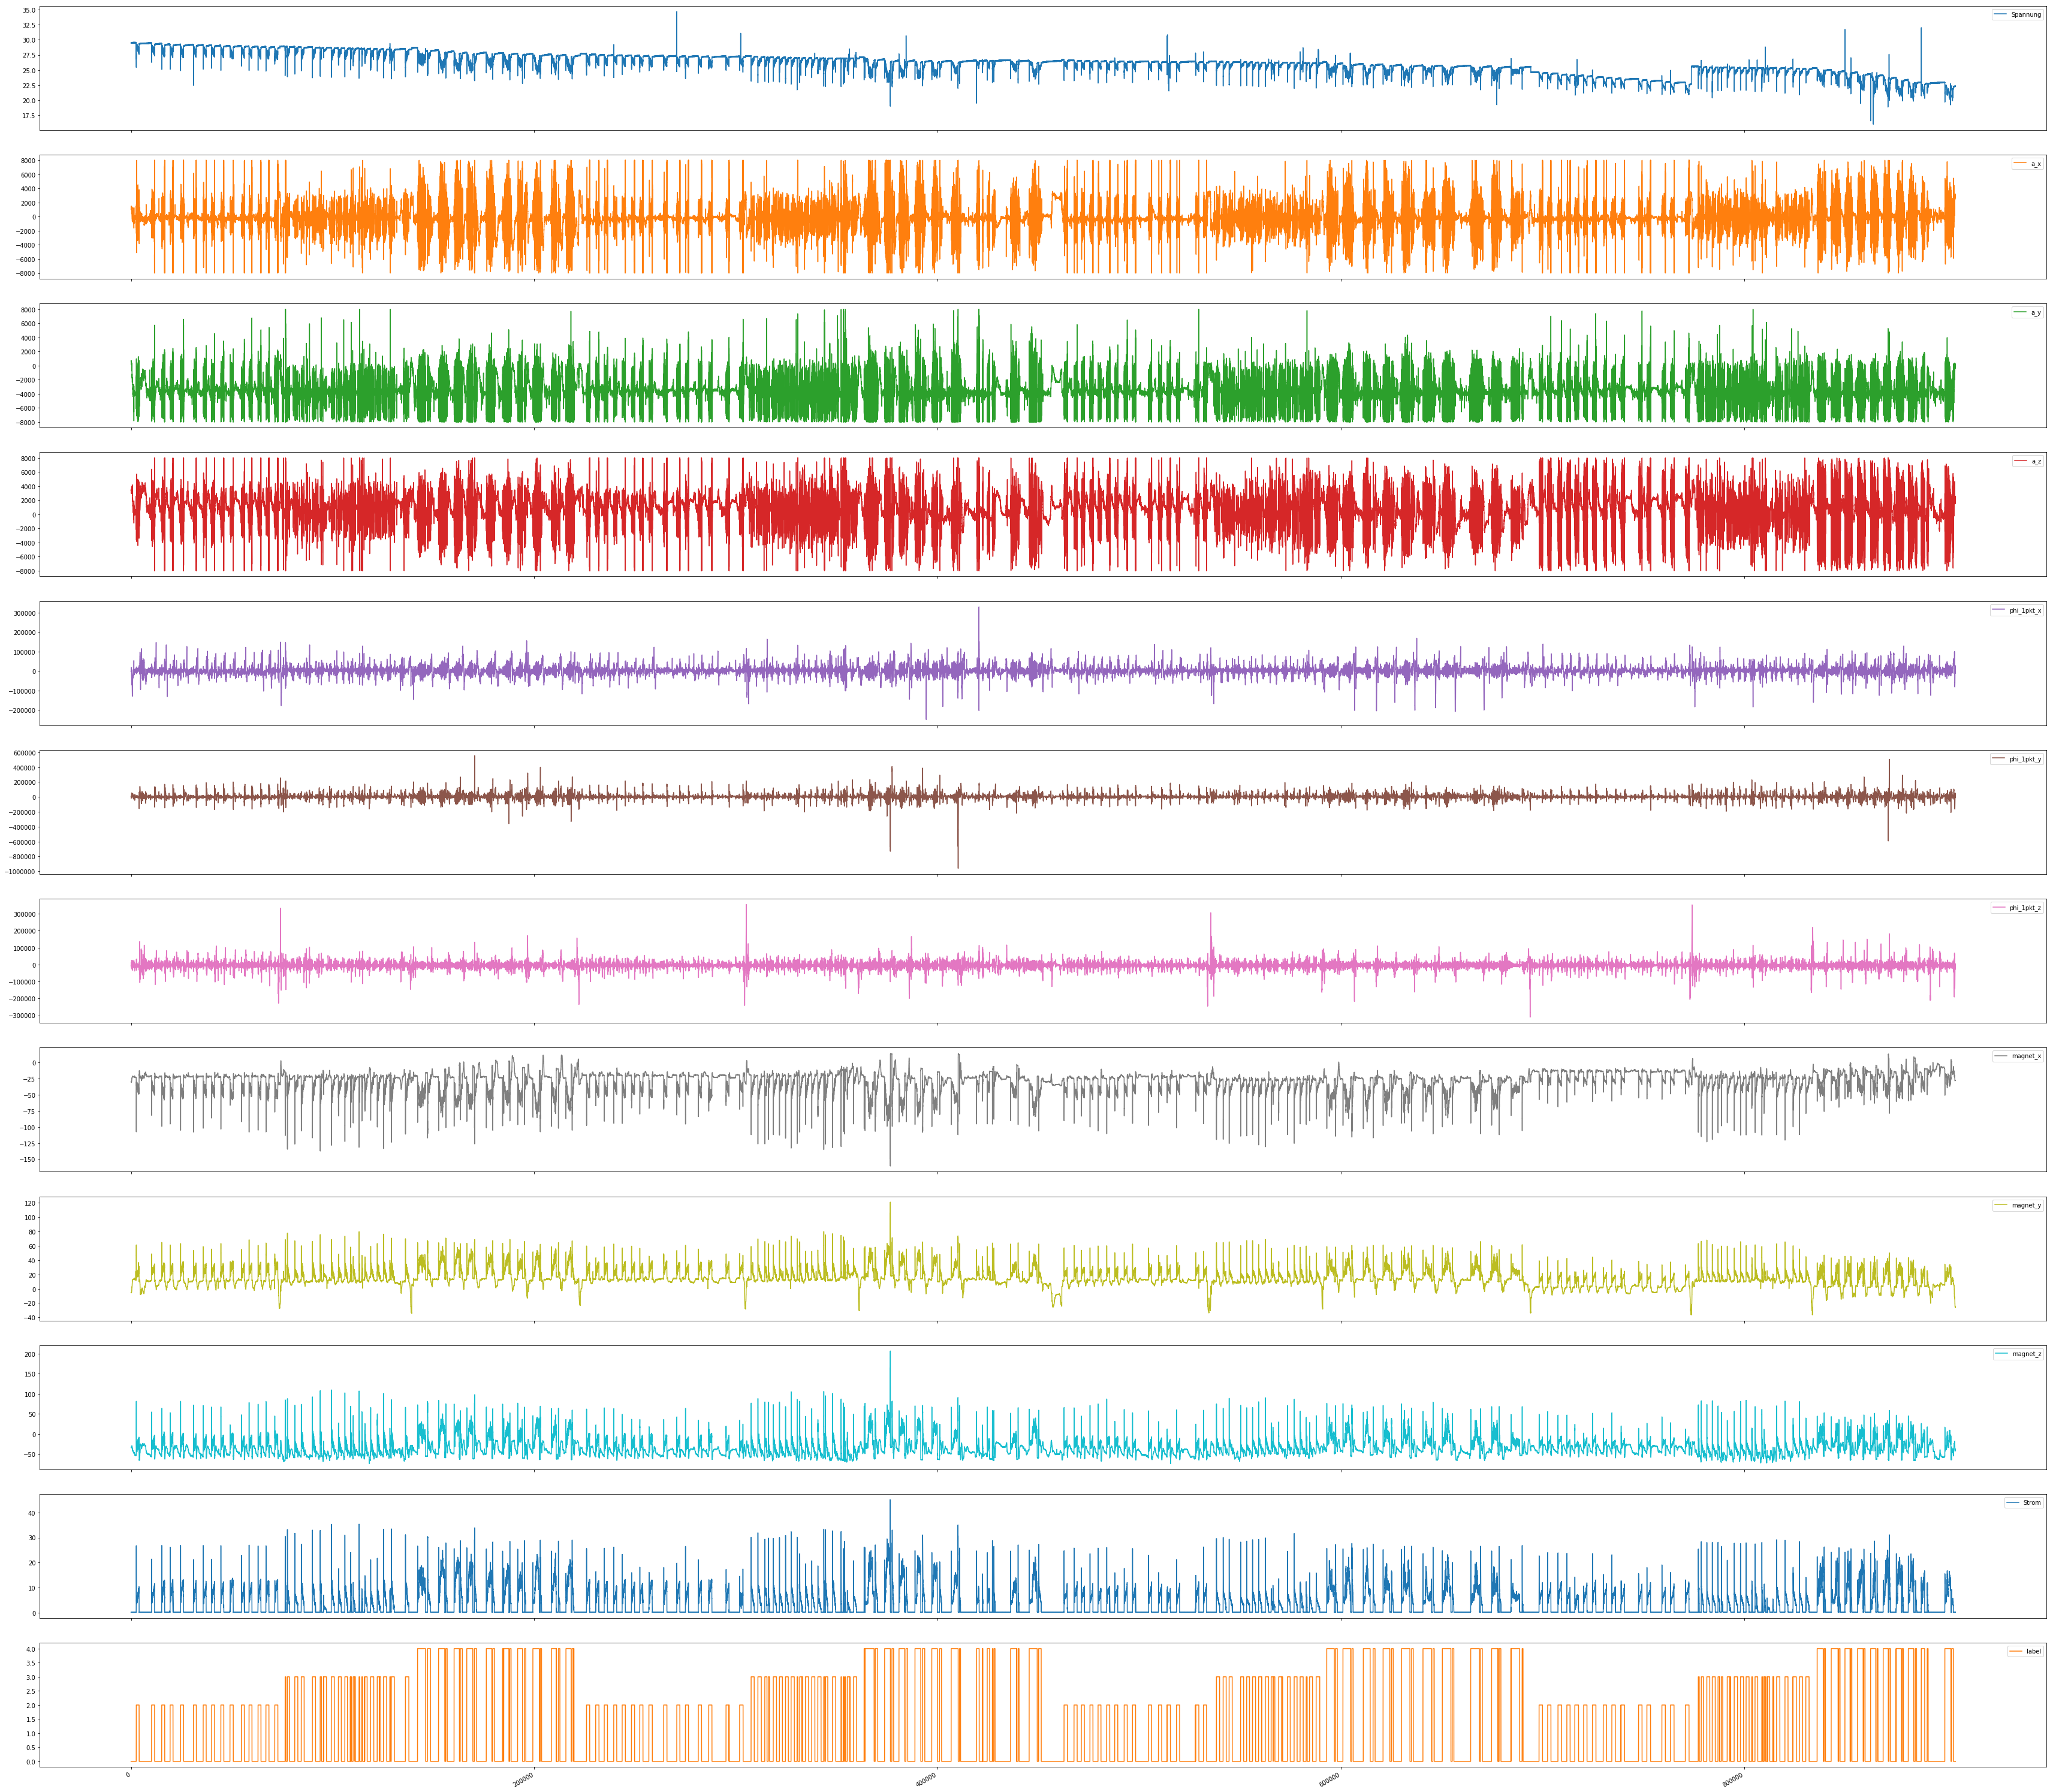

In [13]:
df_label.plot(subplots=True,figsize=(60,60))

In [14]:
def abschnitt_number(data,seg_data_anzahl):
    row=data.shape[0]
    return int(row/seg_data_anzahl)
def abschnitt(data,i,seg_data_anzahl):
    row=data.shape[0]
    segment=data.loc[data.index[i]*seg_data_anzahl:data.index[i]*seg_data_anzahl+seg_data_anzahl-1]
    return segment



In [15]:
seg_data_anzahl=200
seg_anzahl=abschnitt_number(df,seg_data_anzahl)
seg_anzahl




4524

In [16]:
seg_anzahl_123=abschnitt_number(df_123,seg_data_anzahl)
seg_anzahl_123



4092

In [17]:
label_segment=[abschnitt(label,i,seg_data_anzahl) for i in range(seg_anzahl)]
Segment=[abschnitt(df,i,seg_data_anzahl)  for i in range(seg_anzahl)]

In [18]:
label_segment_123=[abschnitt(label_123,i,seg_data_anzahl) for i in range(seg_anzahl_123)]
Segment_123=[abschnitt(df_123,i,seg_data_anzahl)  for i in range(seg_anzahl_123)]

label_segment_124=[abschnitt(label_124,i,seg_data_anzahl) for i in range(seg_anzahl_123)]
Segment_124=[abschnitt(df_124,i,seg_data_anzahl)  for i in range(seg_anzahl_123)]

label_segment_134=[abschnitt(label_134,i,seg_data_anzahl) for i in range(seg_anzahl_123)]
Segment_134=[abschnitt(df_134,i,seg_data_anzahl)  for i in range(seg_anzahl_123)]

label_segment_234=[abschnitt(label_234,i,seg_data_anzahl) for i in range(seg_anzahl_123)]
Segment_234=[abschnitt(df_234,i,seg_data_anzahl)  for i in range(seg_anzahl_123)]

In [19]:
def label(label_segment_name,anzahl):
    label_für_segment=[np.array(label_segment_name[i].mode().max()) for i in range(anzahl)]
    klasse=[]
    for Labels in label_für_segment:
        klasse.extend(Labels)

    y=pd.DataFrame(klasse)
    y.columns=['label']
    return y

In [20]:
y=label(label_segment,seg_anzahl)


In [21]:
y_123=label(label_segment_123,seg_anzahl_123)
y_124=label(label_segment_124,seg_anzahl_123)
y_134=label(label_segment_134,seg_anzahl_123)
y_234=label(label_segment_234,seg_anzahl_123)




In [22]:
def feature_extraction(data,s_list):
    def insegment(i,j,inseg_data_anzahl):
        insegment=data[i].loc[data[i].index[0]+j*inseg_data_anzahl:data[i].index[0]+j*inseg_data_anzahl+inseg_data_anzahl-1]
        return insegment
    Insegment=[insegment(i,j,10)
           for i in range(len(data))
           for j in range(10)]

    def mean_trend(i):
        trend=(insegment(i,0,10).mean()-insegment(i,0+1,10).mean()).abs()
        for j in range(1,9):
            trend=trend+(insegment(i,j,10).mean()-insegment(i,j+1,10).mean()).abs()
        return trend   

    Mean_trend=[mean_trend(i)
            for i in range(len(data))   
               ]



    def windows_mean_difference(i):
        wmd=(data[i].mean()-insegment(i,0,10).mean()).abs()
        for j in range(1,10):
            wmd=wmd+(data[i].mean()-insegment(i,j,10).mean()).abs()
        return wmd
    

    Windows_mean_difference=[windows_mean_difference(i)
       for i in range(len(data))                     
    ]

    def variance_trend(i):
        trend=((insegment(i,0,10).var())**2-(insegment(i,0+1,10).var())**2).abs()
        for j in range(1,9):
            trend=trend+((insegment(i,j,10).var())**2-(insegment(i,j+1,10).var())**2).abs()
        return trend 
    Variance_trend=[variance_trend(i)
                for i in range(len(data))   
    ]

    def windows_variance_difference(i):
        wmd=((data[i].var())**2-(insegment(i,0,10).var())**2).abs()
        for j in range(1,10):
            wmd=wmd+((data[i].var())**2-(insegment(i,j,10).var())**2).abs()
        return wmd
    Windows_variance_difference=[windows_variance_difference(i)
       for i in range(len(data))                     
    ]

    def distanz_beschleunigung_x_y(i):
        distanz=[np.sqrt(((data[i][data[i].columns[1]])**2+(data[i][data[i].columns[2]])**2).sum())]
        distanz=pd.DataFrame(distanz)
        distanz.columns=['distanz_beschleunigung_x_y']
        return distanz
    Distanz_beschleunigung_x_y=[distanz_beschleunigung_x_y(i)
    for i in range(len(data))
                               ] 



    def distanz_beschleunigung_y_z(i):
        distanz=[np.sqrt(((data[i][data[i].columns[2]])**2+(data[i][data[i].columns[3]])**2).sum())]
        distanz=pd.DataFrame(distanz)
        distanz.columns=['distanz_beschleunigung_y_z']
        return distanz
    Distanz_beschleunigung_y_z=[distanz_beschleunigung_y_z(i)
    for i in range(len(data))
                               ]  

    def distanz_beschleunigung_x_z(i):
        distanz=[np.sqrt(((data[i][data[i].columns[1]])**2+(data[i][data[i].columns[3]])**2).sum())]
        distanz=pd.DataFrame(distanz)
        distanz.columns=['distanz_beschleunigung_x_z']
        return distanz
    Distanz_beschleunigung_x_z=[distanz_beschleunigung_x_z(i)
    for i in range(len(data))
                               ]  

    def distanz_winkelgeschwindigkeit_x_y(i):
        distanz=[np.sqrt(((data[i][data[i].columns[4]])**2+(data[i][data[i].columns[5]])**2).sum())]
        distanz=pd.DataFrame(distanz)
        distanz.columns=['distanz_winkelgeschwindigkeit_x_y']
        return distanz
    Distanz_winkelgeschwindigkeit_x_y=[distanz_winkelgeschwindigkeit_x_y(i)
    for i in range(len(data))
                               ]  

    def distanz_winkelgeschwindigkeit_x_z(i):
        distanz=[np.sqrt(((data[i][data[i].columns[4]])**2+(data[i][data[i].columns[6]])**2).sum())]
        distanz=pd.DataFrame(distanz)
        distanz.columns=['distanz_winkelgeschwindigkeit_x_z']
        return distanz
    Distanz_winkelgeschwindigkeit_x_z=[distanz_winkelgeschwindigkeit_x_z(i)
    for i in range(len(data))
                               ]  

    def distanz_winkelgeschwindigkeit_y_z(i):
        distanz=[np.sqrt(((data[i][data[i].columns[5]])**2+(data[i][data[i].columns[6]])**2).sum())]
        distanz=pd.DataFrame(distanz)
        distanz.columns=['distanz_winkelgeschwindigkeit_y_z']
        return distanz
    Distanz_winkelgeschwindigkeit_y_z=[distanz_winkelgeschwindigkeit_y_z(i)
    for i in range(len(data))
                               ]  

    def distanz_magnetfeld_x_y(i):
        distanz=[np.sqrt(((data[i][data[i].columns[7]])**2+(data[i][data[i].columns[8]])**2).sum())]
        distanz=pd.DataFrame(distanz)
        distanz.columns=['distanz_magnetfeld_x_y']
        return distanz
    Distanz_magnetfeld_x_y=[distanz_magnetfeld_x_y(i)
    for i in range(len(data))
                               ]  

    def distanz_magnetfeld_y_z(i):
        distanz=[np.sqrt(((data[i][data[i].columns[8]])**2+(data[i][data[i].columns[9]])**2).sum())]
        distanz=pd.DataFrame(distanz)
        distanz.columns=['distanz_magnetfeld_y_z']
        return distanz
    Distanz_magnetfeld_y_z=[distanz_magnetfeld_y_z(i)
    for i in range(len(data))
                               ]  

    def distanz_magnetfeld_x_z(i):
        distanz=[np.sqrt(((data[i][data[i].columns[7]])**2+(data[i][data[i].columns[9]])**2).sum())]
        distanz=pd.DataFrame(distanz)
        distanz.columns=['distanz_magnetfeld_x_z']
        return distanz
    Distanz_magnetfeld_x_z=[distanz_magnetfeld_x_z(i)
    for i in range(len(data))
                               ]  


    def dwt(i):
        ca,cd=pywt.dwt(data[i],'haar',axis=0)
        ca=pd.DataFrame(ca)
        cd=pd.DataFrame(cd)
        cd.columns=s_list
        ca.columns=s_list
        return [ca,cd]
      #Aus der arbeit wird erste Koeffizient cA ausgewählt 

    dwt_lowpass_absolut_mean=[dwt(i)[0].abs().mean()
                             for i in range(len(data))    
    ]

    dwt_highpass_absolut_mean=[dwt(i)[1].abs().mean()
                             for i in range(len(data))    
    ]

    def dwt_lowpass_average_power(i):
        Energy=((dwt(i)[0].abs())**2).sum()/len(dwt(i)[0])  #bei mir ist 5% einer Energie
        Energy.index=s_list
        return Energy
    Dwt_lowpass_average_power=[dwt_lowpass_average_power(i)
                               for i in range(len(data))   
    ]

    def dwt_highpass_average_power(i):
        Energy=((dwt(i)[1].abs())**2).sum()/len(dwt(i)[1])  #bei mir ist 5% einer Energie
        Energy.index=s_list
        return Energy
    Dwt_highpass_average_power=[dwt_highpass_average_power(i)
                               for i in range(len(data))   
    ]

    dwt_lowpass_std=[dwt(i)[0].std()
                             for i in range(len(data))    
    ]

    dwt_highpass_std=[dwt(i)[1].std()
                             for i in range(len(data))    
    ]

    def energy_ca(i):
        energy=(dwt(i)[0].abs()**2).sum()
        return energy
    Energy_ca=[energy_ca(i)
        for i in range(len(data))
    ]

    def energy_cd(i):
        energy=(dwt(i)[1].abs()**2).sum()
        return energy
    Energy_cd=[energy_cd(i)
        for i in range(len(data))
    ]

    def sum_ca(i):
        summe=(dwt(i)[0]).sum()
        return summe

    Sum_ca=[sum_ca(i)
           for i in range(len(data))
           ]


    def sum_cd(i):
        summe=dwt(i)[1].sum()
        return summe
    Sum_cd=[sum_cd(i)
        for i in range(len(data))
    ]

    mean=[data[i].mean()
         for i in range(len(data))
         ]

    std=[data[i].std()
         for i in range(len(data))
        ]


    Max=[data[i].max()
         for i in range(len(data))
        ]


    Min=[data[i].min()
         for i in range(len(data))
        ]


    median=[data[i].median()
         for i in range(len(data))
        ]

    quartiles=[data[i].quantile()
         for i in range(len(data))
        ]

    
    
    energy_frequency=[]
    frequency=['_0-20HZ','_20-40HZ','_40-60HZ','_60-80HZ','_80-100HZ']
    for freqenz in frequency:
        for sensor in s_list:
            energy_frequency.append('Energy_'+sensor+freqenz)



    def energy(i):
        energy=[]
        ft=pd.DataFrame(abs(np.fft.fftn(data[i])))[0:50]
        for j in range(5):
            Energy=((ft.loc[10*j:(10*(j+1)-1)]**2).sum()).tolist() #bei mir ist 5% einer Energie
            energy.extend(Energy)
        energy=pd.DataFrame(energy).T
        energy.columns=energy_frequency
        return energy


    Energy=[energy(i)
         for i in range(len(data))
        ]
    
    
    
    
    
    fft_sum_frequency=[]
    frequency=['_0-20HZ','_20-40HZ','_40-60HZ','_60-80HZ','_80-100HZ']
    for freqenz in frequency:
        for sensor in s_list:
            fft_sum_frequency.append('fft_sum_'+sensor+freqenz)


    def fft_sum(i):
        summe=[]
        ft=pd.DataFrame(abs(np.fft.fftn(data[i])))[0:50]
        for j in range(5):
            fft_sum=((ft.loc[10*j:(10*(j+1)-1)]).sum()).tolist()
            summe.extend(fft_sum)
        summe=pd.DataFrame(summe).T   
        summe.columns=fft_sum_frequency
        return summe

    Fft_sum=[fft_sum(i)
              for i in range(len(data))  
    ]
 

    dc_frequency=[]
    frequency=['_0-20HZ','_20-40HZ','_40-60HZ','_60-80HZ','_80-100HZ']
    for freqenz in frequency:
        for sensor in s_list:
            dc_frequency.append('DC_Komponent_'+sensor+freqenz)


    def fft_DC_komponent(i):
        DC=[]
        ft=pd.DataFrame(np.fft.fftn(data[i]).real)[0:50]
        for j in range(5):
            dc=(((ft.loc[10*j:(10*(j+1)-1)]**2).sum())/len(data)).tolist()
            DC.extend(dc)
        DC=pd.DataFrame(DC).T
        DC.columns=dc_frequency 
        return DC

    Fft_DC_komponent=[fft_DC_komponent(i)
              for i in range(len(data))  
    ]
    
    
    
    variance=[data[i].var()
              for i in range(len(data))   
    ]


    def entropy(i):
        entropy=[]
        for j in range(len(s_list)) :
            p=data[i][data[i].columns[j]].value_counts()/len(data[i])
            e=sc.stats.entropy(p)
            entropy.append(e)
        entropy=np.array(entropy)
        entropy=pd.DataFrame(entropy)
        entropy.index=s_list
        return entropy


    Entropy=[entropy(i)
        for i in range(len(data))
    ]


    def entropy_fft(i):
        entropy=[]
        ft=abs(np.fft.fftn(data[i]))
        for j in range(len(s_list)):
            p=pd.DataFrame(ft)[j].value_counts()/len(ft)
            e=sc.stats.entropy(p)
            entropy.append(e)
        entropy=np.array(entropy)
        entropy=pd.DataFrame(entropy)
        entropy.index=s_list
        return entropy



    Entropy_fft=[entropy_fft(i)
                 for i in range(len(data))  
    ]

    def fft_max_magnitude_freq(i):
        ft=abs(np.fft.fftn(data[i])).tolist()
        freq=np.fft.fftfreq(len(data[1])).tolist()
        frequenz=[]
        for j in range(len(s_list)):
            ft_max=np.max(ft[j])
            index=ft[j].index(ft_max)
            frequency=freq[index]
            frequenz.append(frequency)
        frequenz=np.array(frequenz)
        frequenz=pd.DataFrame(frequenz)
        frequenz.index=s_list
        return frequenz    
    Fft_max_magnitude_freq=[fft_max_magnitude_freq(i)
                            for i in range(len(data))
    ]     

    skewness=[data[i].skew()
             for i in range(len(data))      
             ]     #Schiefe
    skewness[1]

    kurtosis=[data[i].kurtosis()
              for i in range(len(data))

    ]   #Spizigkeit


    root_mean_square=[np.sqrt((data[i]**2).mean())                  
        for i in range(len(data))
    ] #quadratisches Mettel


    def mean_gradient(i):
        grad=[]
        for j in range(len(s_list)):
            a=np.gradient(data[i][data[i].columns[j]]).mean()
            grad.append(a)
        grad=np.array(grad)
        grad=pd.DataFrame(grad)
        grad.index=s_list
        return grad

    Mean_gradient=[mean_gradient(i)
                   for i in range(len(data))

    ]

    def abs_gradient(i):
        grad=[]
        for j in range(len(s_list)):
            a=abs(np.gradient(data[i][data[i].columns[j]])).max()
            grad.append(a)
        grad=np.array(grad)
        grad=pd.DataFrame(grad)
        grad.index=s_list
        return grad

    Abs_gradient=[abs_gradient(i)
                  for i in range(len(data))

    ]

    def IQr(i):
        a=iqr(data[i],axis=0)
        a=pd.DataFrame(a)
        a.index=s_list
        return a

    IQR=[IQr(i)
         for i in range(len(data))
        ]

    MAD=[data[i].mad()
         for i in range(len(data))
        ]


    def number_of_zero_crossing(i):
        number=[]
        for j in range(len(s_list)):
            num=float(((np.array(data[i][data[i].columns[j]].loc[data[i].index[:-1]])*np.array(data[i][data[i].columns[j]].loc[data[i].index[1:]]))<0).sum())
            number.append(num)
        number=np.array(number)
        number=pd.DataFrame(number)
        number.index=s_list
        return number




    Number_of_zero_crossing=[number_of_zero_crossing(i)
                             for i in range(len(data))
    ]



    def correlation_Beschleunigung_x_y(i):
        corr=np.correlate(data[i][data[i].columns[1]],data[i][data[i].columns[2]])
        corr=pd.DataFrame(corr)
        corr.columns=['correlation_Beschleunigung_x_y']
        return corr

    Correlation_Beschleunigung_x_y=[correlation_Beschleunigung_x_y(i)
                                    for i in range(len(data))    
    ]

    def correlation_Beschleunigung_x_z(i):
        corr=np.correlate(data[i][data[i].columns[1]],data[i][data[i].columns[3]])
        corr=pd.DataFrame(corr)
        corr.columns=['correlation_Beschleunigung_x_z']
        return corr
    Correlation_Beschleunigung_x_z=[correlation_Beschleunigung_x_z(i)
                                    for i in range(len(data))    
    ]

    def correlation_Beschleunigung_y_z(i):
        corr=np.correlate(data[i][data[i].columns[2]],data[i][data[i].columns[3]])
        corr=pd.DataFrame(corr)
        corr.columns=['correlation_Beschleunigung_y_z']
        return corr

    Correlation_Beschleunigung_y_z=[correlation_Beschleunigung_y_z(i)
                                    for i in range(len(data))    
    ]

    def correlation_Windelgeschwindigkeit_x_y(i):
        corr=np.correlate(data[i][data[i].columns[4]],data[i][data[i].columns[5]])
        corr=pd.DataFrame(corr)
        corr.columns=['Windelgeschwindigkeit_x_y']
        return corr

    Correlation_Windelgeschwindigkeit_x_y=[correlation_Windelgeschwindigkeit_x_y(i)
                                    for i in range(len(data))    
    ]

    

    def correlation_Windelgeschwindigkeit_x_z(i):
        corr=np.correlate(data[i][data[i].columns[4]],data[i][data[i].columns[6]])
        corr=pd.DataFrame(corr)
        corr.columns=['Windelgeschwindigkeit_x_z']
        return corr

    Correlation_Windelgeschwindigkeit_x_z=[correlation_Windelgeschwindigkeit_x_z(i)
                                    for i in range(len(data))    
    ]

    def correlation_Windelgeschwindigkeit_y_z(i):
        corr=np.correlate(data[i][data[i].columns[5]],data[i][data[i].columns[6]])
        corr=pd.DataFrame(corr)
        corr.columns=['Windelgeschwindigkeit_y_z']
        return corr

    Correlation_Windelgeschwindigkeit_y_z=[correlation_Windelgeschwindigkeit_y_z(i)
                                    for i in range(len(data))    
    ]

    def correlation_Magnetfeld_x_y(i):
        corr=np.correlate(data[i][data[i].columns[7]],data[i][data[i].columns[8]])
        corr=pd.DataFrame(corr)
        corr.columns=['Magnetfeld_x_y']
        return corr

    Correlation_Magnetfeld_x_y=[correlation_Magnetfeld_x_y(i)
                                    for i in range(len(data))    
    ]

    def correlation_Magnetfeld_y_z(i):
        corr=np.correlate(data[i][data[i].columns[8]],data[i][data[i].columns[9]])
        corr=pd.DataFrame(corr)
        corr.columns=['Magnetfeld_y_z']
        return corr

    Correlation_Magnetfeld_y_z=[correlation_Magnetfeld_y_z(i)
                                    for i in range(len(data))    
    ]

    def correlation_Magnetfeld_x_z(i):
        corr=np.correlate(data[i][data[i].columns[7]],data[i][data[i].columns[9]])
        corr=pd.DataFrame(corr)
        corr.columns=['Magnetfeld_x_z']
        return corr

    Correlation_Magnetfeld_x_z=[correlation_Magnetfeld_x_z(i)
                                    for i in range(len(data))    
    ]

    def ar_model_co(i):
        Ar_coe=[]
        for j in range(len(s_list)):
            A=AR(data[i][data[i].columns[j]].values)
            Aa=A.fit(maxlag=3) #oder 3 aus der Arbeit"ACTIVITY RECOGNITION FROM ACCELERATION DATA USING AR MODEL REPRESENTATION AND SVM"
            ar_coe=Aa.params
            Ar_coe.append(ar_coe)
        Ar_coe=np.array(Ar_coe)
        Ar_coe=pd.DataFrame(Ar_coe)
        Ar_coe.index=s_list

        return Ar_coe




    

    Ar_model_co=[ar_model_co(i)
                 for i in range(len(data))
    ]

    def covariance_Beschleunigung_x_y(i):
        cov=[data[i][data[i].columns[1]].cov(data[i][data[i].columns[2]])]
        cov=pd.DataFrame(cov)
        cov.columns=['covariance_Beschleunigung_x_y']
        return cov

    Covariance_Beschleunigung_x_y=[covariance_Beschleunigung_x_y(i)
                                    for i in range(len(data))    
    ]

    
    def covariance_Beschleunigung_x_z(i):
        cov=[data[i][data[i].columns[1]].cov(data[i][data[i].columns[3]])]
        cov=pd.DataFrame(cov)
        cov.columns=['covariance_Beschleunigung_x_z']
        return cov

    Covariance_Beschleunigung_x_z=[covariance_Beschleunigung_x_z(i)
                                    for i in range(len(data))    
    ]
    

    def covariance_Beschleunigung_y_z(i):
        cov=[data[i][data[i].columns[2]].cov(data[i][data[i].columns[3]])]
        cov=pd.DataFrame(cov)
        cov.columns=['covariance_Beschleunigung_y_z']
        return cov

    Covariance_Beschleunigung_y_z=[covariance_Beschleunigung_y_z(i)
                                    for i in range(len(data))    
    ]

    def covariance_Winkelgeschwindigkeit_x_y(i):
        cov=[data[i][data[i].columns[4]].cov(data[i][data[i].columns[5]])]
        cov=pd.DataFrame(cov)
        cov.columns=['covariance_winkelgeschwindigkei_x_y']
        return cov

    Covariance_Winkelgeschwindigkeit_x_y=[covariance_Winkelgeschwindigkeit_x_y(i)
                                    for i in range(len(data))    
    ]

    def covariance_Winkelgeschwindigkeit_y_z(i):
        cov=[data[i][data[i].columns[5]].cov(data[i][data[i].columns[6]])]
        cov=pd.DataFrame(cov)
        cov.columns=['covariance_winkelgeschwindigkei_y_z']
        return cov

    Covariance_Winkelgeschwindigkeit_y_z=[covariance_Winkelgeschwindigkeit_y_z(i)
                                    for i in range(len(data))    
    ]

    def covariance_Winkelgeschwindigkeit_x_z(i):
        cov=[data[i][data[i].columns[4]].cov(data[i][data[i].columns[6]])]
        cov=pd.DataFrame(cov)
        cov.columns=['covariance_winkelgeschwindigkei_x_z']
        return cov

    Covariance_Winkelgeschwindigkeit_x_z=[covariance_Winkelgeschwindigkeit_x_z(i)
                                    for i in range(len(data))    
    ]

    def covariance_Magnetfeld_x_y(i):
        cov=[data[i][data[i].columns[7]].cov(data[i][data[i].columns[8]])]
        cov=pd.DataFrame(cov)
        cov.columns=['covariance_Magnetfeld_x_y']
        return cov

    Covariance_Magnetfeld_x_y=[covariance_Magnetfeld_x_y(i)
                                    for i in range(len(data))    
    ]

    def covariance_Magnetfeld_x_z(i):
        cov=[data[i][data[i].columns[7]].cov(data[i][data[i].columns[9]])]
        cov=pd.DataFrame(cov)
        cov.columns=['covariance_Magnetfeld_x_z']
        return cov

    Covariance_Magnetfeld_x_z=[covariance_Magnetfeld_x_z(i)
                                    for i in range(len(data))    
    ]

    def covariance_Magnetfeld_y_z(i):
        cov=[data[i][data[i].columns[8]].cov(data[i][data[i].columns[9]])]
        cov=pd.DataFrame(cov)
        cov.columns=['covariance_Magnetfeld_y_z']
        return cov

    Covariance_Magnetfeld_y_z=[covariance_Magnetfeld_y_z(i)
                                    for i in range(len(data))    
    ]

    def correlation_mean_variance(i):
        cor=[mean[i].corr(variance[i])]
        cor=pd.DataFrame(cor)
        cor.columns=['correlation_mean_variance']
        return cor
    Correlation_mean_variance=[correlation_mean_variance(i)
                               for i in range(len(data))  
    ]
    
    def SMA_a_x_y_z(i):
        SMA=[]
        fft=pd.DataFrame(abs(np.fft.fftn(data[i])))
        #fft=pd.DataFrame(preprocessing.normalize(fft))
        a_xyz=fft[1]+fft[2]+fft[3]
        for j in range(10):
            sma=a_xyz.loc[10*j:(10*(j+1)-1)].sum()
            SMA.append(sma)
        SMA=pd.DataFrame(SMA).T
        SMA.columns=['SMA_a_0-10HZ','SMA_a_10-20HZ','SMA_a_20-30HZ','SMA_a_30-40HZ','SMA_a_40-50HZ','SMA_a_50-60HZ','SMA_a_60-70HZ','SMA_a_70-80HZ','SMA_a_80-90HZ','SMA_a_90-100HZ']
        return SMA
    sma_a=[SMA_a_x_y_z(i) for i in range(len(data))]
    #sma_a=pd.concat(sma_a,axis=0)
    #sma_a.index=[i for i in range(len(data))]
 
    def SMA_W_x_y_z(i):
        SMA=[]
        fft=pd.DataFrame(abs(np.fft.fftn(data[i])))
        #fft=pd.DataFrame(preprocessing.normalize(fft))
        W_xyz=fft[4]+fft[5]+fft[6]
        for j in range(10):
            sma=W_xyz.loc[10*j:(10*(j+1)-1)].sum()
            SMA.append(sma)
        SMA=pd.DataFrame(SMA).T
        SMA.columns=['SMA_W_0-10HZ','SMA_W_10-20HZ','SMA_W_20-30HZ','SMA_W_30-40HZ','SMA_W_40-50HZ','SMA_W_50-60HZ','SMA_W_60-70HZ','SMA_W_70-80HZ','SMA_W_80-90HZ','SMA_W_90-100HZ']
        return SMA

    sma_w=[SMA_W_x_y_z(i) for i in range(len(data))]
    #sma_w=pd.concat(sma_w,axis=0)
    #sma_w.index=[i for i in range(len(data))]
    #preprocessing.normalize(sma1)
    
    def SMA_M_x_y_z(i):
        SMA=[]
        fft=pd.DataFrame(abs(np.fft.fftn(data[i])))
        #fft=pd.DataFrame(preprocessing.normalize(fft))
        M_xyz=fft[7]+fft[8]+fft[9]
        for j in range(10):
            sma=M_xyz.loc[10*j:(10*(j+1)-1)].sum()
            SMA.append(sma)
        SMA=pd.DataFrame(SMA).T
        SMA.columns=['SMA_M_0-10HZ','SMA_M_10-20HZ','SMA_M_20-30HZ','SMA_M_30-40HZ','SMA_M_40-50HZ','SMA_M_50-60HZ','SMA_M_60-70HZ','SMA_M_70-80HZ','SMA_M_80-90HZ','SMA_M_90-100HZ']
        return SMA
 
    sma_m=[SMA_M_x_y_z(i) for i in range(len(data))]
    
    
    def SMA_V_x_y_z(i):
        SMA=[]
        fft=pd.DataFrame(abs(np.fft.fftn(data[i])))
        #fft=pd.DataFrame(preprocessing.normalize(fft))
        V_xyz=fft[0]
        for j in range(10):
            sma=V_xyz.loc[10*j:(10*(j+1)-1)].sum()
            SMA.append(sma)
        SMA=pd.DataFrame(SMA).T
        SMA.columns=['SMA_V_0-10HZ','SMA_V_10-20HZ','SMA_V_20-30HZ','SMA_V_30-40HZ','SMA_V_40-50HZ','SMA_V_50-60HZ','SMA_V_60-70HZ','SMA_V_70-80HZ','SMA_V_80-90HZ','SMA_V_90-100HZ']
        return SMA
 
    sma_v=[SMA_V_x_y_z(i) for i in range(len(data))]


    def feature_list_inseg(i):
        feature_list_seg=pd.concat([Mean_trend[i],Windows_mean_difference[i],Variance_trend[i],Windows_variance_difference[i],dwt_lowpass_absolut_mean[i],dwt_highpass_absolut_mean[i],Dwt_lowpass_average_power[i],Dwt_highpass_average_power[i],dwt_lowpass_std[i],dwt_highpass_std[i],Energy_ca[i],Energy_cd[i],Sum_ca[i],Sum_cd[i],mean[i],std[i],Max[i],Min[i],median[i],quartiles[i],variance[i],Entropy[i],Entropy_fft[i],Fft_max_magnitude_freq[i],skewness[i],kurtosis[i],root_mean_square[i],Mean_gradient[i],Abs_gradient[i],IQR[i],MAD[i],Number_of_zero_crossing[i],Ar_model_co[i]],axis=1)                                                                          
        feature_list_seg.columns=['Mean_trend','Windows_mean_difference','Variance_trend','Windows_variance_difference','dwt_lowpass_absolut_mean','dwt_highpass_absolut_mean','Dwt_lowpass_average_power','Dwt_highpass_average_power','dwt_lowpass_std','dwt_highpass_std','Energy_ca','Energy_cd','Sum_ca','Sum_cd','mean','std','Max','Min','median','quartiles','variance','Entropy','Entropy_fft','Fft_max_magnitude_freq','skewness','kurtosis','root_mean_square','Mean_gradient','Abs_gradient','IQR','MAD','Number_of_zero_crossing','Ar1','Ar2','Ar3','Ar4']
        return feature_list_seg


    Features_list1=['Mean_trend','Windows_mean_difference','Variance_trend','Windows_variance_difference','dwt_lowpass_absolut_mean','dwt_highpass_absolut_mean','Dwt_lowpass_average_power','Dwt_highpass_average_power','dwt_lowpass_std','dwt_highpass_std','Energy_ca','Energy_cd','Sum_ca','Sum_cd','mean','std','Max','Min','median','quartiles','variance','Entropy','Entropy_fft','Fft_max_magnitude_freq','skewness','kurtosis','root_mean_square','Mean_gradient','Abs_gradient','IQR','MAD','Number_of_zero_crossing','Ar1','Ar2','Ar3','Ar4']
    #Features_list2=['Distanz_beschleunigung_x_y','Distanz_beschleunigung_x_z','Distanz_beschleunigung_y_z','Distanz_magnetfeld_x_y','Distanz_magnetfeld_y_z','Distanz_magnetfeld_x_z','Distanz_winkelgeschwindigkeit_x_y','Distanz_windelgeschwindigkeit_x_z','Distanz_windelgeschwindigkeit_y_z','Correlation_Beschleunigung_x_y','Correlation_Beschleunigung_x_z','Correlation_Beschleunigung_y_z','Correlation_Magnetfeld_x_y','Correlation_Magnetfeld_x_z','Correlation_Magnetfeld_y_z','Correlation_Windelgeschwindigkeit_x_y','Correlation_Windelgeschwindigkeit_x_z','Correlation_Windelgeschwindigkeit_y_z','Covariance_Beschleunigung_x_y','Covariance_Beschleunigung_x_z','Covariance_Beschleunigung_y_z','Covariance_Magnetfeld_x_y','Covariance_Magnetfeld_x_z','Covariance_Magnetfeld_y_z','Covariance_Winkelgeschwindigkeit_x_y','Covariance_Winkelgeschwindigkeit_x_z','Covariance_Winkelgeschwindigkeit_y_z','Correlation_mean_variance']
    #Features_list=['Mean_trend','Windows_mean_difference','Variance_trend','Windows_variance_difference','dwt_lowpass_absolut_mean','dwt_highpass_absolut_mean','Dwt_lowpass_average_power','Dwt_highpass_average_power','dwt_lowpass_std','dwt_highpass_std','Energy_ca','Energy_cd','Sum_ca','Sum_cd','mean','std','Max','Min','median','quartiles','Energy','Fft_sum','Fft_DC_komponent','variance','Entropy','Entropy_fft','Fft_max_magnitude_freq','skewness','kurtosis','root_mean_square','Mean_gradient','Abs_gradient','IQR','MAD','Number_of_zero_crossing','Ar1','Ar2','Ar3','Ar4','Distanz_beschleunigung_x_y','Distanz_beschleunigung_x_z','Distanz_beschleunigung_y_z','Distanz_magnetfeld_x_y','Distanz_magnetfeld_y_z','Distanz_magnetfeld_x_z','Distanz_winkelgeschwindigkeit_x_y','Distanz_windelgeschwindigkeit_x_z','Distanz_windelgeschwindigkeit_y_z','Correlation_Beschleunigung_x_y','Correlation_Beschleunigung_x_z','Correlation_Beschleunigung_y_z','Correlation_Magnetfeld_x_y','Correlation_Magnetfeld_x_z','Correlation_Magnetfeld_y_z','Correlation_Windelgeschwindigkeit_x_y','Correlation_Windelgeschwindigkeit_x_z','Correlation_Windelgeschwindigkeit_y_z','Covariance_Beschleunigung_x_y','Covariance_Beschleunigung_x_z','Covariance_Beschleunigung_y_z','Covariance_Magnetfeld_x_y','Covariance_Magnetfeld_x_z','Covariance_Magnetfeld_y_z','Covariance_Winkelgeschwindigkeit_x_y','Covariance_Winkelgeschwindigkeit_x_z','Covariance_Winkelgeschwindigkeit_y_z','Correlation_mean_variance']


    #features_name=[]
    #for sensorname in sensor_list:
       #for feature in Features_list:
            #features_name.append(sensorname+'_'+feature)   


    features_name1=[]
    for sensorname in s_list:
        for feature in Features_list1:
            features_name1.append(sensorname+'_'+feature)   
    

    def feature_inseg(i):
        features=[]
        for j in range(len(s_list)):
            f=feature_list_inseg(i).loc[data[i].columns[j]].tolist()
            features.extend(f)   
        features=np.array(features)
        features=pd.DataFrame(features).T
        features.columns=features_name1
        return features
    



    def feature_zwischen_seg(i):
        feature_list_seg=pd.concat([Distanz_beschleunigung_x_y[i],Distanz_beschleunigung_x_z[i],Distanz_beschleunigung_y_z[i],Distanz_magnetfeld_x_y[i],Distanz_magnetfeld_y_z[i],Distanz_magnetfeld_x_z[i],Distanz_winkelgeschwindigkeit_x_y[i],Distanz_winkelgeschwindigkeit_x_z[i],Distanz_winkelgeschwindigkeit_y_z[i],Correlation_Beschleunigung_x_y[i],Correlation_Beschleunigung_x_z[i],Correlation_Beschleunigung_y_z[i],Correlation_Magnetfeld_x_y[i],Correlation_Magnetfeld_x_z[i],Correlation_Magnetfeld_y_z[i],Correlation_Windelgeschwindigkeit_x_y[i],Correlation_Windelgeschwindigkeit_x_z[i],Correlation_Windelgeschwindigkeit_y_z[i],Covariance_Beschleunigung_x_y[i],Covariance_Beschleunigung_x_z[i],Covariance_Beschleunigung_y_z[i],Covariance_Magnetfeld_x_y[i],Covariance_Magnetfeld_x_z[i],Covariance_Magnetfeld_y_z[i],Covariance_Winkelgeschwindigkeit_x_y[i],Covariance_Winkelgeschwindigkeit_x_z[i],Covariance_Winkelgeschwindigkeit_y_z[i],Correlation_mean_variance[i],sma_a[i],sma_w[i],sma_m[i],sma_v[i],Energy[i],Fft_DC_komponent[i],Fft_sum[i]],axis=1)
        feature_list_seg.columns=['Distanz_beschleunigung_x_y','Distanz_beschleunigung_x_z','Distanz_beschleunigung_y_z','Distanz_magnetfeld_x_y','Distanz_magnetfeld_y_z','Distanz_magnetfeld_x_z','Distanz_winkelgeschwindigkeit_x_y','Distanz_windelgeschwindigkeit_x_z','Distanz_windelgeschwindigkeit_y_z','Correlation_Beschleunigung_x_y','Correlation_Beschleunigung_x_z','Correlation_Beschleunigung_y_z','Correlation_Magnetfeld_x_y','Correlation_Magnetfeld_x_z','Correlation_Magnetfeld_y_z','Correlation_Windelgeschwindigkeit_x_y','Correlation_Windelgeschwindigkeit_x_z','Correlation_Windelgeschwindigkeit_y_z','Covariance_Beschleunigung_x_y','Covariance_Beschleunigung_x_z','Covariance_Beschleunigung_y_z','Covariance_Magnetfeld_x_y','Covariance_Magnetfeld_x_z','Covariance_Magnetfeld_y_z','Covariance_Winkelgeschwindigkeit_x_y','Covariance_Winkelgeschwindigkeit_x_z','Covariance_Winkelgeschwindigkeit_y_z','Correlation_mean_variance','SMA_a_0-10HZ','SMA_a_10-20HZ','SMA_a_20-30HZ','SMA_a_30-40HZ','SMA_a_40-50HZ','SMA_a_50-60HZ','SMA_a_60-70HZ','SMA_a_70-80HZ','SMA_a_80-90HZ','SMA_a_90-100HZ','SMA_W_0-10HZ','SMA_W_10-20HZ','SMA_W_20-30HZ','SMA_W_30-40HZ','SMA_W_40-50HZ','SMA_W_50-60HZ','SMA_W_60-70HZ','SMA_W_70-80HZ','SMA_W_80-90HZ','SMA_W_90-100HZ','SMA_M_0-10HZ','SMA_M_10-20HZ','SMA_M_20-30HZ','SMA_M_30-40HZ','SMA_M_40-50HZ','SMA_M_50-60HZ','SMA_M_60-70HZ','SMA_M_70-80HZ','SMA_M_80-90HZ','SMA_M_90-100HZ','SMA_V_0-10HZ','SMA_V_10-20HZ','SMA_V_20-30HZ','SMA_V_30-40HZ','SMA_V_40-50HZ','SMA_V_50-60HZ','SMA_V_60-70HZ','SMA_V_70-80HZ','SMA_V_80-90HZ','SMA_V_90-100HZ']+energy_frequency+dc_frequency+fft_sum_frequency
        return feature_list_seg
   






    def feature_seg(i):
        feature=pd.concat([feature_inseg(i),feature_zwischen_seg(i)],axis=1)
        return feature


    

    feature=[feature_seg(i)
             for i in range(len(data))    
    ]
    features=pd.concat(feature,axis=0)
    features.index=[i for i in range(len(data))]
    return features



In [23]:
x_extraktion=feature_extraction(Segment,sensor_list_neu)

In [24]:
x_extraktion

Spannung_Mean_trend  Spannung_Windows_mean_difference  \
0                0.064525                          0.041752   
1                0.051873                          0.048457   
2                0.082238                          0.057440   
3                0.045547                          0.042258   
4                0.026569                          0.037830   
5                0.078442                          0.055036   
6                0.058199                          0.043143   
7                0.030365                          0.046053   
8                0.065790                          0.055669   
9                0.096155                          0.091348   
10               0.050608                          0.051620   
11               0.088564                          0.056301   
12               0.040486                          4.349763   
13               2.807482                          6.438610   
14               0.360582                          0.417263   
15               0.246714                          0.655121   
16               0.461799                          0.409166   
17               0.636396                          0.659550   
18               0.317566                          0.355142   
19               0.705982                          0.991285   
20               0.069586                          0.134617   
21               0.139172                          0.088691   
22               0.069586                          0.064019   
23               0.049343                          0.064272   
24               0.050608                          0.044282   
25               0.043017                          0.037956   
26               0.055669                          0.036944   
27               0.058199                          0.055669   
28               0.117664                          0.075912   
29               0.075912                          0.056808   
...                   ...                               ...   
4494             0.029100                          0.042890   
4495             0.093625                          0.059464   
4496             0.110073                          0.077177   
4497             0.083503                          4.532584   
4498             0.632601                          1.488763   
4499             0.206228                          0.302636   
4500             0.187250                          0.305546   
4501             0.182189                          0.494694   
4502             0.593379                          1.877559   
4503             0.598440                          1.642485   
4504             0.385886                          1.411332   
4505             0.194841                          0.318831   
4506             0.180924                          0.149673   
4507             0.247979                          1.631477   
4508             0.588319                          1.695623   
4509             0.557954                          0.559599   
4510             0.765447                          1.069348   
4511             0.666761                          0.561243   
4512             0.690800                          4.663533   
4513             0.123990                          0.410937   
4514             0.075912                          0.881213   
4515             0.210023                          0.759880   
4516             0.126520                          0.303142   
4517             0.183454                          0.187250   
4518             0.489633                          1.263936   
4519             0.116399                          0.146257   
4520             0.084768                          0.053518   
4521             0.072116                          0.080087   
4522             0.070851                          0.062248   
4523             0.065790                          0.048584   

      Spannung_Variance_trend  Spannung_Windows_variance_difference  \
0                5.917751e-0

In [25]:
x_extraktion_123=feature_extraction(Segment_123,sensor_list)

x_extraktion_124=feature_extraction(Segment_124,sensor_list)

x_extraktion_134=feature_extraction(Segment_134,sensor_list)

x_extraktion_234=feature_extraction(Segment_234,sensor_list)




In [26]:
def shuffle(data,feature_len):
    Shuffle=np.arange(feature_len)
    np.random.shuffle(Shuffle)
    X=data[data.columns[Shuffle]]
    return X


In [27]:
X=shuffle(x_extraktion,len(x_extraktion.columns))
shuffle_features_name=X.columns.tolist()
X

a_z_Windows_mean_difference  SMA_M_0-10HZ  phi_1pkt_z_Min  \
0                       385.17352  1.903520e+07        -15260.0   
1                      2758.81040  6.310262e+07         -6860.0   
2                       714.00256  5.971167e+07        -27510.0   
3                      3887.53488  7.741383e+07        -34300.0   
4                      2447.06624  3.198418e+07        -18060.0   
5                       656.01840  1.414784e+07        -16170.0   
6                      2660.14900  3.184154e+07        -18690.0   
7                      2439.26312  2.997490e+07        -21070.0   
8                       584.66792  2.022409e+07        -38360.0   
9                       428.49084  3.197040e+07        -37800.0   
10                     1481.95840  1.239016e+07        -14700.0   
11                     1104.85640  1.335021e+07        -15190.0   
12                     1365.59480  1.079003e+07        -21140.0   
13                     2560.77268  2.269822e+07        -33810.0   
14                     1288.73480  1.104572e+07        -16520.0   
15                     4208.39976  1.196644e+07        -16240.0   
16                     5161.71508  1.174830e+07        -13510.0   
17                     3373.30000  1.445837e+07        -14000.0   
18                     2699.75264  1.483366e+07        -14770.0   
19                     3561.91200  4.243177e+07        -32970.0   
20                     2585.28248  7.070858e+07        -31780.0   
21                     3579.89236  1.192389e+08       -107170.0   
22                     5071.02760  1.296073e+08        -88340.0   
23                     2293.33160  4.322822e+07        -56700.0   
24                      721.95208  7.869610e+07        -59010.0   
25                     4153.19720  1.118764e+08        -46060.0   
26                     3511.70900  5.168607e+07        -10500.0   
27                     2566.56768  3.859161e+07        -23100.0   
28                     2392.59568  5.290695e+07        -51730.0   
29                     3321.13280  6.021049e+07        -63070.0   
...                           ...           ...             ...   
4494                    832.53776  1.089513e+07        -13930.0   
4495                    559.72136  2.700838e+07         -4340.0   
4496                   1761.70440  1.700289e+07        -14840.0   
4497                    591.21200  1.379742e+07         -9240.0   
4498                   5063.75396  2.256102e+07        -29120.0   
4499                   6667.54888  2.454838e+07        -24290.0   
4500                   2604.10952  2.502019e+07        -16660.0   
4501                   4367.76592  2.046813e+07        -17010.0   
4502                   3710.94720  3.992586e+07        -41860.0   
4503                   7087.44848  5.215588e+07        -47110.0   
4504                   5550.16552  3.349086e+07        -17220.0   
4505                   3549.15080  2.098577e+07        -17010.0   
4506                   4186.79600  1.760176e+07        -19740.0   
4507                   5496.82468  2.909639e+07        -18480.0   
4508                   7505.19600  3.640634e+07        -25550.0   
4509                   2841.42636  2.830800e+07        -17640.0   
4510                   4838.50048  2.999167e+07        -15120.0   
4511                   3625.08360  3.742044e+07        -17360.0   
4512                   4771.24188  8.769246e+07        -20090.0   
4513                   1082.28640  3.772376e+07        -22330.0   
4514                    930.21584  2.976993e+07        -11620.0   
4515                   2967.94524  4.862204e+07        -16520.0   
4516                   6418.90068  2.012762e+07        -12810.0   
4517                   5437.41556  2.106404e+07        -21420.0   
4518                   3591.42136  4.659709e+07        -34160.0   
4519                   3641.56580  9.479718e+07        -45920.0   
4520                   4439.72152  1.199832e+08       -185080.0   
4521                   2477.14168  1.331176e+08      

In [28]:
X_123=shuffle(x_extraktion_123,len(x_extraktion_123.columns))
shuffle_features_name_123=X_123.columns.tolist()
X_123

DC_Komponent_phi_1pkt_y_60-80HZ  Spannung_Mean_gradient  \
0                        5.694690e+06           -7.413631e-05   
1                        7.710156e+06            7.413631e-05   
2                        1.741300e+07            0.000000e+00   
3                        4.552570e+06           -1.087333e-03   
4                        8.224034e+06           -2.718331e-03   
5                        7.948562e+06           -1.507438e-03   
6                        1.191932e+07            4.003361e-03   
7                        5.542480e+06            3.212574e-04   
8                        2.252773e+06           -2.471210e-05   
9                        3.003452e+06            9.884842e-05   
10                       4.235852e+06           -7.413631e-05   
11                       5.490795e+06           -3.904512e-03   
12                       1.110644e+07           -2.224089e-04   
13                       1.247040e+07            2.471210e-04   
14                       1.937042e+07            4.423467e-03   
15                       3.913924e+06            1.976968e-04   
16                       3.750171e+06            4.942421e-05   
17                       5.165381e+06            4.942421e-05   
18                       2.248868e+06            4.942421e-05   
19                       1.459173e+07            0.000000e+00   
20                       5.068282e+06           -3.879800e-03   
21                       8.713269e+06            7.660752e-04   
22                       1.240885e+07           -2.322938e-03   
23                       2.088947e+07            5.041269e-03   
24                       1.169386e+07            3.212574e-04   
25                       4.385238e+06            4.942421e-05   
26                       1.509250e+06            1.729847e-04   
27                       6.218618e+06            0.000000e+00   
28                       4.224155e+06            0.000000e+00   
29                       1.339512e+07           -2.792468e-03   
...                               ...                     ...   
4062                     3.937501e+06            1.482726e-04   
4063                     8.524230e+06           -3.336134e-03   
4064                     2.062872e+07            6.672268e-04   
4065                     1.228174e+07           -4.201058e-04   
4066                     4.294142e+07           -4.695300e-04   
4067                     4.290085e+07           -5.189542e-04   
4068                     3.975441e+07            5.683784e-04   
4069                     1.170883e+07            7.413631e-04   
4070                     2.276930e+07           -1.037908e-03   
4071                     6.488685e+07           -2.224089e-04   
4072                     2.173890e+07           -1.729847e-04   
4073                     1.636799e+07            8.881784e-18   
4074                     8.989826e+06           -3.706816e-04   
4075                     3.717628e+07           -2.224089e-04   
4076                     2.317889e+07           -9.637721e-04   
4077                     2.506441e+07            1.235605e-04   
4078                     5.861982e+07           -1.976968e-04   
4079                     2.861547e+07           -1.285029e-03   
4080                     4.107177e+07            5.189542e-04   
4081                     6.045340e+06            4.843572e-03   
4082                     1.040218e+07           -3.434982e-03   
4083                     4.998234e+07           -4.942421e-04   
4084                     3.938738e+07            1.235605e-04   
4085                     7.611855e+07            1.235605e-04   
4086                     3.438938e+07            2.916028e-03   
4087                     5.362644e+06            1.976968e-04   
4088                     6.796377e+06            9.884842e-05   
4089                     1.292423e+07            9.884842e-05   
4090                     1.196012e+07            1.235605e-04   
4091                     4.057712e+06    

In [29]:
X_124=shuffle(x_extraktion_124,len(x_extraktion_123.columns))
shuffle_features_name_124=X_124.columns.tolist()
X_124

SMA_V_20-30HZ  a_z_dwt_lowpass_absolut_mean  \
0      6.412754e+05                     84.548758   
1      1.466928e+06                     94.045202   
2      2.115222e+06                    130.319780   
3      1.322307e+06                     86.754931   
4      1.518554e+06                    368.841039   
5      1.207974e+06                    380.218387   
6      2.802652e+06                    451.862446   
7      2.295709e+06                    386.016663   
8      7.995924e+05                    128.919708   
9      9.191731e+05                    145.239733   
10     1.005641e+06                    116.538269   
11     1.029229e+06                    154.962451   
12     1.367012e+06                    379.327433   
13     1.428489e+06                    393.582705   
14     1.441231e+06                    455.772747   
15     6.615068e+05                    115.173553   
16     1.206439e+06                     53.641120   
17     1.045677e+06                    104.496240   
18     1.180226e+06                     60.577838   
19     1.535611e+06                     48.062048   
20     1.053851e+06                    107.204459   
21     1.108608e+06                    341.836631   
22     1.049020e+06                    328.875364   
23     1.141099e+06                    351.304791   
24     1.265866e+06                    509.901771   
25     1.327130e+06                     82.300158   
26     8.012811e+05                    142.764859   
27     1.077099e+06                    132.596664   
28     9.004033e+05                    100.854640   
29     1.238174e+06                    224.280129   
...             ...                           ...   
4062   1.115157e+06                    232.037090   
4063   1.877142e+06                    487.578410   
4064   2.104758e+06                    497.746605   
4065   3.386452e+06                    544.818704   
4066   3.898443e+06                    683.065151   
4067   3.870641e+06                    756.894170   
4068   2.896088e+06                    537.224377   
4069   1.327443e+06                    401.134606   
4070   2.216327e+06                    485.145963   
4071   1.218224e+06                    282.574012   
4072   1.326743e+06                    279.986001   
4073   1.546002e+06                    513.967635   
4074   2.264876e+06                    512.397858   
4075   3.425929e+06                    590.236172   
4076   3.807276e+06                    736.020377   
4077   2.142582e+06                    675.506179   
4078   3.395583e+06                    772.450519   
4079   1.567176e+06                    489.063334   
4080   2.030901e+06                    396.587909   
4081   8.912100e+05                     86.740789   
4082   6.472935e+05                    134.116943   
4083   1.016396e+06                    186.004439   
4084   9.084700e+05                    329.235988   
4085   1.153590e+06                    499.281027   
4086   9.655099e+05                    624.912689   
4087   9.631001e+05                    373.210959   
4088   7.698535e+05                    221.303209   
4089   1.197854e+06                    194.822060   
4090   1.178328e+06                     88.317637   
4091   9.576524e+05                    242.219428   

      magnet_y_Number_of_zero_crossing  Energy_Spannung_60-80HZ  \
0                                  0.0             6.601528e+10   
1                                  0.0             6.655735e+10   
2                                  0.0             2.581795e+11   
3                                  0.0             1.352817e+11   
4                                  0.0             2.209826e+11   
5                                  0.0             4.127181e+10   
6                                  0.0             1.835143e+11   
7                                  0.0             1.695401e+11   
8                                  0.0             5.599706e+10   
9                                  0.0           

In [30]:
X_134=shuffle(x_extraktion_134,len(x_extraktion_123.columns))
shuffle_features_name_134=X_134.columns.tolist()
X_134

fft_sum_magnet_y_0-20HZ  Energy_phi_1pkt_x_40-60HZ  \
0                5.943703e+06               7.185504e+10   
1                1.524816e+07               4.218521e+11   
2                1.425026e+07               9.735323e+11   
3                2.985134e+06               1.233307e+11   
4                5.127594e+06               5.502344e+10   
5                3.949911e+06               9.200872e+10   
6                1.166343e+07               3.528548e+11   
7                2.211700e+07               1.829736e+11   
8                7.936880e+06               4.392527e+10   
9                6.308820e+06               1.077919e+11   
10               4.412417e+06               1.112868e+11   
11               5.286014e+06               1.357877e+11   
12               4.078669e+06               1.987567e+11   
13               2.756346e+06               1.968954e+11   
14               1.135814e+07               4.327303e+11   
15               7.872226e+06               4.789893e+10   
16               5.962975e+06               5.346541e+10   
17               3.510605e+06               1.398761e+11   
18               1.210370e+07               8.448049e+10   
19               4.846622e+06               5.015687e+10   
20               7.138158e+06               1.720461e+11   
21               4.800640e+06               1.429630e+11   
22               3.045448e+06               3.167943e+11   
23               9.668373e+06               1.041357e+11   
24               2.560808e+07               9.320335e+10   
25               1.208942e+07               6.574706e+10   
26               4.423681e+06               7.354389e+10   
27               4.563309e+06               5.597696e+10   
28               5.222198e+06               6.987382e+10   
29               7.600397e+06               3.463384e+11   
...                       ...                        ...   
4062             2.204828e+06               9.925041e+10   
4063             1.635292e+07               3.791350e+11   
4064             6.450702e+06               2.610901e+11   
4065             7.619795e+06               3.627581e+10   
4066             9.880807e+06               4.309430e+11   
4067             7.958340e+06               5.774638e+11   
4068             1.360146e+07               1.098044e+12   
4069             5.496476e+06               8.858269e+11   
4070             4.113810e+06               7.080403e+11   
4071             5.244129e+06               3.573864e+11   
4072             1.059192e+07               1.432551e+11   
4073             1.471672e+07               9.042695e+11   
4074             8.147013e+06               1.844937e+11   
4075             5.900368e+06               1.796940e+11   
4076             1.158705e+07               5.202273e+11   
4077             8.231488e+06               2.875872e+11   
4078             1.043714e+07               6.214065e+11   
4079             1.205752e+07               1.020313e+12   
4080             4.464730e+06               7.309868e+11   
4081             5.674040e+06               1.610169e+12   
4082             1.201919e+07               5.521674e+11   
4083             1.543662e+07               6.259129e+11   
4084             1.419276e+07               5.133961e+11   
4085             1.940101e+07               6.353132e+10   
4086             2.466480e+07               1.047859e+11   
4087             1.554036e+07               4.743100e+10   
4088             1.194181e+07               5.567231e+10   
4089             1.543062e+07               1.464243e+11   
4090             1.834402e+07               2.762078e+11   
4091             3.696846e+06               4.078691e+10   

      phi_1pkt_z_Mean_gradient  magnet_x_dwt_lowpass_std  a_z_Mean_gradient  \
0                      71.7150                  0.870388            -0.4150   
1                     133.3600                  1.486284             0.7150   
2                    -273.4275                  

In [31]:
X_234=shuffle(x_extraktion_234,len(x_extraktion_123.columns))
shuffle_features_name_234=X_234.columns.tolist()
X_234

Distanz_windelgeschwindigkeit_y_z  magnet_y_IQR  \
0                          1.206965e+05          1.00   
1                          1.125517e+05          1.00   
2                          1.405088e+05          1.00   
3                          1.890467e+05          2.00   
4                          1.025076e+05          1.00   
5                          1.564399e+05          1.00   
6                          3.552851e+05          2.00   
7                          3.297140e+05          2.00   
8                          2.557580e+05          2.00   
9                          1.331181e+05          1.00   
10                         1.192653e+05          2.00   
11                         1.600651e+05          1.00   
12                         1.471245e+05          1.00   
13                         1.082439e+05          1.00   
14                         1.656659e+05          2.00   
15                         2.992898e+05          3.00   
16                         2.985582e+05          4.00   
17                         1.893772e+05          0.25   
18                         2.192624e+05          1.00   
19                         1.849742e+05          1.00   
20                         1.016625e+05          1.00   
21                         1.148856e+05          2.00   
22                         3.158835e+05          3.00   
23                         1.044441e+05          1.00   
24                         1.957228e+05          1.00   
25                         2.435844e+05          4.00   
26                         1.606291e+05          1.00   
27                         1.765481e+05          1.00   
28                         1.138985e+05          2.00   
29                         1.146821e+05          0.00   
...                                 ...           ...   
4062                       1.954060e+05          1.00   
4063                       1.807683e+05          1.00   
4064                       1.506520e+05          1.00   
4065                       1.355839e+05          1.00   
4066                       1.263900e+05          1.00   
4067                       1.588462e+05          1.00   
4068                       6.991966e+04          0.25   
4069                       1.386943e+05          1.00   
4070                       2.144887e+05          0.00   
4071                       4.091063e+05          5.00   
4072                       4.945583e+05          2.00   
4073                       1.657618e+05          1.00   
4074                       1.194351e+05          1.00   
4075                       1.554181e+05          1.00   
4076                       1.722634e+05          1.00   
4077                       2.001953e+05          1.00   
4078                       1.633629e+05          1.00   
4079                       1.350808e+05          1.00   
4080                       1.991667e+05          2.00   
4081                       2.151903e+05          1.00   
4082                       1.798824e+05          1.00   
4083                       1.793174e+05          1.00   
4084                       8.402506e+04          1.00   
4085                       2.598642e+05          1.00   
4086                       5.164898e+05          2.00   
4087                       7.172865e+05          1.00   
4088                       1.183871e+06          2.00   
4089                       2.899117e+05         13.00   
4090                       5.142071e+04          2.00   
4091                       5.063172e+04          1.00   

      Energy_phi_1pkt_y_0-20HZ  DC_Komponent_Spannung_20-40HZ  \
0                 3.787109e+12                   1.203298e+07   
1                 6.676673e+11                   2.344059e+07   
2                 1.654421e+12                   2.980608e+07   
3                 2.155718e+12                   7.778159e+07   
4                 1.886449e+12                   2.651679e+07   
5                 2.221776e+13                   1.323205e+08   
6               

In [32]:
x=preprocessing.MaxAbsScaler().fit_transform(X)
x=pd.DataFrame(x)
x.columns=shuffle_features_name
x

a_z_Windows_mean_difference  SMA_M_0-10HZ  phi_1pkt_z_Min  \
0                        0.012178      0.046174       -0.049033   
1                        0.087224      0.153070       -0.022042   
2                        0.022574      0.144844       -0.088394   
3                        0.122911      0.187785       -0.110211   
4                        0.077368      0.077585       -0.058030   
5                        0.020741      0.034319       -0.051957   
6                        0.084105      0.077239       -0.060054   
7                        0.077121      0.072711       -0.067701   
8                        0.018485      0.049058       -0.123257   
9                        0.013547      0.077551       -0.121457   
10                       0.046855      0.030055       -0.047233   
11                       0.034932      0.032384       -0.048808   
12                       0.043176      0.026174       -0.067926   
13                       0.080963      0.055060       -0.108637   
14                       0.040746      0.026794       -0.053081   
15                       0.133056      0.029027       -0.052182   
16                       0.163196      0.028498       -0.043410   
17                       0.106653      0.035072       -0.044984   
18                       0.085357      0.035982       -0.047458   
19                       0.112616      0.102928       -0.105938   
20                       0.081738      0.171520       -0.102114   
21                       0.113184      0.289241       -0.344354   
22                       0.160329      0.314392       -0.283851   
23                       0.072508      0.104860       -0.182186   
24                       0.022826      0.190895       -0.189609   
25                       0.131310      0.271382       -0.147998   
26                       0.111029      0.125376       -0.033738   
27                       0.081146      0.093613       -0.074224   
28                       0.075646      0.128338       -0.166217   
29                       0.105003      0.146054       -0.202654   
...                           ...           ...             ...   
4494                     0.026322      0.026429       -0.044759   
4495                     0.017697      0.065515       -0.013945   
4496                     0.055699      0.041244       -0.047683   
4497                     0.018692      0.033469       -0.029690   
4498                     0.160099      0.054727       -0.093567   
4499                     0.210806      0.059548       -0.078048   
4500                     0.082333      0.060692       -0.053531   
4501                     0.138094      0.049650       -0.054656   
4502                     0.117328      0.096849       -0.134503   
4503                     0.224082      0.126516       -0.151372   
4504                     0.175478      0.081240       -0.055331   
4505                     0.112212      0.050906       -0.054656   
4506                     0.132373      0.042697       -0.063428   
4507                     0.173791      0.070580       -0.059379   
4508                     0.237289      0.088312       -0.082096   
4509                     0.089837      0.068667       -0.056680   
4510                     0.152977      0.072752       -0.048583   
4511                     0.114613      0.090772       -0.055780   
4512                     0.150851      0.212718       -0.064552   
4513                     0.034218      0.091508       -0.071750   
4514                     0.029410      0.072214       -0.037337   
4515                     0.093837      0.117944       -0.053081   
4516                     0.202944      0.048824       -0.041161   
4517                     0.171913      0.051096       -0.068826   
4518                     0.113549      0.113032       -0.109762   
4519                     0.115134      0.229952       -0.147548   
4520                     0.140369      0.291046       -0.594692   
4521                     0.078319      0.322907      

In [33]:
x_123=preprocessing.MaxAbsScaler().fit_transform(X_123)
x_123=pd.DataFrame(x_123)
x_123.columns=shuffle_features_name_123
x_123

DC_Komponent_phi_1pkt_y_60-80HZ  Spannung_Mean_gradient  \
0                            0.005413           -4.207574e-03   
1                            0.007329            4.207574e-03   
2                            0.016552            0.000000e+00   
3                            0.004327           -6.171108e-02   
4                            0.007817           -1.542777e-01   
5                            0.007555           -8.555400e-02   
6                            0.011330            2.272090e-01   
7                            0.005268            1.823282e-02   
8                            0.002141           -1.402525e-03   
9                            0.002855            5.610098e-03   
10                           0.004026           -4.207574e-03   
11                           0.005219           -2.215989e-01   
12                           0.010557           -1.262272e-02   
13                           0.011854            1.402525e-02   
14                           0.018412            2.510519e-01   
15                           0.003720            1.122020e-02   
16                           0.003565            2.805049e-03   
17                           0.004910            2.805049e-03   
18                           0.002138            2.805049e-03   
19                           0.013870            0.000000e+00   
20                           0.004818           -2.201964e-01   
21                           0.008282            4.347826e-02   
22                           0.011795           -1.318373e-01   
23                           0.019856            2.861150e-01   
24                           0.011115            1.823282e-02   
25                           0.004168            2.805049e-03   
26                           0.001435            9.817672e-03   
27                           0.005911            0.000000e+00   
28                           0.004015            0.000000e+00   
29                           0.012733           -1.584853e-01   
...                               ...                     ...   
4062                         0.003743            8.415147e-03   
4063                         0.008103           -1.893408e-01   
4064                         0.019608            3.786816e-02   
4065                         0.011674           -2.384292e-02   
4066                         0.040817           -2.664797e-02   
4067                         0.040779           -2.945302e-02   
4068                         0.037788            3.225806e-02   
4069                         0.011130            4.207574e-02   
4070                         0.021643           -5.890603e-02   
4071                         0.061677           -1.262272e-02   
4072                         0.020664           -9.817672e-03   
4073                         0.015558            5.040817e-16   
4074                         0.008545           -2.103787e-02   
4075                         0.035337           -1.262272e-02   
4076                         0.022032           -5.469846e-02   
4077                         0.023825            7.012623e-03   
4078                         0.055720           -1.122020e-02   
4079                         0.027200           -7.293128e-02   
4080                         0.039040            2.945302e-02   
4081                         0.005746            2.748948e-01   
4082                         0.009888           -1.949509e-01   
4083                         0.047510           -2.805049e-02   
4084                         0.037439            7.012623e-03   
4085                         0.072353            7.012623e-03   
4086                         0.032688            1.654979e-01   
4087                         0.005097            1.122020e-02   
4088                         0.006460            5.610098e-03   
4089                         0.012285            5.610098e-03   
4090                         0.011368            7.012623e-03   
4091                         0.003857    

In [34]:
x_124=preprocessing.MaxAbsScaler().fit_transform(X_124)
x_124=pd.DataFrame(x_124)
x_124.columns=shuffle_features_name_124
x_124

SMA_V_20-30HZ  a_z_dwt_lowpass_absolut_mean  \
0          0.059729                      0.042864   
1          0.136632                      0.047679   
2          0.197015                      0.066069   
3          0.123161                      0.043983   
4          0.141440                      0.186995   
5          0.112512                      0.192763   
6          0.261043                      0.229085   
7          0.213825                      0.195702   
8          0.074475                      0.065360   
9          0.085613                      0.073634   
10         0.093667                      0.059082   
11         0.095864                      0.078563   
12         0.127325                      0.192311   
13         0.133051                      0.199538   
14         0.134238                      0.231067   
15         0.061614                      0.058391   
16         0.112369                      0.027195   
17         0.097396                      0.052977   
18         0.109928                      0.030712   
19         0.143029                      0.024366   
20         0.098157                      0.054350   
21         0.103257                      0.173304   
22         0.097707                      0.166733   
23         0.106283                      0.178104   
24         0.117904                      0.258510   
25         0.123611                      0.041724   
26         0.074632                      0.072379   
27         0.100322                      0.067224   
28         0.083865                      0.051131   
29         0.115325                      0.113705   
...             ...                           ...   
4062       0.103867                      0.117638   
4063       0.174840                      0.247192   
4064       0.196040                      0.252347   
4065       0.315419                      0.276212   
4066       0.363106                      0.346300   
4067       0.360517                      0.383730   
4068       0.269745                      0.272362   
4069       0.123640                      0.203367   
4070       0.206432                      0.245959   
4071       0.113467                      0.143259   
4072       0.123575                      0.141947   
4073       0.143997                      0.260571   
4074       0.210954                      0.259775   
4075       0.319096                      0.299237   
4076       0.354615                      0.373147   
4077       0.199563                      0.342468   
4078       0.316269                      0.391616   
4079       0.145969                      0.247945   
4080       0.189161                      0.201062   
4081       0.083008                      0.043976   
4082       0.060290                      0.067995   
4083       0.094668                      0.094300   
4084       0.084616                      0.166916   
4085       0.107447                      0.253125   
4086       0.089929                      0.316818   
4087       0.089704                      0.189210   
4088       0.071705                      0.112196   
4089       0.111570                      0.098771   
4090       0.109751                      0.044775   
4091       0.089197                      0.122800   

      magnet_y_Number_of_zero_crossing  Energy_Spannung_60-80HZ  \
0                             0.000000                 0.003144   
1                             0.000000                 0.003170   
2                             0.000000                 0.012297   
3                             0.000000                 0.006443   
4                             0.000000                 0.010525   
5                             0.000000                 0.001966   
6                             0.000000                 0.008741   
7                             0.000000                 0.008075   
8                             0.000000                 0.002667   
9                             0.000000           

In [35]:
x_134=preprocessing.MaxAbsScaler().fit_transform(X_134)
x_134=pd.DataFrame(x_134)
x_134.columns=shuffle_features_name_134
x_134

fft_sum_magnet_y_0-20HZ  Energy_phi_1pkt_x_40-60HZ  \
0                    0.135025                   0.007220   
1                    0.346398                   0.042387   
2                    0.323729                   0.097818   
3                    0.067814                   0.012392   
4                    0.116485                   0.005529   
5                    0.089732                   0.009245   
6                    0.264962                   0.035454   
7                    0.502440                   0.018385   
8                    0.180305                   0.004414   
9                    0.143320                   0.010831   
10                   0.100239                   0.011182   
11                   0.120084                   0.013644   
12                   0.092657                   0.019971   
13                   0.062617                   0.019784   
14                   0.258027                   0.043480   
15                   0.178836                   0.004813   
16                   0.135463                   0.005372   
17                   0.079752                   0.014054   
18                   0.274964                   0.008488   
19                   0.110102                   0.005040   
20                   0.162160                   0.017287   
21                   0.109058                   0.014365   
22                   0.069185                   0.031831   
23                   0.219640                   0.010463   
24                   0.581748                   0.009365   
25                   0.274640                   0.006606   
26                   0.100494                   0.007390   
27                   0.103666                   0.005624   
28                   0.118635                   0.007021   
29                   0.172661                   0.034799   
...                       ...                        ...   
4062                 0.050088                   0.009972   
4063                 0.371495                   0.038095   
4064                 0.146543                   0.026234   
4065                 0.173102                   0.003645   
4066                 0.224466                   0.043300   
4067                 0.180793                   0.058022   
4068                 0.308989                   0.110329   
4069                 0.124865                   0.089006   
4070                 0.093455                   0.071142   
4071                 0.119133                   0.035909   
4072                 0.240621                   0.014394   
4073                 0.334325                   0.090859   
4074                 0.185079                   0.018538   
4075                 0.134041                   0.018055   
4076                 0.263227                   0.052271   
4077                 0.186998                   0.028896   
4078                 0.237104                   0.062438   
4079                 0.273915                   0.102519   
4080                 0.101427                   0.073448   
4081                 0.128899                   0.161786   
4082                 0.273044                   0.055481   
4083                 0.350679                   0.062890   
4084                 0.322422                   0.051585   
4085                 0.440740                   0.006383   
4086                 0.560319                   0.010529   
4087                 0.353036                   0.004766   
4088                 0.271286                   0.005594   
4089                 0.350543                   0.014712   
4090                 0.416728                   0.027753   
4091                 0.083983                   0.004098   

      phi_1pkt_z_Mean_gradient  magnet_x_dwt_lowpass_std  a_z_Mean_gradient  \
0                     0.093144                  0.028597          -0.010207   
1                     0.173208                  0.048832           0.017585   
2                    -0.355128                  

In [36]:
x_234=preprocessing.MaxAbsScaler().fit_transform(X_234)
x_234=pd.DataFrame(x_234)
x_234.columns=shuffle_features_name_234
x_234

Distanz_windelgeschwindigkeit_y_z  magnet_y_IQR  \
0                              0.093719      0.032258   
1                              0.087395      0.032258   
2                              0.109103      0.032258   
3                              0.146792      0.064516   
4                              0.079596      0.032258   
5                              0.121473      0.032258   
6                              0.275874      0.064516   
7                              0.256018      0.064516   
8                              0.198592      0.064516   
9                              0.103364      0.032258   
10                             0.092608      0.064516   
11                             0.124288      0.032258   
12                             0.114240      0.032258   
13                             0.084050      0.032258   
14                             0.128637      0.064516   
15                             0.232394      0.096774   
16                             0.231826      0.129032   
17                             0.147049      0.008065   
18                             0.170254      0.032258   
19                             0.143630      0.032258   
20                             0.078939      0.032258   
21                             0.089207      0.064516   
22                             0.245279      0.096774   
23                             0.081099      0.032258   
24                             0.151976      0.032258   
25                             0.189140      0.129032   
26                             0.124726      0.032258   
27                             0.137087      0.032258   
28                             0.088441      0.064516   
29                             0.089049      0.000000   
...                                 ...           ...   
4062                           0.151730      0.032258   
4063                           0.140364      0.032258   
4064                           0.116979      0.032258   
4065                           0.105279      0.032258   
4066                           0.098140      0.032258   
4067                           0.123342      0.032258   
4068                           0.054292      0.008065   
4069                           0.107694      0.032258   
4070                           0.166547      0.000000   
4071                           0.317665      0.161290   
4072                           0.384017      0.064516   
4073                           0.128712      0.032258   
4074                           0.092740      0.032258   
4075                           0.120680      0.032258   
4076                           0.133760      0.032258   
4077                           0.155449      0.032258   
4078                           0.126849      0.032258   
4079                           0.104888      0.032258   
4080                           0.154650      0.064516   
4081                           0.167092      0.032258   
4082                           0.139676      0.032258   
4083                           0.139237      0.032258   
4084                           0.065244      0.032258   
4085                           0.201781      0.032258   
4086                           0.401047      0.064516   
4087                           0.556963      0.032258   
4088                           0.919259      0.064516   
4089                           0.225112      0.419355   
4090                           0.039927      0.064516   
4091                           0.039315      0.032258   

      Energy_phi_1pkt_y_0-20HZ  DC_Komponent_Spannung_20-40HZ  \
0                     0.007363                       0.001907   
1                     0.001298                       0.003715   
2                     0.003217                       0.004724   
3                     0.004191                       0.012329   
4                     0.003668                       0.004203   
5                     0.043196                       0.020973   
6               

In [37]:
x_578=x[shuffle_features_name_123]
x_578

DC_Komponent_phi_1pkt_y_60-80HZ  Spannung_Mean_gradient  \
0                            0.000152                0.015733   
1                            0.003742               -0.001967   
2                            0.009733               -0.003933   
3                            0.003893               -0.001967   
4                            0.002287               -0.002950   
5                            0.000735               -0.009833   
6                            0.002291               -0.011799   
7                            0.004412               -0.007866   
8                            0.001070               -0.000983   
9                            0.000139                0.001967   
10                           0.000040                0.013766   
11                           0.000063                0.007866   
12                           0.000138               -0.643068   
13                           0.000747                0.490659   
14                           0.001208                0.035398   
15                           0.001597                0.024582   
16                           0.003297               -0.054081   
17                           0.006115               -0.032448   
18                           0.005189               -0.053097   
19                           0.010138                0.197640   
20                           0.012539                0.013766   
21                           0.010677                0.002950   
22                           0.010276                0.003933   
23                           0.001611                0.012783   
24                           0.019145                0.006883   
25                           0.000152                0.003933   
26                           0.015269               -0.000983   
27                           0.000051                0.001967   
28                           0.002304                0.002950   
29                           0.000231                0.003933   
...                               ...                     ...   
4494                         0.000067                0.001967   
4495                         0.000282               -0.009833   
4496                         0.000058               -0.007866   
4497                         0.000107               -0.199607   
4498                         0.003910                0.077679   
4499                         0.001641               -0.000983   
4500                         0.002083                0.028515   
4501                         0.000989               -0.038348   
4502                         0.001161               -0.095379   
4503                         0.006054               -0.012783   
4504                         0.001478                0.101278   
4505                         0.001461                0.010816   
4506                         0.000914               -0.001967   
4507                         0.002261               -0.117011   
4508                         0.001827               -0.104228   
4509                         0.001181               -0.099312   
4510                         0.005627               -0.016716   
4511                         0.002709                0.060964   
4512                         0.002295                0.224189   
4513                         0.004439                0.027532   
4514                         0.005135               -0.031465   
4515                         0.006120               -0.019666   
4516                         0.000295               -0.006883   
4517                         0.000927               -0.000983   
4518                         0.000441                0.054081   
4519                         0.004477                0.004916   
4520                         0.000397               -0.012783   
4521                         0.038120                0.011799   
4522                         0.014210               -0.002950   
4523                         0.000684    

In [38]:
def shuffle_row(data1,data2,range1,range2):
    Shuffle=np.arange(range1,range2)
    np.random.shuffle(Shuffle)
    X=data1.loc[Shuffle]
    Y=data2.loc[Shuffle]
    return X,Y



In [39]:
def split(data,label,s1,s2,s3,s4):
    list1=[157200,143200,141600,376400]
    x_train,y_train=shuffle_row(data.loc[0:(list1[s1-1]+list1[s2-1]+list1[s3-1])/200],label.loc[0:(list1[s1-1]+list1[s2-1]+list1[s3-1])/200],0,(list1[s1-1]+list1[s2-1]+list1[s3-1])/200)
    x_test,y_test=shuffle_row(data.loc[(list1[s1-1]+list1[s2-1]+list1[s3-1])/200:(list1[s1-1]+list1[s2-1]+list1[s3-1]+list1[s4-1])/200],label.loc[(list1[s1-1]+list1[s2-1]+list1[s3-1])/200:(list1[s1-1]+list1[s2-1]+list1[s3-1]+list1[s4-1])/200],(list1[s1-1]+list1[s2-1]+list1[s3-1])/200,(list1[s1-1]+list1[s2-1]+list1[s3-1]+list1[s4-1])/200)
    return x_train,y_train,x_test,y_test

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [41]:
x_train_578,x_test_578,y_train_578,y_test_578=train_test_split(x_578,y,test_size=0.33,random_state=42)

In [42]:
x_train_123,y_train_123,x_test_123,y_test_123=split(x_123,y_123,1,2,3,4)

x_train_124,y_train_124,x_test_124,y_test_124=split(x_124,y_124,1,2,4,3)

x_train_134,y_train_134,x_test_134,y_test_134=split(x_134,y_134,1,3,4,2)

x_train_234,y_train_234,x_test_234,y_test_234=split(x_234,y_234,2,3,4,1)

In [43]:
def importance(classifier,data,label,feature_name):
    clf_f=classifier
    clf_f=clf_f.fit(data,label)
    imp=pd.DataFrame(clf_f.feature_importances_)
    imp.index=feature_name
    return imp




In [44]:
importance_ende=importance(tree.DecisionTreeClassifier(),x_train,y_train,x.columns)

allg_gut_ende=importance_ende[importance_ende[0]>0]

allg_gut_ende_name=(allg_gut_ende.index).tolist()

In [45]:
st=pd.Series(allg_gut_ende_name).str.find('Strom')
st.index=allg_gut_ende_name
strom_feature=st[st>-1].index.tolist()

In [46]:
strom_feature

['Strom_Max',
 'Strom_Min',
 'Strom_root_mean_square',
 'Strom_median',
 'DC_Komponent_Strom_40-60HZ',
 'fft_sum_Strom_40-60HZ']

In [47]:
allg_gut_ende

0
phi_1pkt_z_Min                          0.004818
DC_Komponent_Spannung_0-20HZ            0.000571
a_y_Ar1                                 0.001224
phi_1pkt_z_Variance_trend               0.006166
phi_1pkt_y_mean                         0.014225
phi_1pkt_y_Windows_mean_difference      0.002143
Strom_Max                               0.001000
DC_Komponent_a_x_20-40HZ                0.004071
Energy_Spannung_80-100HZ                0.000571
Energy_a_x_0-20HZ                       0.015076
phi_1pkt_y_Max                          0.001140
Energy_magnet_z_0-20HZ                  0.074806
Covariance_Beschleunigung_x_z           0.001269
phi_1pkt_x_dwt_highpass_absolut_mean    0.149558
a_y_dwt_lowpass_absolut_mean            0.002111
Strom_Min                               0.015658
DC_Komponent_magnet_x_40-60HZ           0.002887
phi_1pkt_y_median                       0.009655
a_z_Energy_cd                           0.001124
phi_1pkt_y_Windows_variance_difference  0.006240
Strom_root_mean_square                  0.001138
Strom_median                            0.560702
DC_Komponent_Strom_40-60HZ              0.008842
a_z_std                                 0.001112
magnet_z_dwt_lowpass_absolut_mean       0.005726
Distanz_magnetfeld_x_z                  0.004239
a_x_Ar4                                 0.003248
a_z_Sum_ca                              0.037906
phi_1pkt_z_IQR                          0.000952
a_x_Ar3                                 0.002250
fft_sum_Strom_40-60HZ                   0.000567
Energy_a_y_80-100HZ                     0.001632
magnet_y_skewness                       0.001000
phi_1pkt_x_Ar3                          0.002743
a_x_kurtosis                            0.004992
phi_1pkt_y_dwt_lowpass_absolut_mean     0.003930
phi_1pkt_y_dwt_highpass_absolut_mean    0.001000
SMA_W_80-90HZ                           0.000914
Spannung_dwt_lowpass_std                0.000914
Energy_Spannung_40-60HZ                 0.000762
a_y_Ar4                                 0.001136
a_y_Windows_variance_difference         0.002909
Distanz_beschleunigung_x_z              0.003333
a_z_kurtosis                            0.003733
phi_1pkt_z_Ar1                          0.001134
Energy_magnet_y_40-60HZ                 0.028872

In [48]:
importance123=importance(tree.DecisionTreeClassifier(),x_train_123,y_train_123,x_123.columns)

In [49]:
allg_gut_123=importance123[importance123[0]>0]

allg_gut_123_name=(allg_gut_123.index).tolist()

In [50]:
allg_gut_123

0
phi_1pkt_y_Ar4                      0.001460
a_x_dwt_highpass_absolut_mean       0.002716
phi_1pkt_x_median                   0.001263
Spannung_quartiles                  0.004197
SMA_a_40-50HZ                       0.001965
a_y_Energy_cd                       0.005781
a_y_skewness                        0.000737
SMA_V_10-20HZ                       0.000982
a_x_MAD                             0.083534
phi_1pkt_x_Mean_trend               0.001468
phi_1pkt_z_Windows_mean_difference  0.002860
Distanz_magnetfeld_x_y              0.214887
DC_Komponent_magnet_z_20-40HZ       0.001441
phi_1pkt_y_median                   0.001351
a_x_Ar1                             0.003684
a_z_kurtosis                        0.004168
phi_1pkt_z_MAD                      0.002358
DC_Komponent_phi_1pkt_y_0-20HZ      0.010018
a_y_Entropy                         0.004466
magnet_y_Mean_trend                 0.001458
magnet_y_dwt_highpass_std           0.001396
Spannung_Energy_cd                  0.013951
Correlation_mean_variance           0.002149
Covariance_Beschleunigung_y_z       0.002074
Spannung_Ar1                        0.007131
fft_sum_a_x_80-100HZ                0.001179
a_y_Abs_gradient                    0.003901
a_z_IQR                             0.125097
phi_1pkt_x_Variance_trend           0.000982
phi_1pkt_x_Ar4                      0.004068
magnet_y_Dwt_lowpass_average_power  0.001448
Distanz_magnetfeld_y_z              0.001105
a_z_Sum_ca                          0.008178
phi_1pkt_x_Energy_cd                0.009935
Energy_magnet_z_0-20HZ              0.001433
Spannung_Entropy                    0.017326
a_y_IQR                             0.414653
a_y_kurtosis                        0.020429
phi_1pkt_y_Mean_trend               0.001407
SMA_a_90-100HZ                      0.001451
phi_1pkt_z_Sum_cd                   0.001360
phi_1pkt_x_Windows_mean_difference  0.006129
phi_1pkt_z_kurtosis                 0.001443
SMA_W_70-80HZ                       0.000982

In [51]:
importance124=importance(tree.DecisionTreeClassifier(),x_train_124,y_train_124,x_124.columns)

allg_gut_124=importance124[importance124[0]>0]

allg_gut_124_name=(allg_gut_124.index).tolist()

In [52]:
allg_gut_124

0
phi_1pkt_z_dwt_highpass_absolut_mean  0.007559
magnet_x_Entropy                      0.001136
DC_Komponent_magnet_y_0-20HZ          0.000890
a_z_IQR                               0.000942
Spannung_quartiles                    0.009163
a_y_Ar3                               0.002439
phi_1pkt_z_mean                       0.002628
DC_Komponent_Spannung_60-80HZ         0.000914
phi_1pkt_y_Abs_gradient               0.000930
fft_sum_phi_1pkt_y_0-20HZ             0.013733
magnet_y_Variance_trend               0.000922
a_x_Abs_gradient                      0.002690
a_x_dwt_lowpass_absolut_mean          0.000628
a_y_Ar2                               0.001861
phi_1pkt_x_Number_of_zero_crossing    0.001870
magnet_y_dwt_lowpass_absolut_mean     0.010606
DC_Komponent_magnet_z_0-20HZ          0.002246
a_y_Entropy                           0.004577
a_x_IQR                               0.400985
a_x_MAD                               0.002356
fft_sum_Spannung_60-80HZ              0.000785
phi_1pkt_y_Number_of_zero_crossing    0.002767
phi_1pkt_y_Fft_max_magnitude_freq     0.000906
Covariance_Beschleunigung_y_z         0.009577
Spannung_Ar1                          0.000933
phi_1pkt_x_Entropy                    0.001212
a_z_MAD                               0.003595
phi_1pkt_z_MAD                        0.000471
a_z_variance                          0.002709
magnet_y_Max                          0.000754
...                                        ...
Correlation_Beschleunigung_y_z        0.004704
magnet_z_root_mean_square             0.001508
magnet_y_Ar1                          0.000471
phi_1pkt_x_Ar4                        0.039251
phi_1pkt_y_Variance_trend             0.000895
phi_1pkt_x_Variance_trend             0.012089
Correlation_Beschleunigung_x_z        0.000628
magnet_y_std                          0.000471
magnet_x_Dwt_lowpass_average_power    0.000928
magnet_y_Energy_ca                    0.225090
a_x_dwt_highpass_std                  0.000929
phi_1pkt_x_Energy_cd                  0.000943
Correlation_Magnetfeld_x_z            0.000848
phi_1pkt_y_Mean_gradient              0.000864
fft_sum_Spannung_40-60HZ              0.000707
Spannung_Entropy                      0.028007
a_z_root_mean_square                  0.000848
magnet_y_Windows_mean_difference      0.000936
Spannung_Ar4                          0.001742
a_z_Entropy                           0.022065
a_z_Mean_trend                        0.006289
SMA_W_50-60HZ                         0.001822
phi_1pkt_y_Energy_ca                  0.000943
a_x_Energy_ca                         0.000707
a_z_kurtosis                          0.001869
phi_1pkt_z_Max                        0.002161
a_x_Ar1                               0.002565
magnet_y_Abs_gradient                 0.003175
phi_1pkt_x_Ar3                        0.132484
fft_sum_a_x_20-40HZ                   0.002441

[66 rows x 1 columns]

In [53]:
importance134=importance(tree.DecisionTreeClassifier(),x_train_134,y_train_134,x_134.columns)

In [54]:
allg_gut_134=importance134[importance134[0]>0]

allg_gut_134_name=(allg_gut_134.index).tolist()

In [55]:
allg_gut_134

0
Energy_magnet_x_20-40HZ               0.000925
Spannung_Variance_trend               0.002633
a_z_Ar2                               0.001978
Energy_phi_1pkt_z_0-20HZ              0.009619
magnet_y_Ar4                          0.000927
phi_1pkt_y_Number_of_zero_crossing    0.002263
Energy_phi_1pkt_x_80-100HZ            0.000629
phi_1pkt_x_Sum_ca                     0.002904
magnet_y_Energy_ca                    0.233636
fft_sum_Spannung_40-60HZ              0.001790
a_y_Variance_trend                    0.002136
phi_1pkt_z_variance                   0.000629
a_x_IQR                               0.399794
a_x_Min                               0.003753
magnet_y_skewness                     0.000629
a_x_Energy_ca                         0.001509
DC_Komponent_a_z_60-80HZ              0.001546
magnet_z_Mean_trend                   0.001377
a_z_Ar3                               0.002130
fft_sum_phi_1pkt_z_40-60HZ            0.000472
a_z_Min                               0.000472
SMA_a_10-20HZ                         0.000896
phi_1pkt_y_Mean_gradient              0.000233
phi_1pkt_y_root_mean_square           0.001741
fft_sum_a_y_80-100HZ                  0.002686
a_z_Entropy                           0.028969
phi_1pkt_z_Entropy                    0.000786
phi_1pkt_x_Number_of_zero_crossing    0.000472
magnet_y_Mean_trend                   0.000923
phi_1pkt_y_dwt_highpass_std           0.000880
...                                        ...
a_z_Windows_mean_difference           0.001757
phi_1pkt_x_dwt_highpass_std           0.000707
a_x_kurtosis                          0.001245
Energy_magnet_x_60-80HZ               0.000888
a_y_quartiles                         0.000471
Energy_magnet_y_60-80HZ               0.001257
Covariance_Magnetfeld_y_z             0.004512
phi_1pkt_x_skewness                   0.000601
Energy_phi_1pkt_x_20-40HZ             0.000629
magnet_y_mean                         0.002647
Spannung_dwt_highpass_absolut_mean    0.000942
a_x_Windows_variance_difference       0.001558
Spannung_median                       0.005196
Energy_a_x_20-40HZ                    0.000629
phi_1pkt_x_Ar3                        0.124989
a_x_Sum_cd                            0.001864
Spannung_quartiles                    0.010290
Spannung_Entropy                      0.032665
Correlation_Beschleunigung_y_z        0.003688
magnet_x_Windows_variance_difference  0.000472
phi_1pkt_x_Ar4                        0.042805
phi_1pkt_x_Sum_cd                     0.002130
phi_1pkt_y_Ar4                        0.002068
phi_1pkt_x_median                     0.002400
a_y_Ar1                               0.001824
SMA_a_90-100HZ                        0.002596
magnet_z_Mean_gradient                0.001246
DC_Komponent_phi_1pkt_x_20-40HZ       0.000838
a_z_MAD                               0.005389
a_x_Ar2                               0.001849

[67 rows x 1 columns]

In [56]:
importance234=importance(tree.DecisionTreeClassifier(),x_train_234,y_train_234,x_234.columns)

In [57]:
allg_gut_234=importance234[importance234[0]>0]

allg_gut_234_name=(allg_gut_234.index).tolist()

In [58]:
allg_gut_234

0
DC_Komponent_Spannung_20-40HZ       0.000945
magnet_y_Ar4                        0.005544
a_x_Windows_mean_difference         0.002335
a_z_Entropy                         0.037131
phi_1pkt_z_MAD                      0.000479
a_y_Ar1                             0.002577
a_x_Ar4                             0.000467
a_y_Energy_cd                       0.004630
phi_1pkt_x_Ar4                      0.042130
a_z_Dwt_lowpass_average_power       0.000934
a_x_Sum_ca                          0.000479
magnet_y_Sum_ca                     0.003553
a_y_Sum_ca                          0.002090
Energy_Spannung_80-100HZ            0.000479
phi_1pkt_z_Sum_ca                   0.001871
Energy_magnet_y_20-40HZ             0.001868
phi_1pkt_y_Abs_gradient             0.000954
phi_1pkt_z_Variance_trend           0.000908
Spannung_median                     0.011105
DC_Komponent_a_z_60-80HZ            0.000639
magnet_z_MAD                        0.000479
phi_1pkt_x_Ar3                      0.119448
phi_1pkt_x_Mean_gradient            0.000479
DC_Komponent_magnet_x_0-20HZ        0.000479
fft_sum_a_y_20-40HZ                 0.000945
a_z_Number_of_zero_crossing         0.000942
a_z_variance                        0.001977
a_y_Mean_trend                      0.002426
phi_1pkt_x_skewness                 0.000718
DC_Komponent_phi_1pkt_y_0-20HZ      0.000936
...                                      ...
a_y_Ar2                             0.006454
a_x_Ar1                             0.004763
magnet_x_Sum_ca                     0.003892
a_x_IQR                             0.396639
magnet_y_Energy_ca                  0.231986
a_y_Entropy                         0.001912
a_y_dwt_lowpass_absolut_mean        0.000958
a_z_mean                            0.003907
Spannung_Ar3                        0.001386
magnet_x_Dwt_lowpass_average_power  0.000942
a_x_dwt_highpass_std                0.002640
magnet_z_std                        0.000718
a_y_quartiles                       0.000957
phi_1pkt_y_dwt_lowpass_std          0.002751
Spannung_Dwt_lowpass_average_power  0.001312
magnet_y_Mean_trend                 0.002515
a_y_Fft_max_magnitude_freq          0.001490
a_x_Entropy                         0.014309
SMA_a_30-40HZ                       0.000766
phi_1pkt_z_quartiles                0.002850
magnet_y_Entropy                    0.000941
Spannung_Ar1                        0.001427
a_x_Ar2                             0.002745
a_x_skewness                        0.000312
Spannung_Entropy                    0.024927
Energy_phi_1pkt_y_40-60HZ           0.000908
magnet_y_skewness                   0.001939
a_y_kurtosis                        0.000956
Spannung_Fft_max_magnitude_freq     0.000958
SMA_V_40-50HZ                       0.000766

[69 rows x 1 columns]

In [59]:
allg_gut_name_sum=pd.DataFrame(allg_gut_123_name+allg_gut_124_name+allg_gut_134_name+allg_gut_234_name+allg_gut_ende_name)

In [60]:
allg_gut_name_sum

0
0                            phi_1pkt_y_Ar4
1             a_x_dwt_highpass_absolut_mean
2                         phi_1pkt_x_median
3                        Spannung_quartiles
4                             SMA_a_40-50HZ
5                             a_y_Energy_cd
6                              a_y_skewness
7                             SMA_V_10-20HZ
8                                   a_x_MAD
9                     phi_1pkt_x_Mean_trend
10       phi_1pkt_z_Windows_mean_difference
11                   Distanz_magnetfeld_x_y
12            DC_Komponent_magnet_z_20-40HZ
13                        phi_1pkt_y_median
14                                  a_x_Ar1
15                             a_z_kurtosis
16                           phi_1pkt_z_MAD
17           DC_Komponent_phi_1pkt_y_0-20HZ
18                              a_y_Entropy
19                      magnet_y_Mean_trend
20                magnet_y_dwt_highpass_std
21                       Spannung_Energy_cd
22                Correlation_mean_variance
23            Covariance_Beschleunigung_y_z
24                             Spannung_Ar1
25                     fft_sum_a_x_80-100HZ
26                         a_y_Abs_gradient
27                                  a_z_IQR
28                phi_1pkt_x_Variance_trend
29                           phi_1pkt_x_Ar4
..                                      ...
262           DC_Komponent_magnet_x_40-60HZ
263                       phi_1pkt_y_median
264                           a_z_Energy_cd
265  phi_1pkt_y_Windows_variance_difference
266                  Strom_root_mean_square
267                            Strom_median
268              DC_Komponent_Strom_40-60HZ
269                                 a_z_std
270       magnet_z_dwt_lowpass_absolut_mean
271                  Distanz_magnetfeld_x_z
272                                 a_x_Ar4
273                              a_z_Sum_ca
274                          phi_1pkt_z_IQR
275                                 a_x_Ar3
276                   fft_sum_Strom_40-60HZ
277                     Energy_a_y_80-100HZ
278                       magnet_y_skewness
279                          phi_1pkt_x_Ar3
280                            a_x_kurtosis
281     phi_1pkt_y_dwt_lowpass_absolut_mean
282    phi_1pkt_y_dwt_highpass_absolut_mean
283                           SMA_W_80-90HZ
284                Spannung_dwt_lowpass_std
285                 Energy_Spannung_40-60HZ
286                                 a_y_Ar4
287         a_y_Windows_variance_difference
288              Distanz_beschleunigung_x_z
289                            a_z_kurtosis
290                          phi_1pkt_z_Ar1
291                 Energy_magnet_y_40-60HZ

[292 rows x 1 columns]

In [61]:
allg_gut_Häufigkeit=pd.DataFrame(allg_gut_name_sum[0].value_counts())
allg_gut_Häufigkeit.columns=['Häufigkeit']
#allg_gut=pd.concat([allg_gut_Häufigkeit,allg_gut_123,allg_gut_124,allg_gut_134,allg_gut_234],axis=1)

In [62]:
allg_gut_Häufigkeit

Häufigkeit
Spannung_Entropy                               4
phi_1pkt_x_Ar4                                 4
phi_1pkt_x_Ar3                                 4
a_x_Ar2                                        3
a_x_Ar1                                        3
Spannung_dwt_highpass_absolut_mean             3
Spannung_Ar1                                   3
a_z_kurtosis                                   3
a_y_Entropy                                    3
magnet_y_skewness                              3
magnet_y_Mean_trend                            3
Spannung_quartiles                             3
a_z_Entropy                                    3
phi_1pkt_y_Mean_gradient                       3
phi_1pkt_z_MAD                                 3
magnet_y_Energy_ca                             3
a_x_Ar4                                        3
a_x_IQR                                        3
a_y_Ar1                                        3
Correlation_Beschleunigung_y_z                 2
a_y_Ar2                                        2
phi_1pkt_y_Ar4                                 2
Spannung_Energy_cd                             2
a_z_IQR                                        2
a_y_IQR                                        2
Energy_magnet_z_0-20HZ                         2
fft_sum_Spannung_40-60HZ                       2
phi_1pkt_z_Windows_mean_difference             2
phi_1pkt_x_skewness                            2
phi_1pkt_y_median                              2
...                                          ...
Energy_phi_1pkt_x_80-100HZ                     1
DC_Komponent_Spannung_60-80HZ                  1
phi_1pkt_z_Sum_ca                              1
fft_sum_Spannung_60-80HZ                       1
SMA_a_40-50HZ                                  1
SMA_V_40-50HZ                                  1
SMA_a_10-20HZ                                  1
phi_1pkt_z_Ar1                                 1
phi_1pkt_z_IQR                                 1
magnet_y_Sum_ca                                1
magnet_y_mean                                  1
magnet_z_std                                   1
Energy_magnet_y_20-40HZ                        1
magnet_x_Abs_gradient                          1
phi_1pkt_y_dwt_highpass_absolut_mean           1
magnet_z_MAD                                   1
fft_sum_phi_1pkt_y_0-20HZ                      1
Energy_phi_1pkt_y_40-60HZ                      1
DC_Komponent_magnet_z_0-20HZ                   1
a_y_Abs_gradient                               1
phi_1pkt_x_Mean_gradient                       1
phi_1pkt_z_Min                                 1
Strom_Min                                      1
a_x_std                                        1
Energy_magnet_x_60-80HZ                        1
phi_1pkt_y_root_mean_square                    1
Spannung_Ar4                                   1
SMA_W_80-90HZ                                  1
Correlation_Magnetfeld_x_z                     1
phi_1pkt_y_dwt_lowpass_std                     1

[210 rows x 1 columns]

In [63]:
allg_gut_Häufigkeit_ohne_strom=allg_gut_Häufigkeit.drop(index=strom_feature)
allg_gut_Häufigkeit_ohne_strom

Häufigkeit
Spannung_Entropy                               4
phi_1pkt_x_Ar4                                 4
phi_1pkt_x_Ar3                                 4
a_x_Ar2                                        3
a_x_Ar1                                        3
Spannung_dwt_highpass_absolut_mean             3
Spannung_Ar1                                   3
a_z_kurtosis                                   3
a_y_Entropy                                    3
magnet_y_skewness                              3
magnet_y_Mean_trend                            3
Spannung_quartiles                             3
a_z_Entropy                                    3
phi_1pkt_y_Mean_gradient                       3
phi_1pkt_z_MAD                                 3
magnet_y_Energy_ca                             3
a_x_Ar4                                        3
a_x_IQR                                        3
a_y_Ar1                                        3
Correlation_Beschleunigung_y_z                 2
a_y_Ar2                                        2
phi_1pkt_y_Ar4                                 2
Spannung_Energy_cd                             2
a_z_IQR                                        2
a_y_IQR                                        2
Energy_magnet_z_0-20HZ                         2
fft_sum_Spannung_40-60HZ                       2
phi_1pkt_z_Windows_mean_difference             2
phi_1pkt_x_skewness                            2
phi_1pkt_y_median                              2
...                                          ...
a_x_skewness                                   1
Energy_phi_1pkt_x_80-100HZ                     1
DC_Komponent_Spannung_60-80HZ                  1
phi_1pkt_z_Sum_ca                              1
fft_sum_Spannung_60-80HZ                       1
SMA_a_40-50HZ                                  1
SMA_V_40-50HZ                                  1
SMA_a_10-20HZ                                  1
phi_1pkt_z_Ar1                                 1
phi_1pkt_z_IQR                                 1
magnet_y_Sum_ca                                1
magnet_y_mean                                  1
magnet_z_std                                   1
Energy_magnet_y_20-40HZ                        1
magnet_x_Abs_gradient                          1
phi_1pkt_y_dwt_highpass_absolut_mean           1
magnet_z_MAD                                   1
fft_sum_phi_1pkt_y_0-20HZ                      1
Energy_phi_1pkt_y_40-60HZ                      1
DC_Komponent_magnet_z_0-20HZ                   1
a_y_Abs_gradient                               1
phi_1pkt_x_Mean_gradient                       1
phi_1pkt_z_Min                                 1
a_x_std                                        1
Energy_magnet_x_60-80HZ                        1
phi_1pkt_y_root_mean_square                    1
Spannung_Ar4                                   1
SMA_W_80-90HZ                                  1
Correlation_Magnetfeld_x_z                     1
phi_1pkt_y_dwt_lowpass_std                     1

[204 rows x 1 columns]

In [64]:
allg_gut_name=(allg_gut_Häufigkeit.index).tolist()
allg_gut_ohne_strom_name=(allg_gut_Häufigkeit_ohne_strom.index).tolist()

In [65]:
allg_imp_ende=importance_ende.loc[allg_gut_name]
allg_imp_ende.columns=['importance_in_data_ende']

In [66]:
allg_imp_123=importance123.loc[allg_gut_ohne_strom_name]
allg_imp_123.columns=['importance_in_data_123,4']

In [67]:
allg_imp_124=importance124.loc[allg_gut_ohne_strom_name]
allg_imp_124.columns=['importance_in_data_124,3']

In [68]:
allg_imp_134=importance134.loc[allg_gut_ohne_strom_name]
allg_imp_134.columns=['importance_in_data_134,2']

In [69]:
allg_imp_234=importance234.loc[allg_gut_ohne_strom_name]
allg_imp_234.columns=['importance_in_data_234,1']

In [70]:
allgemein_gut=pd.concat([allg_gut_Häufigkeit,allg_imp_123,allg_imp_124,allg_imp_134,allg_imp_234,allg_imp_ende],axis=1)

In [71]:
allgemein_gut

Häufigkeit  importance_in_data_123,4  \
Correlation_Beschleunigung_x_z                   1                  0.000000   
Correlation_Beschleunigung_y_z                   2                  0.000000   
Correlation_Magnetfeld_x_z                       1                  0.000000   
Correlation_mean_variance                        1                  0.002149   
Covariance_Beschleunigung_x_z                    1                  0.000000   
Covariance_Beschleunigung_y_z                    2                  0.002074   
Covariance_Magnetfeld_y_z                        1                  0.000000   
DC_Komponent_Spannung_0-20HZ                     1                  0.000000   
DC_Komponent_Spannung_20-40HZ                    1                  0.000000   
DC_Komponent_Spannung_60-80HZ                    1                  0.000000   
DC_Komponent_Strom_40-60HZ                       1                       NaN   
DC_Komponent_a_x_20-40HZ                         1                  0.000000   
DC_Komponent_a_z_60-80HZ                         2                  0.000000   
DC_Komponent_magnet_x_0-20HZ                     1                  0.000000   
DC_Komponent_magnet_x_40-60HZ                    1                  0.000000   
DC_Komponent_magnet_y_0-20HZ                     1                  0.000000   
DC_Komponent_magnet_z_0-20HZ                     1                  0.000000   
DC_Komponent_magnet_z_20-40HZ                    1                  0.001441   
DC_Komponent_phi_1pkt_x_20-40HZ                  1                  0.000000   
DC_Komponent_phi_1pkt_y_0-20HZ                   2                  0.010018   
Distanz_beschleunigung_x_z                       1                  0.000000   
Distanz_magnetfeld_x_y                           1                  0.214887   
Distanz_magnetfeld_x_z                           1                  0.000000   
Distanz_magnetfeld_y_z                           1                  0.001105   
Energy_Spannung_40-60HZ                          1                  0.000000   
Energy_Spannung_80-100HZ                         2                  0.000000   
Energy_a_x_0-20HZ                                1                  0.000000   
Energy_a_x_20-40HZ                               1                  0.000000   
Energy_a_y_80-100HZ                              1                  0.000000   
Energy_magnet_x_20-40HZ                          1                  0.000000   
...                                            ...                       ...   
phi_1pkt_y_Fft_max_magnitude_freq                1                  0.000000   
phi_1pkt_y_Max                                   1                  0.000000   
phi_1pkt_y_Mean_gradient                         3                  0.000000   
phi_1pkt_y_Mean_trend                            1                  0.001407   
phi_1pkt_y_Number_of_zero_crossing               2                  0.000000   
phi_1pkt_y_Variance_trend                        1                  0.000000   
phi_1pkt_y_Windows_mean_difference               1                  0.000000   
phi_1pkt_y_Windows_variance_difference           1                  0.000000   
phi_1pkt_y_dwt_highpass_absolut_mean             1                  0.000000   
phi_1pkt_y_dwt_highpass_std                      1                  0.000000   
phi_1pkt_y_dwt_lowpass_absolut_mean              1                  0.000000   
phi_1pkt_y_dwt_lowpass_std                       1                  0.000000   
phi_1pkt_y_mean                                  2                  0.000000   
phi_1pkt_y_median                                2                  0.001351   
phi_1pkt_y_root_mean_square                      1                  0.000000   
phi_1pkt_z_Ar1                                   1                  0.000000   
phi_1pkt_z_Entropy                               1                  0.000000   
phi_1pkt_z_IQR                                   1                  0.000000   
phi_1pkt_z_MAD                          

In [72]:
all_name=x.columns

In [73]:
nicht_wichtig=pd.DataFrame([element for element in all_name if element not in allg_gut_name])

In [74]:
nicht_wichtig

0
0                             SMA_M_0-10HZ
1                      phi_1pkt_y_skewness
2                       magnet_z_Energy_ca
3        magnet_x_dwt_lowpass_absolut_mean
4                fft_sum_Spannung_80-100HZ
5                     a_x_root_mean_square
6                            SMA_M_70-80HZ
7                DC_Komponent_a_y_80-100HZ
8                 DC_Komponent_a_z_20-40HZ
9                             SMA_a_0-10HZ
10                           a_y_Energy_ca
11    Covariance_Winkelgeschwindigkeit_x_z
12                     Energy_Strom_0-20HZ
13                            Spannung_IQR
14                     Strom_Mean_gradient
15              phi_1pkt_x_dwt_lowpass_std
16                    a_y_root_mean_square
17              Correlation_Magnetfeld_x_y
18         DC_Komponent_phi_1pkt_y_60-80HZ
19                  magnet_y_Mean_gradient
20                           SMA_M_30-40HZ
21                  phi_1pkt_x_Entropy_fft
22                     fft_sum_a_x_40-60HZ
23                               Strom_Ar4
24                        magnet_z_Entropy
25                           magnet_x_mean
26          DC_Komponent_magnet_x_80-100HZ
27                      Energy_a_z_20-40HZ
28                  Energy_Spannung_0-20HZ
29                          phi_1pkt_z_std
..                                     ...
389                    magnet_x_Mean_trend
390                     Energy_a_z_60-80HZ
391              Energy_phi_1pkt_z_40-60HZ
392                      a_z_Mean_gradient
393                           magnet_y_Ar3
394              DC_Komponent_a_z_80-100HZ
395                         phi_1pkt_y_Min
396            fft_sum_phi_1pkt_x_80-100HZ
397                 magnet_x_Mean_gradient
398     phi_1pkt_z_Number_of_zero_crossing
399                   Strom_Variance_trend
400                      magnet_x_skewness
401          Covariance_Beschleunigung_x_y
402                    Energy_a_z_80-100HZ
403              Spannung_root_mean_square
404                         phi_1pkt_y_Ar3
405                  phi_1pkt_z_Mean_trend
406                     magnet_z_Energy_cd
407                         phi_1pkt_x_Max
408                             a_x_median
409                 Energy_magnet_y_0-20HZ
410                                a_y_std
411                   a_y_dwt_highpass_std
412                          SMA_M_40-50HZ
413                        magnet_y_median
414  phi_1pkt_x_Dwt_highpass_average_power
415           Strom_Fft_max_magnitude_freq
416                   phi_1pkt_z_Energy_ca
417                         SMA_W_90-100HZ
418                        a_y_Entropy_fft

[419 rows x 1 columns]

In [75]:
immer_gut=allgemein_gut[allgemein_gut['Häufigkeit']>=4]

In [76]:
immer_gut

Häufigkeit  importance_in_data_123,4  \
Spannung_Entropy           4                  0.017326   
phi_1pkt_x_Ar3             4                  0.000000   
phi_1pkt_x_Ar4             4                  0.004068   

                  importance_in_data_124,3  importance_in_data_134,2  \
Spannung_Entropy                  0.028007                  0.032665   
phi_1pkt_x_Ar3                    0.132484                  0.124989   
phi_1pkt_x_Ar4                    0.039251                  0.042805   

                  importance_in_data_234,1  importance_in_data_ende  
Spannung_Entropy                  0.024927                 0.000000  
phi_1pkt_x_Ar3                    0.119448                 0.002743  
phi_1pkt_x_Ar4                    0.042130                 0.000000

In [77]:
immer_gut_name=(immer_gut.index).tolist()

In [78]:
gut_80=allgemein_gut.nlargest(80,allgemein_gut.columns)

In [79]:
gut_80_name=(gut_80.index).tolist()

In [80]:
x_allgemein_gut=x[allg_gut_name]

In [81]:
x_allgemein_gut

Spannung_Entropy  phi_1pkt_x_Ar4  phi_1pkt_x_Ar3   a_x_Ar2   a_x_Ar1  \
0             0.404112       -0.087598        0.108586  0.427605  0.144162   
1             0.396783        0.106321        0.182188  0.459591  0.000606   
2             0.411137       -0.011927        0.122217  0.125533 -0.009186   
3             0.398760       -0.103834        0.148035  0.353172 -0.004306   
4             0.417120       -0.077838        0.114079  0.877084 -0.006558   
5             0.406174       -0.012775        0.022482  0.636054 -0.007719   
6             0.409361       -0.110615        0.149985  0.631879 -0.015527   
7             0.407888       -0.127421        0.152512  0.603795  0.001626   
8             0.402219       -0.020376        0.042051  0.516799 -0.007272   
9             0.394739       -0.055845        0.050319  0.403155 -0.004516   
10            0.394293       -0.026591        0.028663  0.423490 -0.006435   
11            0.412978       -0.047807        0.045999  0.553931 -0.000194   
12            0.591495       -0.081669        0.081471 -0.109990 -0.038935   
13            0.891058       -0.071025        0.061279  0.087916 -0.066345   
14            0.774297       -0.077207        0.057878 -0.060881 -0.092313   
15            0.785816       -0.032351        0.012592  0.074509 -0.063950   
16            0.786279       -0.076073        0.053341 -0.012764  0.109178   
17            0.803645       -0.134683        0.084555  0.175860  0.118378   
18            0.822455       -0.049911        0.017358  0.074229  0.337369   
19            0.833457       -0.039197        0.056536  0.140311  0.453028   
20            0.445050       -0.094634        0.104219  0.395026  0.005298   
21            0.422117       -0.113482        0.179391  0.759476  0.005685   
22            0.412274       -0.019838        0.133096  0.454690 -0.005014   
23            0.413039       -0.140558        0.151130  0.483497 -0.005492   
24            0.404899       -0.114301        0.133214  0.438170  0.008662   
25            0.393834       -0.118138        0.141644  0.541101  0.001388   
26            0.408812       -0.000231        0.092629  0.519563  0.001261   
27            0.382043       -0.148854        0.147760  0.418467 -0.027075   
28            0.409192       -0.138659        0.136901  0.543670 -0.003653   
29            0.427919       -0.156574        0.155641  0.460228  0.002265   
...                ...             ...             ...       ...       ...   
4494          0.410471       -0.201555        0.183512  0.664870  0.034760   
4495          0.407508       -0.041070        0.034163  0.368180 -0.009473   
4496          0.402519       -0.088967        0.089242  0.575744 -0.003675   
4497          0.705528       -0.046604        0.039494 -0.067020 -0.033765   
4498          0.727765       -0.051346        0.026349  0.081132  0.147204   
4499          0.574937       -0.133180        0.103641  0.086693 -0.019496   
4500          0.545501       -0.138380        0.106562  0.026846  0.165741   
4501          0.628215       -0.106899        0.079417  0.014544  0.196801   
4502          0.788378       -0.081967        0.052487  0.278567  0.065021   
4503          0.810864       -0.134006        0.129266  0.314842 -0.000105   
4504          0.793531       -0.112364        0.097839  0.040006 -0.035569   
4505          0.588523       -0.024368        0.048123  0.067550 -0.183829   
4506          0.548616       -0.161956        0.136029 -0.058810 -0.133235   
4507          0.787439       -0.079285        0.064836  0.029741 -0.050660   
4508          0.792222       -0.053350        0.032584  0.179268 -0.125989   
4509          0.735965       -0.157029        0.122547  0.149425 -0.060573   
4510          0.742989       -0.109129        0.094724  0.293714 -0.010673   
4511          0.702434       -0.102388        0.087211  0.294730 -0.036612   
4512          0.827285       -0.062461        0.055280  0.433100 -0.026969   
4513          0.571447      

In [82]:
x_gut_80=x[gut_80_name]

In [83]:
x_gut_80

a_x_IQR  magnet_y_Energy_ca  phi_1pkt_x_Ar3  a_z_Entropy  \
0     0.005652            0.005712        0.108586     0.962382   
1     0.038271            0.002874        0.182188     0.988226   
2     0.037116            0.003482        0.122217     0.976772   
3     0.025899            0.023063        0.148035     0.993459   
4     0.022367            0.031567        0.114079     0.981685   
5     0.020873            0.032640        0.022482     0.978081   
6     0.017001            0.035450        0.149985     0.989534   
7     0.048222            0.033049        0.152512     0.993459   
8     0.034206            0.039176        0.042051     0.987732   
9     0.019122            0.031939        0.050319     0.988226   
10    0.007174            0.031660        0.028663     0.992151   
11    0.013421            0.029634        0.045999     0.986424   
12    0.012028            0.062140        0.081471     0.987732   
13    0.082573            0.140735        0.061279     1.000000   
14    0.100673            0.072737        0.057878     1.000000   
15    0.119588            0.085281        0.012592     1.000000   
16    0.115342            0.095607        0.053341     1.000000   
17    0.125686            0.107408        0.084555     0.998692   
18    0.130161            0.121386        0.017358     1.000000   
19    0.126250            0.130975        0.056536     0.998692   
20    0.075726            0.025006        0.104219     0.992151   
21    0.035021            0.022426        0.179391     0.988226   
22    0.030890            0.004919        0.133096     0.975958   
23    0.022676            0.008472        0.151130     0.994767   
24    0.010242            0.008212        0.133214     0.978081   
25    0.013179            0.002160        0.141644     0.993459   
26    0.024008            0.003690        0.092629     0.992151   
27    0.010070            0.000126        0.147760     0.990842   
28    0.020868            0.000219        0.136901     0.990842   
29    0.019365            0.002238        0.155641     0.990842   
...        ...                 ...             ...          ...   
4494  0.005586            0.005842        0.183512     0.979068   
4495  0.004343            0.006004        0.034163     0.964504   
4496  0.011217            0.005781        0.089242     0.989534   
4497  0.018002            0.052985        0.039494     0.986424   
4498  0.131739            0.034180        0.026349     1.000000   
4499  0.143573            0.036110        0.103641     1.000000   
4500  0.143110            0.026447        0.106562     0.997384   
4501  0.147568            0.027958        0.079417     1.000000   
4502  0.190296            0.070507        0.052487     1.000000   
4503  0.240983            0.113376        0.129266     1.000000   
4504  0.141933            0.087839        0.097839     0.998692   
4505  0.108415            0.066368        0.048123     1.000000   
4506  0.113446            0.062183        0.136029     1.000000   
4507  0.132238            0.081150        0.064836     0.998692   
4508  0.184560            0.164759        0.032584     1.000000   
4509  0.127701            0.160962        0.122547     1.000000   
4510  0.186690            0.147129        0.094724     0.997384   
4511  0.182761            0.128130        0.087211     0.998692   
4512  0.269757            0.075335        0.055280     0.998692   
4513  0.041040            0.008082        0.198272     0.990842   
4514  0.021084            0.012277        0.176064     0.985609   
4515  0.056163            0.025791        0.095712     0.993459   
4516  0.082516            0.032528        0.074897     0.997384   
4517  0.170085            0.033453        0.065857     1.000000   
4518  0.108715            0.022416        0.033737     1.000000   
4519  0.028306            0.008725        0.016966     0.998692   
4520  0.047023            0.002870        0.123912     0.989534   
4521  0.057869            0.020809        0.174250    

In [84]:
x_train_allg_gut,x_test_allg_gut,y_train_allg_gut,y_test_allg_gut=train_test_split(x_allgemein_gut,y,test_size=0.33,random_state=42)

In [85]:
x_train_gut_80,x_test_gut_80,y_train_gut_80,y_test_gut_80=train_test_split(x_gut_80,y,test_size=0.33,random_state=42)

In [86]:
def ohne_selektion(classifier,data,label,data_test,label_test):
    clf=classifier
    clf=clf.fit(data,label.values.ravel())
    ac=accuracy_score(label_test,clf.predict(data_test))
   
    return ac



In [87]:
print('SVM_LinearSVC_allgemein_gut:')
lsvc_ohne_allg=ohne_selektion(svm.LinearSVC(),x_train_allg_gut,y_train_allg_gut,x_test_allg_gut,y_test_allg_gut)
print('Die Genauigkeit ohne Merkmalselektion:',lsvc_ohne_allg)

SVM_LinearSVC_allgemein_gut:
Die Genauigkeit ohne Merkmalselektion: 0.9785666443402545


In [88]:
print('LinearDiscriminant_allgemein_gut:')
lda_ohne_allg=ohne_selektion(LinearDiscriminantAnalysis(),x_train_allg_gut,y_train_allg_gut,x_test_allg_gut,y_test_allg_gut)
print('Die Genauigkeit ohne Merkmalselektion:',lda_ohne_allg)

LinearDiscriminant_allgemein_gut:
Die Genauigkeit ohne Merkmalselektion: 0.9772270596115205


/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [89]:
print('SVM_LinearSVC_80_gut:')
lsvc_ohne_80_gut=ohne_selektion(svm.LinearSVC(),x_train_gut_80,y_train_gut_80,x_test_gut_80,y_test_gut_80)
print('Die Genauigkeit ohne Merkmalselektion:',lsvc_ohne_80_gut)

SVM_LinearSVC_80_gut:
Die Genauigkeit ohne Merkmalselektion: 0.9651707970529136


In [90]:
print('LinearDiscriminantAnalysis_80_gut:')
lda_ohne_80_gut=ohne_selektion(LinearDiscriminantAnalysis(),x_train_gut_80,y_train_gut_80,x_test_gut_80,y_test_gut_80)
print('Die Genauigkeit ohne Merkmalselektion:',lda_ohne_80_gut)

LinearDiscriminantAnalysis_80_gut:
Die Genauigkeit ohne Merkmalselektion: 0.9524447421299397


/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [91]:
print('SVM_LinearSVC_all:')
lsvc_ohne_all=ohne_selektion(svm.LinearSVC(),x_train,y_train,x_test,y_test)
print('Die Genauigkeit ohne Merkmalselektion:',lsvc_ohne_all)

SVM_LinearSVC_all:
Die Genauigkeit ohne Merkmalselektion: 0.9839249832551908


In [92]:
print('LinearDiscriminantAnalysis_all:')
lda_ohne_all=ohne_selektion(LinearDiscriminantAnalysis(),x_train,y_train,x_test,y_test)
print('Die Genauigkeit ohne Merkmalselektion:',lda_ohne_all)

LinearDiscriminantAnalysis_all:
Die Genauigkeit ohne Merkmalselektion: 0.9839249832551908


/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [93]:
def select_kbest(score_function,number,classifier,data,label,data_test,label_test):
    select_feature=SelectKBest(score_function,k=number)
    fit_data=select_feature.fit(data,label.values.ravel())
    x_train2=fit_data.transform(data)
    x_test2=fit_data.transform(data_test)
    clf=classifier
    clf=clf.fit(x_train2,label.values.ravel())
    ac=accuracy_score(label_test.values.ravel(),clf.predict(x_test2))
    return ac
def select_kbest_ausgabe(score_function,classifier,data,label,data_test,label_test,satz):
    score=[select_kbest(score_function,i,classifier,data,label,data_test,label_test) for i in range(1,len((data.columns).tolist()))]
    maxi=max(score)
    anzahl=score.index(np.max(score))+1
    ausgabe=print('Maximale Genauigkeit','(',satz,')',':', maxi,',   Die Anzahl der Merkmale:',anzahl)
    select_feature=SelectKBest(score_function,k=anzahl)
    fit_data=select_feature.fit(data,label.values.ravel())
    feature_name=fit_data.get_support(indices=True)
    selected_feature=pd.DataFrame(data.columns[feature_name])
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("The score of number of selected features from Kbest")
    plt.plot(range(1, len(score) + 1), score)
    bild=plt.show()
    features_names=selected_feature
    return ausgabe,bild,features_names,maxi,anzahl

In [94]:
def select_percent(score_function,percent,classifier,data,label,data_test,label_test):
    select_feature=SelectPercentile(score_function,percentile=percent)
    fit_data=select_feature.fit(data,label.values.ravel())
    x_train2=fit_data.transform(data)
    x_test2=fit_data.transform(data_test)
    clf=classifier
    clf=clf.fit(x_train2,label.values.ravel())
    ac=accuracy_score(label_test.values.ravel(),clf.predict(x_test2))
    return ac
def select_percent_ausgabe(score_function,classifier,data,label,data_test,label_test,satz):
    score=[select_percent(score_function,i,classifier,data,label,data_test,label_test) for i in range(1,100)]
    maxi=max(score)
    percent=score.index(np.max(score))+1
    select_feature=SelectPercentile(score_function,percentile=percent)
    fit_data=select_feature.fit(data,label.values.ravel())
    feature_name=fit_data.get_support(indices=True)
    selected_feature=pd.DataFrame(data.columns[feature_name])
    ausgabe=print('Maximale Genauigkeit','(',satz,')',':', maxi,',  Die Anzahl der Merkmale:',len(selected_feature),',   precent:',percent,'%')
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("The score of number of selected features from Percentile")
    plt.plot(range(1, len(score) + 1), score)
    bild=plt.show()
    features_names=selected_feature
    return features_names,maxi,len(features_names),percent

In [95]:
a=[i*0.01+0.01 for i in range(100)]
def select_fdr(i,classifier,Methode,data,label,data_test,label_test):
    select_feature_fdr=SelectFdr(score_func=Methode,alpha=i)
    fit_data_fdr=select_feature_fdr.fit(data,label.values.ravel())
    features_index_fdr=fit_data_fdr.get_support(indices=True)
    x_train2_fdr=fit_data_fdr.transform(data)
    x_test2_fdr=fit_data_fdr.transform(data_test)
    clf1_fdr=classifier
    clf1_fdr=clf1_fdr.fit(x_train2_fdr,label)
    acc_fdr=accuracy_score(label_test,clf1_fdr.predict(x_test2_fdr))
    return acc_fdr
def select_fdr_ausgabe(classifier,Methode,data,label,data_test,label_test,satz):
    score_fdr=[select_fdr(i,classifier,Methode,data,label,data_test,label_test) for i in a]
    Alpha=a[score_fdr.index(max(score_fdr))]
    maxi=max(score_fdr)
    select_feature_fdr=SelectFdr(score_func=Methode,alpha=Alpha)
    fit_data_fdr=select_feature_fdr.fit(data,label.values.ravel())
    features_index_fdr=fit_data_fdr.get_support(indices=True)
    features_name_fdr=pd.DataFrame(data.columns[features_index_fdr])
    ausgabe=print('Maximale Genauigkeit:','(',satz,')',':', maxi,',  Die Anzahl der Merkmale:',len(features_name_fdr),', alpha=',Alpha)
    plt.figure()
    plt.xlabel('Alpha of features selected')
    plt.ylabel('score of number of feature form fdr')
    bild=plt.plot(a,score_fdr)
    features=features_name_fdr
    return ausgabe,bild,features,maxi,len(features_name_fdr),Alpha

In [96]:
a=[i*0.01+0.01 for i in range(100)]
def select_fpr(i,classifier,Methode,data,label,data_test,label_test):
    select_feature=SelectFpr(score_func=Methode,alpha=i)
    fit_data=select_feature.fit(data,label.values.ravel())
    features_index=fit_data.get_support(indices=True)
    x_train2=fit_data.transform(data)
    x_test2=fit_data.transform(data_test)
    clf=classifier
    clf=clf.fit(x_train2,label)
    acc=accuracy_score(label_test,clf.predict(x_test2))
    return acc
def select_fpr_ausgabe(classifier,Methode,data,label,data_test,label_test,satz):
    score=[select_fpr(i,classifier,Methode,data,label,data_test,label_test) for i in a]
    Alpha=a[score.index(max(score))]
    maxi=max(score)
    select_feature=SelectFpr(score_func=Methode,alpha=Alpha)
    fit_data=select_feature.fit(data,label.values.ravel())
    features_index=fit_data.get_support(indices=True)
    features_name=pd.DataFrame(data.columns[features_index])
    ausgabe=print('Maximale Genauigkeit:','(',satz,')',':', maxi,',  Die Anzahl der Merkmale:',len(features_name),', alpha=',Alpha)
    plt.figure()
    plt.xlabel('Alpha of features selected')
    plt.ylabel('score of number of feature form fpr')
    bild=plt.plot(a,score)
    features=features_name
    return ausgabe,bild,features,maxi,len(features_name),Alpha

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Maximale Genauigkeit ( percentile,f_classif,lda ) : 0.9778968519758875 ,  Die Anzahl der Merkmale: 193 ,   precent: 92 %


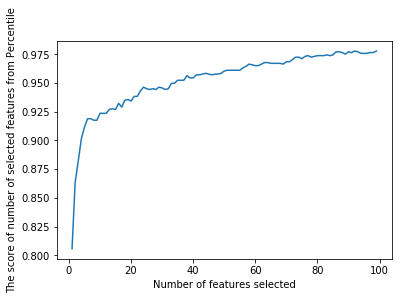

Maximale Genauigkeit ( percentile,f_classif,lsvc ) : 0.9832551908908238 ,  Die Anzahl der Merkmale: 187 ,   precent: 89 %


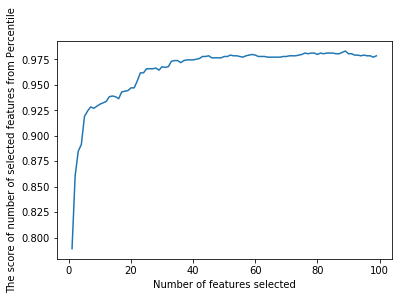

Maximale Genauigkeit ( percentile,f_regression,lda ) : 0.9792364367046216 ,  Die Anzahl der Merkmale: 205 ,   precent: 98 %


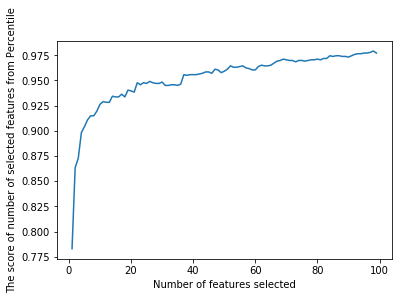

Maximale Genauigkeit ( percentile,f_regression,lsvc ) : 0.9805760214333556 ,  Die Anzahl der Merkmale: 141 ,   precent: 67 %


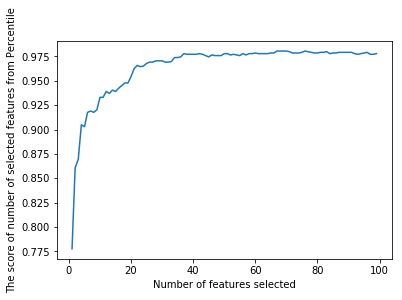

In [97]:
per_c_lda_1,per_c_lda_2,per_c_lda_3,per_c_lda_4=select_percent_ausgabe(f_classif,LinearDiscriminantAnalysis(),x_train_allg_gut,y_train_allg_gut,x_test_allg_gut,y_test_allg_gut,'percentile,f_classif,lda')

per_c_lsvc_1,per_c_lsvc_2,per_c_lsvc_3,per_c_lsvc_4=select_percent_ausgabe(f_classif,svm.LinearSVC(),x_train_allg_gut,y_train_allg_gut,x_test_allg_gut,y_test_allg_gut,'percentile,f_classif,lsvc')

per_r_lda_1,per_r_lda_2,per_r_lda_3,per_r_lda_4=select_percent_ausgabe(f_regression,LinearDiscriminantAnalysis(),x_train_allg_gut,y_train_allg_gut,x_test_allg_gut,y_test_allg_gut,'percentile,f_regression,lda')

per_r_lsvc_1,per_r_lsvc_2,per_r_lsvc_3,per_r_lsvc_4=select_percent_ausgabe(f_regression,svm.LinearSVC(),x_train_allg_gut,y_train_allg_gut,x_test_allg_gut,y_test_allg_gut,'percentile,f_regression,lsvc')




/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Maximale Genauigkeit ( kbest,f_classif,lda ) : 0.9778968519758875 ,   Die Anzahl der Merkmale: 193


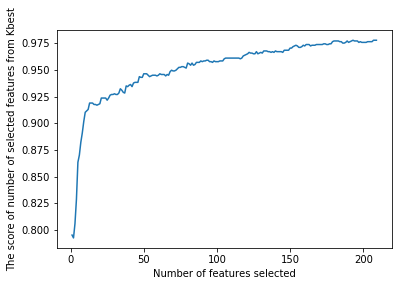

Maximale Genauigkeit ( kbest,f_classif,lsvc ) : 0.9832551908908238 ,   Die Anzahl der Merkmale: 187


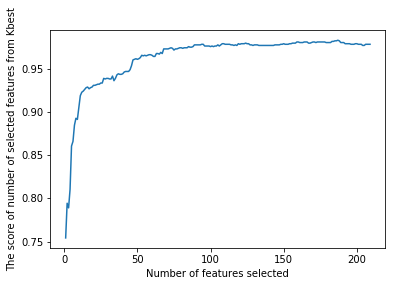

Maximale Genauigkeit ( kbest,f_regression,lsvc ) : 0.9812458137977227 ,   Die Anzahl der Merkmale: 142


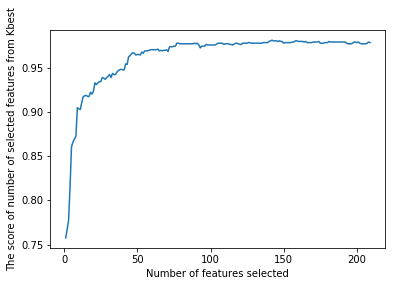

Maximale Genauigkeit ( kbest,f_regression,lda ) : 0.9792364367046216 ,   Die Anzahl der Merkmale: 205


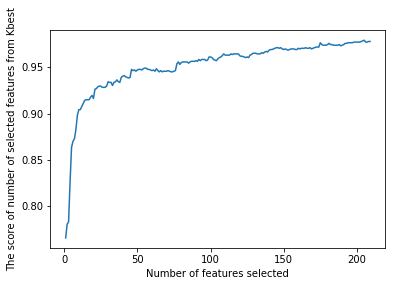

In [98]:
f_c_lda_1,f_c_lda_2,f_c_lda_3,f_c_lda_4,f_c_lda_5=select_kbest_ausgabe(f_classif,LinearDiscriminantAnalysis(),x_train_allg_gut,y_train_allg_gut,x_test_allg_gut,y_test_allg_gut,'kbest,f_classif,lda')


f_c_lsvc_1,f_c_lsvc_2,f_c_lsvc_3,f_c_lsvc_4,f_c_lsvc_5=select_kbest_ausgabe(f_classif,svm.LinearSVC(),x_train_allg_gut,y_train_allg_gut,x_test_allg_gut,y_test_allg_gut,'kbest,f_classif,lsvc')



f_r_lsvc_1,f_r_lsvc_2,f_r_lsvc_3,f_r_lsvc_4,f_r_lsvc_5=select_kbest_ausgabe(f_regression,svm.LinearSVC(),x_train_allg_gut,y_train_allg_gut,x_test_allg_gut,y_test_allg_gut,'kbest,f_regression,lsvc')




f_r_lda_1,f_r_lda_2,f_r_lda_3,f_r_lda_4,f_r_lda_5=select_kbest_ausgabe(f_regression,LinearDiscriminantAnalysis(),x_train_allg_gut,y_train_allg_gut,x_test_allg_gut,y_test_allg_gut,'kbest,f_regression,lda')





/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklear

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklear

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklear

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklear

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklear

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklear

Maximale Genauigkeit ( kbest,mutual_info_regression,lsvc ) : 0.9819156061620897 ,   Die Anzahl der Merkmale: 190


/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


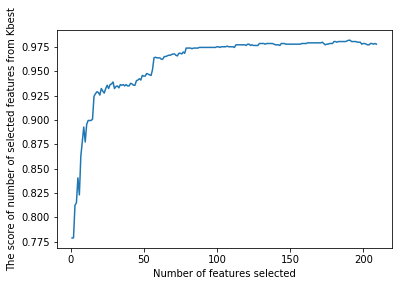

In [99]:
f_m_lsvc_1,f_m_lsvc_2,f_m_lsvc_3,f_m_lsvc_4,f_m_lsvc_5=select_kbest_ausgabe(mutual_info_regression,svm.LinearSVC(),x_train_allg_gut,y_train_allg_gut,x_test_allg_gut,y_test_allg_gut,'kbest,mutual_info_regression,lsvc')





/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklear

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear."

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear."

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear."

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear."

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear."

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear."

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear."

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear."

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear."

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear."

Maximale Genauigkeit ( kbest,mutual_info_regression,lda ) : 0.9772270596115205 ,   Die Anzahl der Merkmale: 206


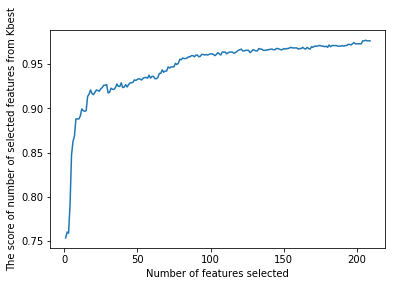

In [100]:
f_m_lda_1,f_m_lda_2,f_m_lda_3,f_m_lda_4,f_m_lda_5=select_kbest_ausgabe(mutual_info_regression,LinearDiscriminantAnalysis(),x_train_allg_gut,y_train_allg_gut,x_test_allg_gut,y_test_allg_gut,'kbest,mutual_info_regression,lda')




/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

Maximale Genauigkeit ( kbest,mutual_info_classif,lda ) : 0.9785666443402545 ,   Die Anzahl der Merkmale: 209


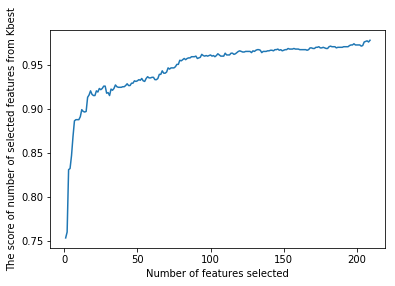

In [101]:
f_m_c_lda_1,f_m_c_lda_2,f_m_c_lda_3,f_m_c_lda_4,f_m_c_lda_5=select_kbest_ausgabe(mutual_info_classif,LinearDiscriminantAnalysis(),x_train_allg_gut,y_train_allg_gut,x_test_allg_gut,y_test_allg_gut,'kbest,mutual_info_classif,lda')




In [102]:
#fdr_f_classif_lsvc_1,fdr_f_classif_lsvc_2,fdr_f_classif_lsvc_3,fdr_f_classif_lsvc_4,fdr_f_classif_lsvc_5,fdr_f_classif_lsvc_6=select_fdr_ausgabe(svm.LinearSVC(),f_classif,x_train_123_allg_gut,y_train_123_allg_gut,x_test_123_allg_gut,y_test_123_allg_gut)



/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Maximale Genauigkeit: ( fdr,f_classif,lda ) : 0.9778968519758875 ,  Die Anzahl der Merkmale: 208 , alpha= 0.6


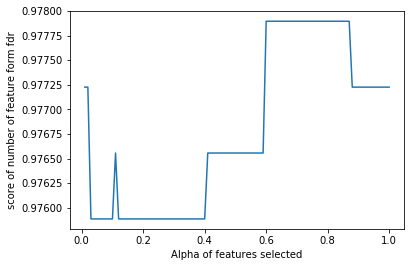

In [103]:
fdr_f_classif_lda_1,fdr_f_classif_lda_2,fdr_f_classif_lda_3,fdr_f_classif_lda_4,fdr_f_classif_lda_5,fdr_f_classif_lda_6=select_fdr_ausgabe(LinearDiscriminantAnalysis(),f_classif,x_train_allg_gut,y_train_allg_gut,x_test_allg_gut,y_test_allg_gut,'fdr,f_classif,lda')




In [104]:
#fpr_f_classif_lsvc_1,fpr_f_classif_lsvc_2,fpr_f_classif_lsvc_3,fpr_f_classif_lsvc_4,fpr_f_classif_lsvc_5,fpr_f_classif_lsvc_6=select_fpr_ausgabe(svm.LinearSVC(),f_classif,x_train_123_allg_gut,y_train_123_allg_gut,x_test_123_allg_gut,y_test_123_allg_gut)



/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Maximale Genauigkeit: ( fpr,f_classif,lda ) : 0.9778968519758875 ,  Die Anzahl der Merkmale: 208 , alpha= 0.6


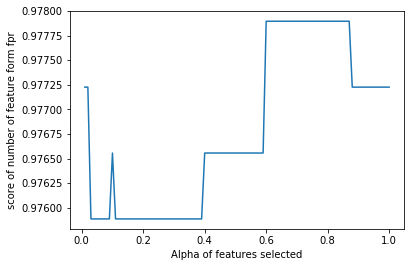

In [105]:
fpr_f_classif_lda_1,fpr_f_classif_lda_2,fpr_f_classif_lda_3,fpr_f_classif_lda_4,fpr_f_classif_lda_5,fpr_f_classif_lda_6=select_fpr_ausgabe(LinearDiscriminantAnalysis(),f_classif,x_train_allg_gut,y_train_allg_gut,x_test_allg_gut,y_test_allg_gut,'fpr,f_classif,lda')





In [106]:
genauigkeit_allg=[lsvc_ohne_allg,lda_ohne_allg,per_c_lda_2,per_c_lsvc_2,per_r_lda_2,per_r_lsvc_2,f_c_lda_4,f_c_lsvc_4,f_r_lda_4,f_r_lsvc_4,f_m_lda_4,f_m_lsvc_4,f_m_c_lda_4,fpr_f_classif_lda_4,fdr_f_classif_lda_4]
anzahl_merkmale_allg=[len(x_train_allg_gut.columns),len(x_train_allg_gut.columns),per_c_lda_3,per_c_lsvc_3,per_r_lda_3,per_r_lsvc_3,f_c_lda_5,f_c_lsvc_5,f_r_lda_5,f_r_lsvc_5,f_m_lda_5,f_m_lsvc_5,f_m_c_lda_5,fpr_f_classif_lda_5,fdr_f_classif_lda_5]
parameter_allg=['/','/',per_c_lda_4,per_c_lsvc_4,per_r_lda_4,per_r_lsvc_4,f_c_lda_5,f_c_lsvc_5,f_r_lda_5,f_r_lsvc_5,f_m_lda_5,f_m_lsvc_5,f_m_c_lda_5,fpr_f_classif_lda_6,fdr_f_classif_lda_6]
selektion_name_allg=['lsvc_ohne_allg','lda_ohne_allg','per_c_lda_Allg','per_c_lsvc_Allg','per_r_lda_Allg','per_r_lsvc_Allg','f_c_lda_Allg','f_c_lsvc_Allg','f_r_lda_Allg','f_r_lsvc_Allg','f_m_lda_Allg','f_m_lsvc_Allg','f_m_c_lda_Allg','fpr_f_classif_lda_Allg','fdr_f_classif_lda_Allg']


In [107]:
def sammel(genauigkeit,anzahl,parameter,selektion_name_allg):
    Ausgabe={'die höchste Genauigkeit':genauigkeit,
       'Die Anzahl der Merkmale':anzahl
             ,'Parameter':parameter}


    Ausgabe_Selektion=pd.DataFrame(data=Ausgabe)
    Ausgabe_Selektion.index=selektion_name_allg
    Ergebnis=Ausgabe_Selektion['die höchste Genauigkeit'][Ausgabe_Selektion['die höchste Genauigkeit']==Ausgabe_Selektion['die höchste Genauigkeit'].max()].index.tolist()
    best=Ausgabe_Selektion.loc[Ergebnis]
    
    return Ausgabe_Selektion,best


In [108]:
list_allg,best_allg=sammel(genauigkeit_allg,anzahl_merkmale_allg,parameter_allg,selektion_name_allg)
print(best_allg)
list_allg

                 Die Anzahl der Merkmale Parameter  die höchste Genauigkeit
per_c_lsvc_Allg                      187        89                 0.983255
f_c_lsvc_Allg                        187       187                 0.983255


Die Anzahl der Merkmale Parameter  \
lsvc_ohne_allg                              210         /   
lda_ohne_allg                               210         /   
per_c_lda_Allg                              193        92   
per_c_lsvc_Allg                             187        89   
per_r_lda_Allg                              205        98   
per_r_lsvc_Allg                             141        67   
f_c_lda_Allg                                193       193   
f_c_lsvc_Allg                               187       187   
f_r_lda_Allg                                205       205   
f_r_lsvc_Allg                               142       142   
f_m_lda_Allg                                206       206   
f_m_lsvc_Allg                               190       190   
f_m_c_lda_Allg                              209       209   
fpr_f_classif_lda_Allg                      208       0.6   
fdr_f_classif_lda_Allg                      208       0.6   

                        die höchste Genauigkeit  
lsvc_ohne_allg                         0.978567  
lda_ohne_allg                          0.977227  
per_c_lda_Allg                         0.977897  
per_c_lsvc_Allg                        0.983255  
per_r_lda_Allg                         0.979236  
per_r_lsvc_Allg                        0.980576  
f_c_lda_Allg                           0.977897  
f_c_lsvc_Allg                          0.983255  
f_r_lda_Allg                           0.979236  
f_r_lsvc_Allg                          0.981246  
f_m_lda_Allg                           0.977227  
f_m_lsvc_Allg                          0.981916  
f_m_c_lda_Allg                         0.978567  
fpr_f_classif_lda_Allg                 0.977897  
fdr_f_classif_lda_Allg                 0.977897

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Maximale Genauigkeit ( percentile,f_classif,lda,80 ) : 0.9531145344943067 ,  Die Anzahl der Merkmale: 78 ,   precent: 98 %


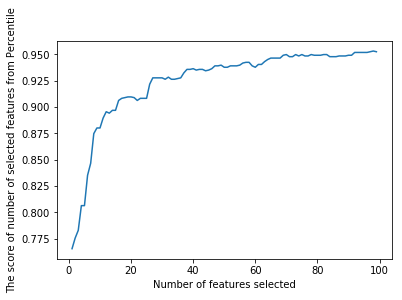

Maximale Genauigkeit ( percentile,f_classif,lsvc,80 ) : 0.9678499665103818 ,  Die Anzahl der Merkmale: 56 ,   precent: 70 %


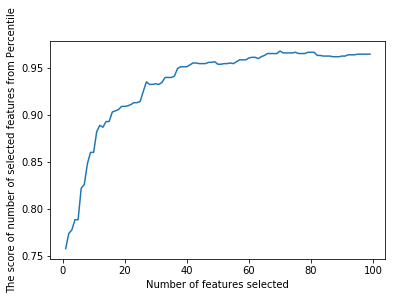

Maximale Genauigkeit ( percentile,f_regression,lda,80 ) : 0.9517749497655726 ,  Die Anzahl der Merkmale: 73 ,   precent: 92 %


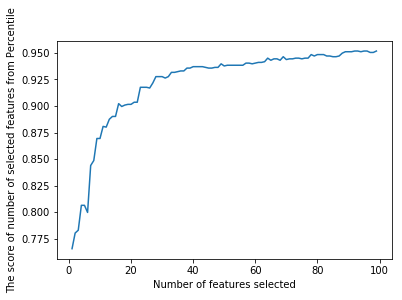

Maximale Genauigkeit ( percentile,f_regression,lsvc ) : 0.9678499665103818 ,  Die Anzahl der Merkmale: 71 ,   precent: 89 %


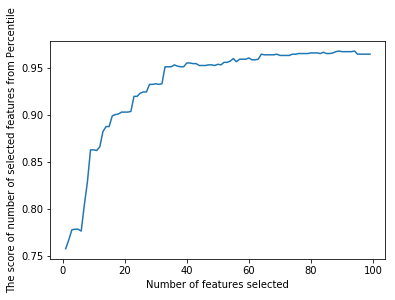

In [109]:
per_c_lda_1_80,per_c_lda_2_80,per_c_lda_3_80,per_c_lda_4_80=select_percent_ausgabe(f_classif,LinearDiscriminantAnalysis(),x_train_gut_80,y_train_gut_80,x_test_gut_80,y_test_gut_80,'percentile,f_classif,lda,80')

per_c_lsvc_1_80,per_c_lsvc_2_80,per_c_lsvc_3_80,per_c_lsvc_4_80=select_percent_ausgabe(f_classif,svm.LinearSVC(),x_train_gut_80,y_train_gut_80,x_test_gut_80,y_test_gut_80,'percentile,f_classif,lsvc,80')

per_r_lda_1_80,per_r_lda_2_80,per_r_lda_3_80,per_r_lda_4_80=select_percent_ausgabe(f_regression,LinearDiscriminantAnalysis(),x_train_gut_80,y_train_gut_80,x_test_gut_80,y_test_gut_80,'percentile,f_regression,lda,80')

per_r_lsvc_1_80,per_r_lsvc_2_80,per_r_lsvc_3_80,per_r_lsvc_4_80=select_percent_ausgabe(f_regression,svm.LinearSVC(),x_train_gut_80,y_train_gut_80,x_test_gut_80,y_test_gut_80,'percentile,f_regression,lsvc')




/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Maximale Genauigkeit ( kbest,f_classif,lsvc ) : 0.9531145344943067 ,   Die Anzahl der Merkmale: 78


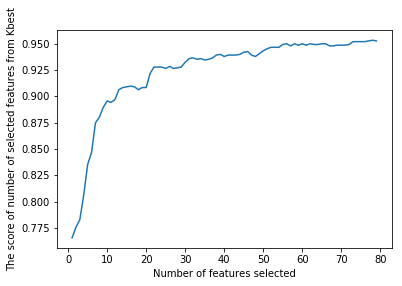

Maximale Genauigkeit ( kbest,f_classif,lsvc ) : 0.9678499665103818 ,   Die Anzahl der Merkmale: 56


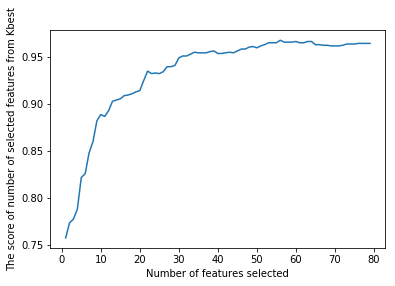

Maximale Genauigkeit ( kbest,f_regression,lda ) : 0.9517749497655726 ,   Die Anzahl der Merkmale: 73


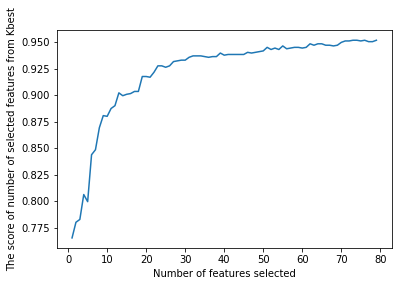

Maximale Genauigkeit ( kbest,f_regression,lsvc ) : 0.9678499665103818 ,   Die Anzahl der Merkmale: 71


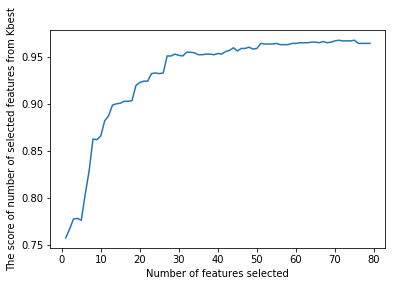

In [110]:
f_c_lda_1_80,f_c_lda_2_80,f_c_lda_3_80,f_c_lda_4_80,f_c_lda_5_80=select_kbest_ausgabe(f_classif,LinearDiscriminantAnalysis(),x_train_gut_80,y_train_gut_80,x_test_gut_80,y_test_gut_80,'kbest,f_classif,lsvc')



f_c_lsvc_1_80,f_c_lsvc_2_80,f_c_lsvc_3_80,f_c_lsvc_4_80,f_c_lsvc_5_80=select_kbest_ausgabe(f_classif,svm.LinearSVC(),x_train_gut_80,y_train_gut_80,x_test_gut_80,y_test_gut_80,'kbest,f_classif,lsvc')



f_re_lda_1_80,f_re_lda_2_80,f_re_lda_3_80,f_re_lda_4_80,f_re_lda_5_80=select_kbest_ausgabe(f_regression,LinearDiscriminantAnalysis(),x_train_gut_80,y_train_gut_80,x_test_gut_80,y_test_gut_80,'kbest,f_regression,lda')




f_re_lsvc_1_80,f_re_lsvc_2_80,f_re_lsvc_3_80,f_re_lsvc_4_80,f_re_lsvc_5_80=select_kbest_ausgabe(f_regression,svm.LinearSVC(),x_train_gut_80,y_train_gut_80,x_test_gut_80,y_test_gut_80,'kbest,f_regression,lsvc')



/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

Maximale Genauigkeit ( kbest,mutual_info_regression,lda ) : 0.9531145344943067 ,   Die Anzahl der Merkmale: 77


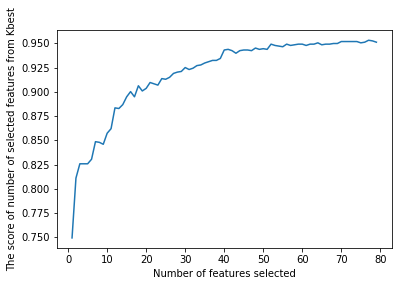

Maximale Genauigkeit ( kbest,mutual_info_regression,lsvc ) : 0.971198928332217 ,   Die Anzahl der Merkmale: 72


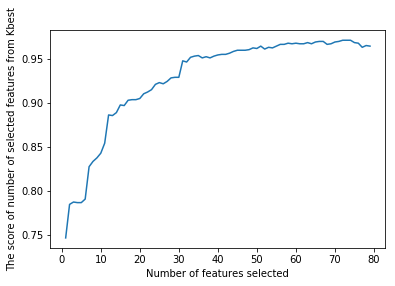

In [111]:
f_m_lda_1_80,f_m_lda_2_80,f_m_lda_3_80,f_m_lda_4_80,f_m_lda_5_80=select_kbest_ausgabe(mutual_info_regression,LinearDiscriminantAnalysis(),x_train_gut_80.astype(float),y_train_gut_80.astype(float),x_test_gut_80.astype(float),y_test_gut_80.astype(float),'kbest,mutual_info_regression,lda')




f_m_lsvc_1_80,f_m_lsvc_2_80,f_m_lsvc_3_80,f_m_lsvc_4_80,f_m_lsvc_5_80=select_kbest_ausgabe(mutual_info_regression,svm.LinearSVC(),x_train_gut_80.astype(float),y_train_gut_80.astype(float),x_test_gut_80.astype(float),y_test_gut_80.astype(float),'kbest,mutual_info_regression,lsvc')






/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

Maximale Genauigkeit ( kbest,mutual_info_classif,lda ) : 0.9531145344943067 ,   Die Anzahl der Merkmale: 77


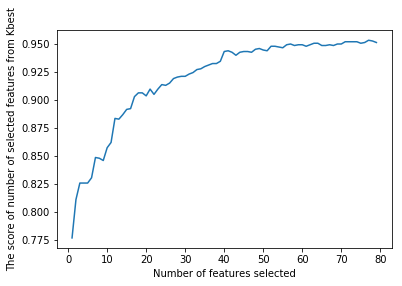

In [112]:
f_m_c_lda_1_80,f_m_c_lda_2_80,f_m_c_lda_3_80,f_m_c_lda_4_80,f_m_c_lda_5_80=select_kbest_ausgabe(mutual_info_classif,LinearDiscriminantAnalysis(),x_train_gut_80.astype(float),y_train_gut_80.astype(float),x_test_gut_80.astype(float),y_test_gut_80.astype(float),'kbest,mutual_info_classif,lda')



/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Maximale Genauigkeit: ( fdr,f_classif,lda ) : 0.9531145344943067 ,  Die Anzahl der Merkmale: 78 , alpha= 0.28
Maximale Genauigkeit: ( fpr,f_classif,lda ) : 0.9531145344943067 ,  Die Anzahl der Merkmale: 78 , alpha= 0.27


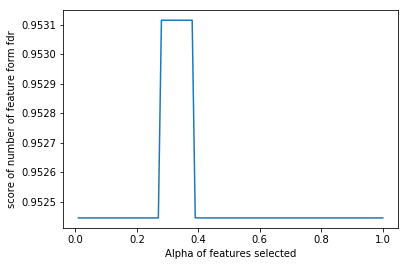

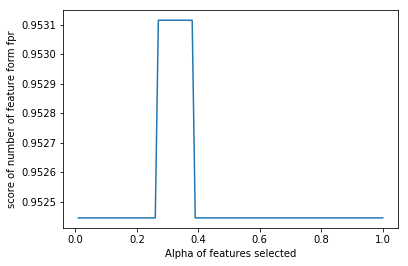

In [113]:
fdr_f_classif_lda_1_80,fdr_f_classif_lda_2_80,fdr_f_classif_lda_3_80,fdr_f_classif_lda_4_80,fdr_f_classif_lda_5_80,fdr_f_classif_lda_6_80=select_fdr_ausgabe(LinearDiscriminantAnalysis(),f_classif,x_train_gut_80,y_train_gut_80,x_test_gut_80,y_test_gut_80,'fdr,f_classif,lda')




fpr_f_classif_lda_1_80,fpr_f_classif_lda_2_80,fpr_f_classif_lda_3_80,fpr_f_classif_lda_4_80,fpr_f_classif_lda_5_80,fpr_f_classif_lda_6_80=select_fpr_ausgabe(LinearDiscriminantAnalysis(),f_classif,x_train_gut_80,y_train_gut_80,x_test_gut_80,y_test_gut_80,'fpr,f_classif,lda')





In [114]:
genauigkeit_80=[lsvc_ohne_80_gut,lda_ohne_80_gut,per_c_lda_2_80,per_c_lsvc_2_80,per_r_lda_2_80,per_r_lsvc_2_80,f_c_lda_4_80,f_c_lsvc_4_80,f_re_lda_4_80,f_re_lsvc_4_80,f_m_lda_4_80,f_m_lsvc_4_80,f_m_c_lda_4_80,fpr_f_classif_lda_4_80,fdr_f_classif_lda_4_80]
anzahl_merkmale_80=[len(x_train_gut_80.columns),len(x_train_gut_80.columns),per_c_lda_3_80,per_c_lsvc_3_80,per_r_lda_3_80,per_r_lsvc_3_80,f_c_lda_5_80,f_c_lsvc_5_80,f_re_lda_5_80,f_re_lsvc_5_80,f_m_lda_5_80,f_m_lsvc_5_80,f_m_c_lda_5_80,fpr_f_classif_lda_5_80,fdr_f_classif_lda_5_80]
parameter_80=['/','/',per_c_lda_4_80,per_c_lsvc_4_80,per_r_lda_4_80,per_r_lsvc_4_80,f_c_lda_5_80,f_c_lsvc_5_80,f_re_lda_5_80,f_re_lsvc_5_80,f_m_lda_5_80,f_m_lsvc_5_80,f_m_c_lda_5_80,fpr_f_classif_lda_6_80,fdr_f_classif_lda_6_80]
selektion_name_80=['lsvc_ohne_80','lda_ohne_80','per_c_lda_80','per_c_lsvc_80','per_r_lda_80','per_r_lsvc_80','f_c_lda_80','f_c_lsvc_80','f_r_lda_80','f_r_lsvc_80','f_m_lda_80','f_m_lsvc_80','f_m_c_lda_80','fpr_f_classif_lda_80','fdr_f_classif_lda_80']




In [115]:
list_80,best_80=sammel(genauigkeit_80,anzahl_merkmale_80,parameter_80,selektion_name_80)
print(best_80)
list_80

             Die Anzahl der Merkmale Parameter  die höchste Genauigkeit
f_m_lsvc_80                       72        72                 0.971199


Die Anzahl der Merkmale Parameter  \
lsvc_ohne_80                               80         /   
lda_ohne_80                                80         /   
per_c_lda_80                               78        98   
per_c_lsvc_80                              56        70   
per_r_lda_80                               73        92   
per_r_lsvc_80                              71        89   
f_c_lda_80                                 78        78   
f_c_lsvc_80                                56        56   
f_r_lda_80                                 73        73   
f_r_lsvc_80                                71        71   
f_m_lda_80                                 77        77   
f_m_lsvc_80                                72        72   
f_m_c_lda_80                               77        77   
fpr_f_classif_lda_80                       78      0.27   
fdr_f_classif_lda_80                       78      0.28   

                      die höchste Genauigkeit  
lsvc_ohne_80                         0.965171  
lda_ohne_80                          0.952445  
per_c_lda_80                         0.953115  
per_c_lsvc_80                        0.967850  
per_r_lda_80                         0.951775  
per_r_lsvc_80                        0.967850  
f_c_lda_80                           0.953115  
f_c_lsvc_80                          0.967850  
f_r_lda_80                           0.951775  
f_r_lsvc_80                          0.967850  
f_m_lda_80                           0.953115  
f_m_lsvc_80                          0.971199  
f_m_c_lda_80                         0.953115  
fpr_f_classif_lda_80                 0.953115  
fdr_f_classif_lda_80                 0.953115

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [ 29  60 234 287 303 341 351 386 434 460 545 628] are constant.
  UserWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Maximale Genauigkeit ( percentile,f_classif,lda,all ) : 0.9872739450770261 ,  Die Anzahl der Merkmale: 402 ,   precent: 64 %


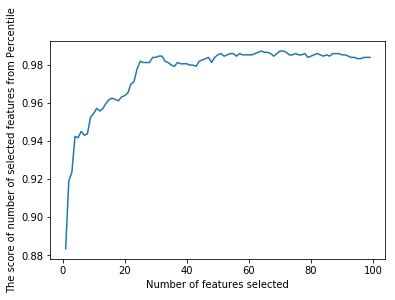

Maximale Genauigkeit ( percentile,f_classif,lsvc,all ) : 0.9906229068988613 ,  Die Anzahl der Merkmale: 515 ,   precent: 82 %


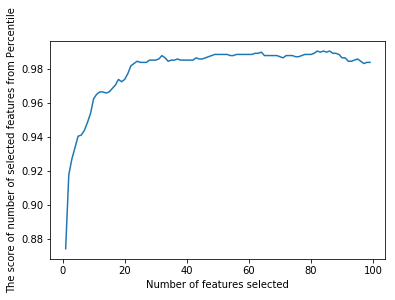

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:303: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/jiangqiuchen/a

Maximale Genauigkeit ( percentile,f_regression,lda,all ) : 0.9866041527126591 ,  Die Anzahl der Merkmale: 515 ,   precent: 82 %


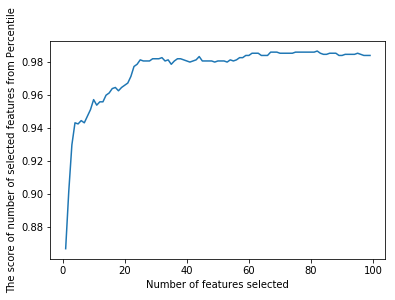

Maximale Genauigkeit ( percentile,f_regression,lsvc,all ) : 0.9892833221701273 ,  Die Anzahl der Merkmale: 183 ,   precent: 29 %


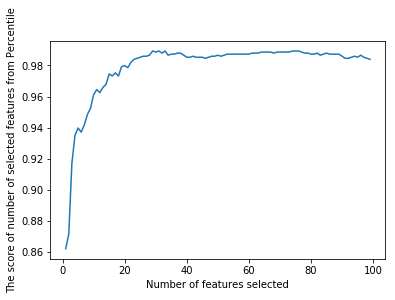

In [116]:
per_c_lda_1_all,per_c_lda_2_all,per_c_lda_3_all,per_c_lda_4_all=select_percent_ausgabe(f_classif,LinearDiscriminantAnalysis(),x_train,y_train,x_test,y_test,'percentile,f_classif,lda,all')

per_c_lsvc_1_all,per_c_lsvc_2_all,per_c_lsvc_3_all,per_c_lsvc_4_all=select_percent_ausgabe(f_classif,svm.LinearSVC(),x_train,y_train,x_test,y_test,'percentile,f_classif,lsvc,all')

per_r_lda_1_all,per_r_lda_2_all,per_r_lda_3_all,per_r_lda_4_all=select_percent_ausgabe(f_regression,LinearDiscriminantAnalysis(),x_train,y_train,x_test,y_test,'percentile,f_regression,lda,all')

per_r_lsvc_1_all,per_r_lsvc_2_all,per_r_lsvc_3_all,per_r_lsvc_4_all=select_percent_ausgabe(f_regression,svm.LinearSVC(),x_train,y_train,x_test,y_test,'percentile,f_regression,lsvc,all')



/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [ 29  60 234 287 303 341 351 386 434 460 545 628] are constant.
  UserWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Maximale Genauigkeit ( kbest,f_classif,lsvc ) : 0.9892833221701273 ,   Die Anzahl der Merkmale: 403


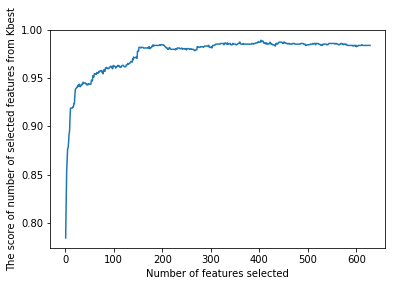

Maximale Genauigkeit ( kbest,f_classif,lsvc ) : 0.9906229068988613 ,   Die Anzahl der Merkmale: 512


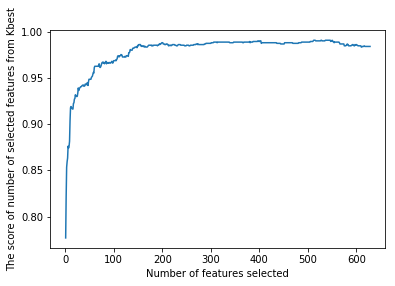

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:303: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/jiangqiuchen/a

Maximale Genauigkeit ( kbest,f_regression,lda ) : 0.9872739450770261 ,   Die Anzahl der Merkmale: 423


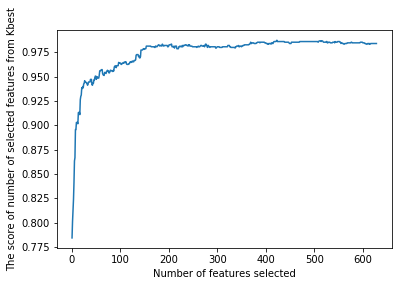

Maximale Genauigkeit ( kbest,f_regression,lsvc ) : 0.9892833221701273 ,   Die Anzahl der Merkmale: 180


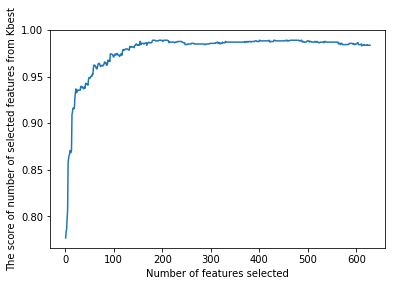

In [117]:
f_c_lda_1_all,f_c_lda_2_all,f_c_lda_3_all,f_c_lda_4_all,f_c_lda_5_all=select_kbest_ausgabe(f_classif,LinearDiscriminantAnalysis(),x_train,y_train,x_test,y_test,'kbest,f_classif,lsvc')



f_c_lsvc_1_all,f_c_lsvc_2_all,f_c_lsvc_3_all,f_c_lsvc_4_all,f_c_lsvc_5_all=select_kbest_ausgabe(f_classif,svm.LinearSVC(),x_train,y_train,x_test,y_test,'kbest,f_classif,lsvc')



f_re_lda_1_all,f_re_lda_2_all,f_re_lda_3_all,f_re_lda_4_all,f_re_lda_5_all=select_kbest_ausgabe(f_regression,LinearDiscriminantAnalysis(),x_train,y_train,x_test,y_test,'kbest,f_regression,lda')




f_re_lsvc_1_all,f_re_lsvc_2_all,f_re_lsvc_3_all,f_re_lsvc_4_all,f_re_lsvc_5_all=select_kbest_ausgabe(f_regression,svm.LinearSVC(),x_train,y_train,x_test,y_test,'kbest,f_regression,lsvc')




/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

Maximale Genauigkeit ( kbest,mutual_info_regression,lda ) : 0.9845947756195579 ,   Die Anzahl der Merkmale: 588


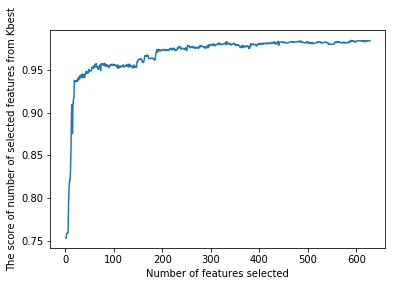

Maximale Genauigkeit ( kbest,mutual_info_regression,lsvc ) : 0.9906229068988613 ,   Die Anzahl der Merkmale: 534


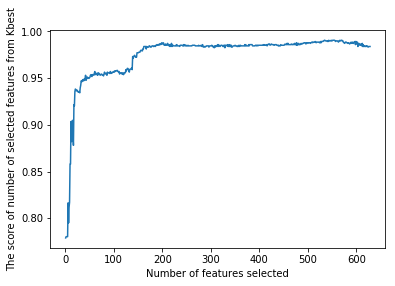

In [118]:
f_m_lda_1_all,f_m_lda_2_all,f_m_lda_3_all,f_m_lda_4_all,f_m_lda_5_all=select_kbest_ausgabe(mutual_info_regression,LinearDiscriminantAnalysis(),x_train.astype(float),y_train.astype(float),x_test.astype(float),y_test.astype(float),'kbest,mutual_info_regression,lda')




f_m_lsvc_1_all,f_m_lsvc_2_all,f_m_lsvc_3_all,f_m_lsvc_4_all,f_m_lsvc_5_all=select_kbest_ausgabe(mutual_info_regression,svm.LinearSVC(),x_train.astype(float),y_train.astype(float),x_test.astype(float),y_test.astype(float),'kbest,mutual_info_regression,lsvc')





/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

Maximale Genauigkeit ( kbest,mutual_info_classif,lda ) : 0.9839249832551908 ,   Die Anzahl der Merkmale: 480


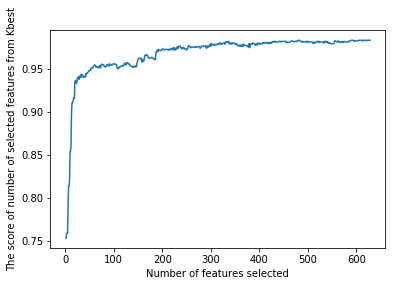

In [119]:
f_m_c_lda_1_all,f_m_c_lda_2_all,f_m_c_lda_3_all,f_m_c_lda_4_all,f_m_c_lda_5_all=select_kbest_ausgabe(mutual_info_classif,LinearDiscriminantAnalysis(),x_train.astype(float),y_train.astype(float),x_test.astype(float),y_test.astype(float),'kbest,mutual_info_classif,lda')




/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [ 29  60 234 287 303 341 351 386 434 460 545 628] are constant.
  UserWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:619: RuntimeWarning: invalid value encountered in less_equal
  np.arange(1, n_features + 1)]
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:622: RuntimeWarning: invalid value encountered in less_equal
  return self.pvalues_ <= selected.max()
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

Maximale Genauigkeit: ( fdr,f_classif,lda ) : 0.985264567983925 ,  Die Anzahl der Merkmale: 574 , alpha= 0.01


/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:560: RuntimeWarning: invalid value encountered in less
  return self.pvalues_ < self.alpha


Maximale Genauigkeit: ( fpr,f_classif,lda ) : 0.985264567983925 ,  Die Anzahl der Merkmale: 574 , alpha= 0.01


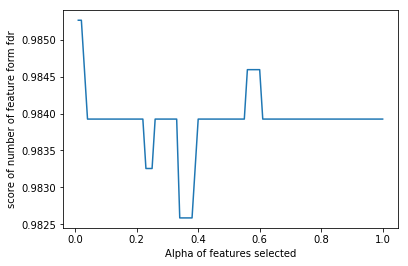

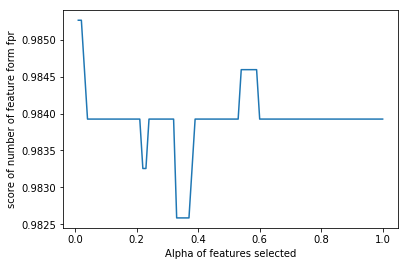

In [120]:
fdr_f_classif_lda_1_all,fdr_f_classif_lda_2_all,fdr_f_classif_lda_3_all,fdr_f_classif_lda_4_all,fdr_f_classif_lda_5_all,fdr_f_classif_lda_6_all=select_fdr_ausgabe(LinearDiscriminantAnalysis(),f_classif,x_train,y_train,x_test,y_test,'fdr,f_classif,lda')




fpr_f_classif_lda_1_all,fpr_f_classif_lda_2_all,fpr_f_classif_lda_3_all,fpr_f_classif_lda_4_all,fpr_f_classif_lda_5_all,fpr_f_classif_lda_6_all=select_fpr_ausgabe(LinearDiscriminantAnalysis(),f_classif,x_train,y_train,x_test,y_test,'fpr,f_classif,lda')






/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [ 29  60 234 287 303 341 351 386 434 460 545 628] are constant.
  UserWarning)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:619: RuntimeWarning: invalid value encountered in less_equal
  np.arange(1, n_features + 1)]
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:622: RuntimeWarning: invalid value encountered in less_equal
  return self.pvalues_ <= selected.max()
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

Maximale Genauigkeit: ( fdr,f_classif,lda ) : 0.9866041527126591 ,  Die Anzahl der Merkmale: 574 , alpha= 0.01


/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:560: RuntimeWarning: invalid value encountered in less
  return self.pvalues_ < self.alpha


Maximale Genauigkeit: ( fpr,f_classif,lda ) : 0.9866041527126591 ,  Die Anzahl der Merkmale: 574 , alpha= 0.01


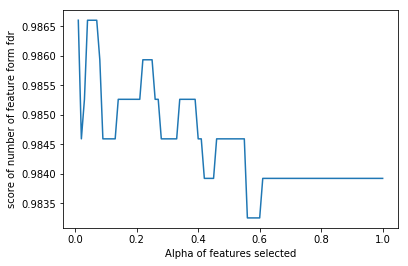

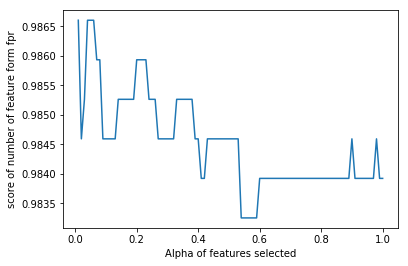

In [121]:
fdr_f_classif_lsvc_1_all,fdr_f_classif_lsvc_2_all,fdr_f_classif_lsvc_3_all,fdr_f_classif_lsvc_4_all,fdr_f_classif_lsvc_5_all,fdr_f_classif_lsvc_6_all=select_fdr_ausgabe(svm.LinearSVC(),f_classif,x_train,y_train,x_test,y_test,'fdr,f_classif,lda')




fpr_f_classif_lsvc_1_all,fpr_f_classif_lsvc_2_all,fpr_f_classif_lsvc_3_all,fpr_f_classif_lsvc_4_all,fpr_f_classif_lsvc_5_all,fpr_f_classif_lsvc_6_all=select_fpr_ausgabe(svm.LinearSVC(),f_classif,x_train,y_train,x_test,y_test,'fpr,f_classif,lda')




In [122]:
genauigkeit_all=[lsvc_ohne_all,lda_ohne_all,per_c_lda_2_all,per_c_lsvc_2_all,per_r_lda_2_all,per_r_lsvc_2_all,f_c_lda_4_all,f_c_lsvc_4_all,f_re_lda_4_all,f_re_lsvc_4_all,f_m_lda_4_all,f_m_lsvc_4_all,f_m_c_lda_4_all,fpr_f_classif_lda_4_all,fdr_f_classif_lda_4_all]
anzahl_merkmale_all=[len(x_train.columns),len(x_train.columns),per_c_lda_3_all,per_c_lsvc_3_all,per_r_lda_3_all,per_r_lsvc_3_all,f_c_lda_5_all,f_c_lsvc_5_all,f_re_lda_5_all,f_re_lsvc_5_all,f_m_lda_5_all,f_m_lsvc_5_all,f_m_c_lda_5_all,fpr_f_classif_lda_5_all,fdr_f_classif_lda_5_all]
parameter_all=['/','/',per_c_lda_4_all,per_c_lsvc_4_all,per_r_lda_4_all,per_r_lsvc_4_all,f_c_lda_5_all,f_c_lsvc_5_all,f_re_lda_5_all,f_re_lsvc_5_all,f_m_lda_5_all,f_m_lsvc_5_all,f_m_c_lda_5_all,fpr_f_classif_lda_6_all,fdr_f_classif_lda_6_all]
selektion_name_all=['lsvc_ohne_all','lda_ohne_all','per_c_lda_all','per_c_lsvc_all','per_r_lda_all','per_r_lsvc_all','f_c_lda_all','f_c_lsvc_all','f_r_lda_all','f_r_lsvc_all','f_m_lda_all','f_m_lsvc_all','f_m_c_lda_all','fpr_f_classif_lda_all','fdr_f_classif_lda_all']





In [123]:
list_all,best_all=sammel(genauigkeit_all,anzahl_merkmale_all,parameter_all,selektion_name_all)
print(best_all)
list_all

                Die Anzahl der Merkmale Parameter  die höchste Genauigkeit
per_c_lsvc_all                      515        82                 0.990623
f_c_lsvc_all                        512       512                 0.990623
f_m_lsvc_all                        534       534                 0.990623


Die Anzahl der Merkmale Parameter  \
lsvc_ohne_all                              629         /   
lda_ohne_all                               629         /   
per_c_lda_all                              402        64   
per_c_lsvc_all                             515        82   
per_r_lda_all                              515        82   
per_r_lsvc_all                             183        29   
f_c_lda_all                                403       403   
f_c_lsvc_all                               512       512   
f_r_lda_all                                423       423   
f_r_lsvc_all                               180       180   
f_m_lda_all                                588       588   
f_m_lsvc_all                               534       534   
f_m_c_lda_all                              480       480   
fpr_f_classif_lda_all                      574      0.01   
fdr_f_classif_lda_all                      574      0.01   

                       die höchste Genauigkeit  
lsvc_ohne_all                         0.983925  
lda_ohne_all                          0.983925  
per_c_lda_all                         0.987274  
per_c_lsvc_all                        0.990623  
per_r_lda_all                         0.986604  
per_r_lsvc_all                        0.989283  
f_c_lda_all                           0.989283  
f_c_lsvc_all                          0.990623  
f_r_lda_all                           0.987274  
f_r_lsvc_all                          0.989283  
f_m_lda_all                           0.984595  
f_m_lsvc_all                          0.990623  
f_m_c_lda_all                         0.983925  
fpr_f_classif_lda_all                 0.985265  
fdr_f_classif_lda_all                 0.985265

In [237]:
f_c_lsvc_3_all

0
0              a_z_Windows_mean_difference
1                             SMA_M_0-10HZ
2                           phi_1pkt_z_Min
3                       magnet_z_Energy_ca
4                 fft_sum_Spannung_60-80HZ
5        magnet_x_dwt_lowpass_absolut_mean
6                             a_z_variance
7                fft_sum_Spannung_80-100HZ
8                     a_x_root_mean_square
9                            SMA_M_70-80HZ
10                      Spannung_quartiles
11            DC_Komponent_Spannung_0-20HZ
12                DC_Komponent_a_z_20-40HZ
13                            SMA_a_0-10HZ
14           Covariance_Beschleunigung_y_z
15                           a_y_Energy_ca
16                            Spannung_Ar3
17                     Energy_Strom_0-20HZ
18                            Spannung_IQR
19              phi_1pkt_x_dwt_lowpass_std
20                    a_y_root_mean_square
21              Correlation_Magnetfeld_x_y
22                           SMA_M_30-40HZ
23                     fft_sum_a_x_40-60HZ
24                          SMA_a_90-100HZ
25                               Strom_Ar4
26                        magnet_z_Entropy
27                           magnet_x_mean
28          DC_Komponent_magnet_x_80-100HZ
29                      Energy_a_z_20-40HZ
..                                     ...
482             Distanz_beschleunigung_x_z
483            fft_sum_phi_1pkt_x_80-100HZ
484                           magnet_y_std
485     phi_1pkt_z_Number_of_zero_crossing
486                   Strom_Variance_trend
487          DC_Komponent_Spannung_20-40HZ
488          a_z_Dwt_lowpass_average_power
489                      magnet_x_skewness
490          Covariance_Beschleunigung_x_y
491                    Energy_a_z_80-100HZ
492              Spannung_root_mean_square
493                           a_z_kurtosis
494                         phi_1pkt_z_Ar1
495                         phi_1pkt_y_Ar3
496                  phi_1pkt_z_Mean_trend
497                     magnet_z_Energy_cd
498                         phi_1pkt_x_Max
499                     a_y_Variance_trend
500                 Energy_magnet_y_0-20HZ
501    Spannung_Dwt_highpass_average_power
502                                a_y_std
503                   a_y_dwt_highpass_std
504                Energy_magnet_y_40-60HZ
505              fft_sum_phi_1pkt_y_0-20HZ
506                          SMA_M_40-50HZ
507                        magnet_y_median
508  phi_1pkt_x_Dwt_highpass_average_power
509            phi_1pkt_y_root_mean_square
510                   phi_1pkt_z_Energy_ca
511                         SMA_W_90-100HZ

[512 rows x 1 columns]

In [124]:
print(best_all)
list_all

                Die Anzahl der Merkmale Parameter  die höchste Genauigkeit
per_c_lsvc_all                      515        82                 0.990623
f_c_lsvc_all                        512       512                 0.990623
f_m_lsvc_all                        534       534                 0.990623


Die Anzahl der Merkmale Parameter  \
lsvc_ohne_all                              629         /   
lda_ohne_all                               629         /   
per_c_lda_all                              402        64   
per_c_lsvc_all                             515        82   
per_r_lda_all                              515        82   
per_r_lsvc_all                             183        29   
f_c_lda_all                                403       403   
f_c_lsvc_all                               512       512   
f_r_lda_all                                423       423   
f_r_lsvc_all                               180       180   
f_m_lda_all                                588       588   
f_m_lsvc_all                               534       534   
f_m_c_lda_all                              480       480   
fpr_f_classif_lda_all                      574      0.01   
fdr_f_classif_lda_all                      574      0.01   

                       die höchste Genauigkeit  
lsvc_ohne_all                         0.983925  
lda_ohne_all                          0.983925  
per_c_lda_all                         0.987274  
per_c_lsvc_all                        0.990623  
per_r_lda_all                         0.986604  
per_r_lsvc_all                        0.989283  
f_c_lda_all                           0.989283  
f_c_lsvc_all                          0.990623  
f_r_lda_all                           0.987274  
f_r_lsvc_all                          0.989283  
f_m_lda_all                           0.984595  
f_m_lsvc_all                          0.990623  
f_m_c_lda_all                         0.983925  
fpr_f_classif_lda_all                 0.985265  
fdr_f_classif_lda_all                 0.985265

In [125]:
print(best_allg)
list_allg

                 Die Anzahl der Merkmale Parameter  die höchste Genauigkeit
per_c_lsvc_Allg                      187        89                 0.983255
f_c_lsvc_Allg                        187       187                 0.983255


Die Anzahl der Merkmale Parameter  \
lsvc_ohne_allg                              210         /   
lda_ohne_allg                               210         /   
per_c_lda_Allg                              193        92   
per_c_lsvc_Allg                             187        89   
per_r_lda_Allg                              205        98   
per_r_lsvc_Allg                             141        67   
f_c_lda_Allg                                193       193   
f_c_lsvc_Allg                               187       187   
f_r_lda_Allg                                205       205   
f_r_lsvc_Allg                               142       142   
f_m_lda_Allg                                206       206   
f_m_lsvc_Allg                               190       190   
f_m_c_lda_Allg                              209       209   
fpr_f_classif_lda_Allg                      208       0.6   
fdr_f_classif_lda_Allg                      208       0.6   

                        die höchste Genauigkeit  
lsvc_ohne_allg                         0.978567  
lda_ohne_allg                          0.977227  
per_c_lda_Allg                         0.977897  
per_c_lsvc_Allg                        0.983255  
per_r_lda_Allg                         0.979236  
per_r_lsvc_Allg                        0.980576  
f_c_lda_Allg                           0.977897  
f_c_lsvc_Allg                          0.983255  
f_r_lda_Allg                           0.979236  
f_r_lsvc_Allg                          0.981246  
f_m_lda_Allg                           0.977227  
f_m_lsvc_Allg                          0.981916  
f_m_c_lda_Allg                         0.978567  
fpr_f_classif_lda_Allg                 0.977897  
fdr_f_classif_lda_Allg                 0.977897

In [126]:
print(best_80)
list_80

             Die Anzahl der Merkmale Parameter  die höchste Genauigkeit
f_m_lsvc_80                       72        72                 0.971199


Die Anzahl der Merkmale Parameter  \
lsvc_ohne_80                               80         /   
lda_ohne_80                                80         /   
per_c_lda_80                               78        98   
per_c_lsvc_80                              56        70   
per_r_lda_80                               73        92   
per_r_lsvc_80                              71        89   
f_c_lda_80                                 78        78   
f_c_lsvc_80                                56        56   
f_r_lda_80                                 73        73   
f_r_lsvc_80                                71        71   
f_m_lda_80                                 77        77   
f_m_lsvc_80                                72        72   
f_m_c_lda_80                               77        77   
fpr_f_classif_lda_80                       78      0.27   
fdr_f_classif_lda_80                       78      0.28   

                      die höchste Genauigkeit  
lsvc_ohne_80                         0.965171  
lda_ohne_80                          0.952445  
per_c_lda_80                         0.953115  
per_c_lsvc_80                        0.967850  
per_r_lda_80                         0.951775  
per_r_lsvc_80                        0.967850  
f_c_lda_80                           0.953115  
f_c_lsvc_80                          0.967850  
f_r_lda_80                           0.951775  
f_r_lsvc_80                          0.967850  
f_m_lda_80                           0.953115  
f_m_lsvc_80                          0.971199  
f_m_c_lda_80                         0.953115  
fpr_f_classif_lda_80                 0.953115  
fdr_f_classif_lda_80                 0.953115

In [172]:
importance_ende_rfc=importance(RandomForestClassifier(),x_train,y_train,x.columns)

allg_gut_ende_rfc=importance_ende_rfc[importance_ende_rfc[0]>0]

allg_gut_ende_name_rfc=(allg_gut_ende_rfc.index).tolist()

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [173]:
allg_gut_ende_rfc

0
SMA_M_0-10HZ                           0.000569
phi_1pkt_z_Min                         0.000160
phi_1pkt_y_skewness                    0.000171
magnet_z_Energy_ca                     0.005320
fft_sum_Spannung_60-80HZ               0.000357
magnet_x_dwt_lowpass_absolut_mean      0.000669
a_z_variance                           0.000493
fft_sum_Spannung_80-100HZ              0.000071
a_x_root_mean_square                   0.000099
SMA_M_70-80HZ                          0.001017
Spannung_quartiles                     0.000647
DC_Komponent_a_y_80-100HZ              0.000114
DC_Komponent_a_z_20-40HZ               0.000250
SMA_a_0-10HZ                           0.000879
Covariance_Beschleunigung_y_z          0.001197
Covariance_Winkelgeschwindigkeit_x_z   0.000189
Energy_Strom_0-20HZ                    0.001019
Spannung_IQR                           0.000326
Strom_Mean_gradient                    0.005008
a_y_root_mean_square                   0.000077
Correlation_Magnetfeld_x_y             0.004525
magnet_y_Mean_gradient                 0.000092
SMA_M_30-40HZ                          0.000099
fft_sum_a_x_40-60HZ                    0.000705
Strom_Ar4                              0.000754
magnet_z_Entropy                       0.000165
DC_Komponent_magnet_x_80-100HZ         0.000084
Energy_Spannung_0-20HZ                 0.000485
phi_1pkt_z_std                         0.000685
DC_Komponent_phi_1pkt_x_20-40HZ        0.000380
...                                         ...
a_z_Mean_gradient                      0.000026
DC_Komponent_a_z_80-100HZ              0.000461
phi_1pkt_y_Min                         0.000434
magnet_x_Entropy                       0.000177
fft_sum_phi_1pkt_x_80-100HZ            0.000111
magnet_x_Mean_gradient                 0.000225
phi_1pkt_z_Number_of_zero_crossing     0.000540
Strom_Variance_trend                   0.000114
DC_Komponent_Spannung_20-40HZ          0.000595
a_z_Dwt_lowpass_average_power          0.000199
magnet_x_skewness                      0.000935
Covariance_Beschleunigung_x_y          0.000728
Energy_a_z_80-100HZ                    0.000136
Spannung_root_mean_square              0.001229
a_z_kurtosis                           0.000355
phi_1pkt_z_Mean_trend                  0.000313
magnet_z_Energy_cd                     0.000386
a_y_Variance_trend                     0.000130
Energy_magnet_y_0-20HZ                 0.000647
Spannung_Dwt_highpass_average_power    0.048999
a_y_std                                0.000080
a_y_dwt_highpass_std                   0.001974
Energy_magnet_y_40-60HZ                0.002985
fft_sum_phi_1pkt_y_0-20HZ              0.000204
SMA_M_40-50HZ                          0.002898
magnet_y_median                        0.000527
phi_1pkt_x_Dwt_highpass_average_power  0.003725
phi_1pkt_y_root_mean_square            0.000524
phi_1pkt_z_Energy_ca                   0.000711
SMA_W_90-100HZ                         0.000805

[406 rows x 1 columns]

In [174]:
st_rfc=pd.Series(allg_gut_ende_name_rfc).str.find('Strom')
st_rfc.index=allg_gut_ende_name_rfc
strom_feature_rfc=st_rfc[st_rfc>-1].index.tolist()

In [175]:
importance123_rfc=importance(RandomForestClassifier(),x_train_123,y_train_123.values.ravel(),x_123.columns)

allg_gut_123_rfc=importance123_rfc[importance123_rfc[0]>0]

allg_gut_123_name_rfc=(allg_gut_123_rfc.index).tolist()

In [176]:
allg_gut_123_rfc

0
DC_Komponent_phi_1pkt_y_60-80HZ         0.000143
Spannung_Mean_gradient                  0.000341
magnet_z_Mean_gradient                  0.000559
phi_1pkt_x_dwt_highpass_absolut_mean    0.006815
SMA_M_90-100HZ                          0.000074
phi_1pkt_z_quartiles                    0.000074
phi_1pkt_y_Ar4                          0.000146
DC_Komponent_magnet_x_20-40HZ           0.000145
DC_Komponent_magnet_x_40-60HZ           0.000600
DC_Komponent_a_z_80-100HZ               0.000516
SMA_W_30-40HZ                           0.000144
a_z_Min                                 0.008800
SMA_W_60-70HZ                           0.000074
magnet_y_MAD                            0.001889
phi_1pkt_x_dwt_lowpass_std              0.000766
a_x_Dwt_lowpass_average_power           0.010317
phi_1pkt_y_dwt_lowpass_absolut_mean     0.000360
a_x_dwt_highpass_absolut_mean           0.000930
fft_sum_a_z_80-100HZ                    0.000036
phi_1pkt_y_Abs_gradient                 0.000592
phi_1pkt_z_Windows_variance_difference  0.000354
Spannung_std                            0.000500
fft_sum_phi_1pkt_z_80-100HZ             0.000452
Energy_phi_1pkt_y_0-20HZ                0.002981
DC_Komponent_phi_1pkt_z_20-40HZ         0.000271
a_y_dwt_highpass_std                    0.000314
magnet_y_Min                            0.000313
phi_1pkt_x_IQR                          0.000100
phi_1pkt_y_Sum_ca                       0.000111
a_z_root_mean_square                    0.004394
...                                          ...
phi_1pkt_y_Windows_mean_difference      0.000081
magnet_x_median                         0.001097
DC_Komponent_phi_1pkt_x_80-100HZ        0.000120
phi_1pkt_x_Abs_gradient                 0.000276
a_z_median                              0.001906
fft_sum_magnet_z_80-100HZ               0.000127
Energy_a_x_20-40HZ                      0.000143
magnet_y_root_mean_square               0.003165
a_z_variance                            0.013859
phi_1pkt_y_Ar1                          0.000576
a_x_dwt_highpass_std                    0.000287
magnet_x_Ar4                            0.000138
a_x_Variance_trend                      0.001887
magnet_z_Dwt_lowpass_average_power      0.000281
magnet_y_Energy_cd                      0.000134
a_z_dwt_lowpass_absolut_mean            0.002464
a_x_quartiles                           0.000130
magnet_z_Windows_variance_difference    0.000308
fft_sum_magnet_z_60-80HZ                0.001135
magnet_z_Ar2                            0.000144
DC_Komponent_phi_1pkt_y_80-100HZ        0.000131
magnet_y_Windows_variance_difference    0.001130
DC_Komponent_magnet_x_0-20HZ            0.000293
magnet_x_Min                            0.000214
Energy_phi_1pkt_z_60-80HZ               0.000372
Energy_Spannung_80-100HZ                0.000393
DC_Komponent_a_x_20-40HZ                0.000429
phi_1pkt_z_dwt_highpass_absolut_mean    0.000646
DC_Komponent_a_z_60-80HZ                0.000113
Distanz_beschleunigung_x_y              0.001057

[358 rows x 1 columns]

In [177]:
importance124_rfc=importance(RandomForestClassifier(),x_train_124,y_train_124.values.ravel(),x_124.columns)

allg_gut_124_rfc=importance124_rfc[importance124_rfc[0]>0]

allg_gut_124_name_rfc=(allg_gut_124_rfc.index).tolist()

In [178]:
allg_gut_124_rfc

0
SMA_V_20-30HZ                         0.000419
a_z_dwt_lowpass_absolut_mean          0.000495
Energy_Spannung_60-80HZ               0.000577
phi_1pkt_z_dwt_highpass_absolut_mean  0.000283
magnet_x_Entropy                      0.000071
DC_Komponent_a_x_60-80HZ              0.000209
a_z_dwt_highpass_absolut_mean         0.035365
Energy_a_z_0-20HZ                     0.001006
phi_1pkt_y_Mean_trend                 0.000178
DC_Komponent_magnet_y_0-20HZ          0.000090
fft_sum_a_y_20-40HZ                   0.000167
phi_1pkt_z_median                     0.000084
a_z_Ar2                               0.000241
phi_1pkt_x_Fft_max_magnitude_freq     0.000087
a_x_Variance_trend                    0.000031
Distanz_magnetfeld_x_y                0.009227
fft_sum_a_y_0-20HZ                    0.000220
a_z_Number_of_zero_crossing           0.001729
phi_1pkt_y_std                        0.002824
DC_Komponent_magnet_x_0-20HZ          0.000092
phi_1pkt_y_Ar2                        0.000163
phi_1pkt_z_skewness                   0.000328
a_x_dwt_lowpass_std                   0.036263
a_z_IQR                               0.009982
Spannung_dwt_highpass_std             0.001908
phi_1pkt_x_dwt_highpass_absolut_mean  0.003942
Spannung_quartiles                    0.000389
fft_sum_a_x_80-100HZ                  0.003539
Energy_a_y_20-40HZ                    0.000935
a_y_Ar3                               0.001584
...                                        ...
a_y_Windows_mean_difference           0.000126
magnet_y_Sum_ca                       0.005290
a_z_kurtosis                          0.001292
phi_1pkt_z_Max                        0.000245
a_z_Mean_gradient                     0.000251
magnet_y_Dwt_lowpass_average_power    0.004574
Covariance_Magnetfeld_x_y             0.000274
fft_sum_magnet_x_60-80HZ              0.000173
a_x_Ar1                               0.000089
DC_Komponent_magnet_y_60-80HZ         0.000202
Energy_magnet_y_20-40HZ               0.001211
magnet_y_Abs_gradient                 0.000126
phi_1pkt_z_dwt_lowpass_std            0.000186
a_y_Energy_cd                         0.000274
fft_sum_a_z_20-40HZ                   0.000006
a_x_Entropy                           0.003509
a_x_Max                               0.000448
SMA_W_70-80HZ                         0.001714
a_y_dwt_lowpass_absolut_mean          0.000305
a_x_root_mean_square                  0.004455
Energy_a_z_80-100HZ                   0.000153
SMA_M_20-30HZ                         0.000304
Energy_a_x_40-60HZ                    0.000157
phi_1pkt_x_Ar3                        0.007525
phi_1pkt_z_Sum_cd                     0.000093
magnet_y_Mean_gradient                0.000187
magnet_y_quartiles                    0.007678
magnet_z_Mean_gradient                0.000233
Energy_Spannung_0-20HZ                0.000444
a_x_kurtosis                          0.001861

[470 rows x 1 columns]

In [179]:
importance134_rfc=importance(RandomForestClassifier(),x_train_134,y_train_134,x_134.columns)

allg_gut_134_rfc=importance134_rfc[importance134_rfc[0]>0]

allg_gut_134_name_rfc=(allg_gut_134_rfc.index).tolist()

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [180]:
allg_gut_134_rfc

0
fft_sum_magnet_y_0-20HZ               0.000064
phi_1pkt_z_Mean_gradient              0.000085
magnet_x_dwt_lowpass_std              0.000855
Energy_magnet_x_20-40HZ               0.000187
magnet_x_quartiles                    0.002177
Spannung_Variance_trend               0.037800
fft_sum_phi_1pkt_y_80-100HZ           0.000701
fft_sum_a_y_40-60HZ                   0.000354
Covariance_Winkelgeschwindigkeit_y_z  0.000109
a_z_Ar2                               0.000177
fft_sum_phi_1pkt_x_0-20HZ             0.001554
a_y_Number_of_zero_crossing           0.001252
Energy_magnet_y_0-20HZ                0.000252
phi_1pkt_z_Min                        0.000091
magnet_z_Windows_variance_difference  0.000071
Energy_magnet_z_20-40HZ               0.000746
a_x_Energy_cd                         0.000978
Distanz_windelgeschwindigkeit_y_z     0.000143
magnet_z_Sum_cd                       0.000318
phi_1pkt_y_Ar1                        0.000087
Energy_magnet_y_80-100HZ              0.000082
a_y_dwt_highpass_absolut_mean         0.034957
fft_sum_magnet_z_40-60HZ              0.000360
magnet_y_variance                     0.001427
phi_1pkt_y_Abs_gradient               0.000202
phi_1pkt_z_Sum_ca                     0.000234
magnet_z_Sum_ca                       0.000180
Energy_a_y_0-20HZ                     0.000475
phi_1pkt_y_IQR                        0.000289
phi_1pkt_x_Max                        0.000938
...                                        ...
Correlation_mean_variance             0.000090
Energy_phi_1pkt_x_0-20HZ              0.000441
magnet_x_kurtosis                     0.000182
a_x_quartiles                         0.000044
a_y_variance                          0.000179
a_y_Dwt_highpass_average_power        0.000156
magnet_x_Entropy                      0.000107
Energy_phi_1pkt_y_60-80HZ             0.000089
DC_Komponent_a_z_20-40HZ              0.000524
magnet_z_Dwt_lowpass_average_power    0.001332
phi_1pkt_z_dwt_highpass_absolut_mean  0.000182
Energy_a_y_80-100HZ                   0.000955
phi_1pkt_x_kurtosis                   0.000600
SMA_a_60-70HZ                         0.000043
magnet_z_Mean_gradient                0.000327
phi_1pkt_y_variance                   0.000680
phi_1pkt_z_Energy_cd                  0.000233
SMA_V_90-100HZ                        0.000483
fft_sum_phi_1pkt_y_40-60HZ            0.000154
fft_sum_a_x_60-80HZ                   0.000079
DC_Komponent_phi_1pkt_x_20-40HZ       0.000504
Distanz_magnetfeld_x_y                0.000381
a_z_median                            0.001487
magnet_x_variance                     0.000186
a_y_Abs_gradient                      0.001005
phi_1pkt_y_Sum_ca                     0.000478
a_z_MAD                               0.000602
Spannung_Ar3                          0.000093
a_x_Ar2                               0.000480
magnet_z_dwt_lowpass_absolut_mean     0.000092

[457 rows x 1 columns]

In [181]:
importance234_rfc=importance(RandomForestClassifier(),x_train_234,y_train_234.values.ravel(),x_234.columns)

allg_gut_234_rfc=importance234_rfc[importance234_rfc[0]>0]

allg_gut_234_name_rfc=(allg_gut_234_rfc.index).tolist()

In [182]:
allg_gut_234_rfc

0
Distanz_windelgeschwindigkeit_y_z     0.000144
Energy_phi_1pkt_y_0-20HZ              0.003468
DC_Komponent_Spannung_20-40HZ         0.001422
a_y_IQR                               0.002466
phi_1pkt_x_Max                        0.000364
magnet_x_Windows_mean_difference      0.000663
magnet_z_median                       0.000375
DC_Komponent_a_x_80-100HZ             0.000594
phi_1pkt_y_Ar3                        0.000465
phi_1pkt_z_root_mean_square           0.001353
phi_1pkt_z_Sum_cd                     0.000364
magnet_y_Ar4                          0.000179
magnet_y_Windows_variance_difference  0.000490
phi_1pkt_x_Abs_gradient               0.001201
a_y_Min                               0.000071
phi_1pkt_x_Entropy                    0.003398
phi_1pkt_z_kurtosis                   0.000362
a_y_MAD                               0.001123
a_x_Windows_mean_difference           0.000573
Spannung_Ar4                          0.000139
a_z_dwt_lowpass_absolut_mean          0.002618
Covariance_Magnetfeld_x_z             0.000094
a_z_Min                               0.000667
fft_sum_phi_1pkt_z_20-40HZ            0.000093
fft_sum_a_z_40-60HZ                   0.000216
SMA_W_40-50HZ                         0.000064
a_z_Entropy                           0.004919
Spannung_variance                     0.001210
magnet_z_IQR                          0.000206
magnet_y_Max                          0.000018
...                                        ...
a_y_Windows_variance_difference       0.000869
a_x_Max                               0.000190
Energy_magnet_y_60-80HZ               0.000479
SMA_W_20-30HZ                         0.001111
a_y_dwt_highpass_absolut_mean         0.000899
Distanz_beschleunigung_x_y            0.031457
SMA_V_20-30HZ                         0.000929
magnet_z_dwt_lowpass_absolut_mean     0.001200
fft_sum_magnet_y_40-60HZ              0.000235
magnet_x_Min                          0.000040
phi_1pkt_x_MAD                        0.000997
a_y_skewness                          0.000093
magnet_z_Max                          0.000542
Spannung_Dwt_highpass_average_power   0.003507
a_x_Mean_gradient                     0.000072
magnet_y_Energy_cd                    0.000090
Correlation_Beschleunigung_x_y        0.000049
magnet_y_skewness                     0.000478
a_y_kurtosis                          0.001564
SMA_a_20-30HZ                         0.000419
magnet_z_Ar2                          0.000184
magnet_y_Dwt_highpass_average_power   0.000267
phi_1pkt_x_quartiles                  0.000181
Spannung_Fft_max_magnitude_freq       0.000222
DC_Komponent_Spannung_60-80HZ         0.000151
SMA_V_40-50HZ                         0.000243
Correlation_Magnetfeld_x_z            0.000499
a_z_Energy_ca                         0.000806
Spannung_dwt_highpass_std             0.004357
fft_sum_magnet_y_20-40HZ              0.000095

[456 rows x 1 columns]

In [183]:
allg_gut_name_sum_rfc=pd.DataFrame(allg_gut_123_name_rfc+allg_gut_124_name_rfc+allg_gut_134_name_rfc+allg_gut_234_name_rfc+allg_gut_ende_name_rfc)

In [184]:
allg_gut_name_sum_rfc

0
0            DC_Komponent_phi_1pkt_y_60-80HZ
1                     Spannung_Mean_gradient
2                     magnet_z_Mean_gradient
3       phi_1pkt_x_dwt_highpass_absolut_mean
4                             SMA_M_90-100HZ
5                       phi_1pkt_z_quartiles
6                             phi_1pkt_y_Ar4
7              DC_Komponent_magnet_x_20-40HZ
8              DC_Komponent_magnet_x_40-60HZ
9                  DC_Komponent_a_z_80-100HZ
10                             SMA_W_30-40HZ
11                                   a_z_Min
12                             SMA_W_60-70HZ
13                              magnet_y_MAD
14                phi_1pkt_x_dwt_lowpass_std
15             a_x_Dwt_lowpass_average_power
16       phi_1pkt_y_dwt_lowpass_absolut_mean
17             a_x_dwt_highpass_absolut_mean
18                      fft_sum_a_z_80-100HZ
19                   phi_1pkt_y_Abs_gradient
20    phi_1pkt_z_Windows_variance_difference
21                              Spannung_std
22               fft_sum_phi_1pkt_z_80-100HZ
23                  Energy_phi_1pkt_y_0-20HZ
24           DC_Komponent_phi_1pkt_z_20-40HZ
25                      a_y_dwt_highpass_std
26                              magnet_y_Min
27                            phi_1pkt_x_IQR
28                         phi_1pkt_y_Sum_ca
29                      a_z_root_mean_square
...                                      ...
2117                       a_z_Mean_gradient
2118               DC_Komponent_a_z_80-100HZ
2119                          phi_1pkt_y_Min
2120                        magnet_x_Entropy
2121             fft_sum_phi_1pkt_x_80-100HZ
2122                  magnet_x_Mean_gradient
2123      phi_1pkt_z_Number_of_zero_crossing
2124                    Strom_Variance_trend
2125           DC_Komponent_Spannung_20-40HZ
2126           a_z_Dwt_lowpass_average_power
2127                       magnet_x_skewness
2128           Covariance_Beschleunigung_x_y
2129                     Energy_a_z_80-100HZ
2130               Spannung_root_mean_square
2131                            a_z_kurtosis
2132                   phi_1pkt_z_Mean_trend
2133                      magnet_z_Energy_cd
2134                      a_y_Variance_trend
2135                  Energy_magnet_y_0-20HZ
2136     Spannung_Dwt_highpass_average_power
2137                                 a_y_std
2138                    a_y_dwt_highpass_std
2139                 Energy_magnet_y_40-60HZ
2140               fft_sum_phi_1pkt_y_0-20HZ
2141                           SMA_M_40-50HZ
2142                         magnet_y_median
2143   phi_1pkt_x_Dwt_highpass_average_power
2144             phi_1pkt_y_root_mean_square
2145                    phi_1pkt_z_Energy_ca
2146                          SMA_W_90-100HZ

[2147 rows x 1 columns]

In [185]:
allg_gut_Häufigkeit_rfc=pd.DataFrame(allg_gut_name_sum_rfc[0].value_counts())
allg_gut_Häufigkeit_rfc.columns=['Häufigkeit']

In [186]:
allg_gut_Häufigkeit_ohne_strom_rfc=allg_gut_Häufigkeit_rfc.drop(index=strom_feature_rfc)
allg_gut_Häufigkeit_ohne_strom_rfc

Häufigkeit
Distanz_winkelgeschwindigkeit_x_y               5
magnet_z_Mean_trend                             5
magnet_z_quartiles                              5
phi_1pkt_x_Ar3                                  5
phi_1pkt_z_quartiles                            5
Spannung_Sum_ca                                 5
Spannung_Energy_cd                              5
a_z_Mean_trend                                  5
DC_Komponent_phi_1pkt_y_20-40HZ                 5
a_z_Number_of_zero_crossing                     5
a_y_Ar2                                         5
Spannung_quartiles                              5
a_z_mean                                        5
fft_sum_magnet_x_0-20HZ                         5
phi_1pkt_x_Abs_gradient                         5
magnet_y_Dwt_lowpass_average_power              5
phi_1pkt_y_Entropy                              5
Spannung_root_mean_square                       5
magnet_x_Ar1                                    5
a_y_Ar1                                         5
phi_1pkt_z_dwt_highpass_std                     5
a_x_root_mean_square                            5
a_y_Sum_cd                                      5
magnet_y_Sum_ca                                 5
magnet_y_Energy_ca                              5
a_z_Ar1                                         5
phi_1pkt_z_variance                             5
Spannung_IQR                                    5
phi_1pkt_x_Dwt_highpass_average_power           5
Spannung_Max                                    5
...                                           ...
phi_1pkt_x_Min                                  2
SMA_W_50-60HZ                                   2
magnet_x_Windows_mean_difference                2
Energy_phi_1pkt_y_20-40HZ                       2
magnet_y_Abs_gradient                           2
Energy_phi_1pkt_x_80-100HZ                      2
Energy_phi_1pkt_y_40-60HZ                       2
phi_1pkt_y_Energy_cd                            2
fft_sum_a_x_60-80HZ                             2
Energy_magnet_x_80-100HZ                        2
Spannung_Sum_cd                                 2
fft_sum_phi_1pkt_y_20-40HZ                      2
magnet_y_Fft_max_magnitude_freq                 2
a_z_skewness                                    2
DC_Komponent_a_y_40-60HZ                        2
phi_1pkt_y_Entropy_fft                          2
fft_sum_a_y_0-20HZ                              2
phi_1pkt_x_Mean_gradient                        2
magnet_y_dwt_highpass_absolut_mean              1
magnet_y_Ar3                                    1
magnet_z_Fft_max_magnitude_freq                 1
DC_Komponent_a_x_0-20HZ                         1
fft_sum_phi_1pkt_z_60-80HZ                      1
SMA_M_10-20HZ                                   1
a_x_mean                                        1
Energy_Spannung_20-40HZ                         1
Energy_magnet_z_80-100HZ                        1
a_z_Fft_max_magnitude_freq                      1
Spannung_Entropy_fft                            1
DC_Komponent_phi_1pkt_x_60-80HZ                 1

[563 rows x 1 columns]

In [187]:
allg_gut_Häufigkeit_rfc

Häufigkeit
Distanz_winkelgeschwindigkeit_x_y               5
magnet_z_Mean_trend                             5
magnet_z_quartiles                              5
phi_1pkt_x_Ar3                                  5
phi_1pkt_z_quartiles                            5
Spannung_Sum_ca                                 5
Spannung_Energy_cd                              5
a_z_Mean_trend                                  5
DC_Komponent_phi_1pkt_y_20-40HZ                 5
a_z_Number_of_zero_crossing                     5
a_y_Ar2                                         5
Spannung_quartiles                              5
a_z_mean                                        5
fft_sum_magnet_x_0-20HZ                         5
phi_1pkt_x_Abs_gradient                         5
magnet_y_Dwt_lowpass_average_power              5
phi_1pkt_y_Entropy                              5
Spannung_root_mean_square                       5
magnet_x_Ar1                                    5
a_y_Ar1                                         5
phi_1pkt_z_dwt_highpass_std                     5
a_x_root_mean_square                            5
a_y_Sum_cd                                      5
magnet_y_Sum_ca                                 5
magnet_y_Energy_ca                              5
a_z_Ar1                                         5
phi_1pkt_z_variance                             5
Spannung_IQR                                    5
phi_1pkt_x_Dwt_highpass_average_power           5
Spannung_Max                                    5
...                                           ...
Strom_Variance_trend                            1
Strom_Dwt_highpass_average_power                1
Strom_root_mean_square                          1
Strom_variance                                  1
Energy_Strom_0-20HZ                             1
fft_sum_phi_1pkt_z_60-80HZ                      1
Strom_Sum_ca                                    1
SMA_M_10-20HZ                                   1
Strom_skewness                                  1
a_x_mean                                        1
Strom_quartiles                                 1
Strom_Ar4                                       1
Strom_kurtosis                                  1
Energy_Spannung_20-40HZ                         1
Strom_Entropy                                   1
Energy_magnet_z_80-100HZ                        1
Energy_Strom_40-60HZ                            1
Strom_Windows_variance_difference               1
Strom_Energy_ca                                 1
Strom_Min                                       1
DC_Komponent_Strom_40-60HZ                      1
Strom_Dwt_lowpass_average_power                 1
DC_Komponent_Strom_20-40HZ                      1
Strom_IQR                                       1
Strom_Mean_trend                                1
fft_sum_Strom_0-20HZ                            1
a_z_Fft_max_magnitude_freq                      1
Spannung_Entropy_fft                            1
DC_Komponent_phi_1pkt_x_60-80HZ                 1
Strom_Energy_cd                                 1

[598 rows x 1 columns]

In [188]:
allg_gut_name_rfc=(allg_gut_Häufigkeit_rfc.index).tolist()
allg_gut_name_ohne_strom_rfc=(allg_gut_Häufigkeit_ohne_strom_rfc.index).tolist()

allg_imp_ende_rfc=importance_ende_rfc.loc[allg_gut_name_rfc]
allg_imp_ende_rfc.columns=['rfc_importance_in_data_ende']



allg_imp_123_rfc=importance123_rfc.loc[allg_gut_name_ohne_strom_rfc]
allg_imp_123_rfc.columns=['rfc_importance_in_data_123,4']

allg_imp_124_rfc=importance124_rfc.loc[allg_gut_name_ohne_strom_rfc]
allg_imp_124_rfc.columns=['rfc_importance_in_data_124,3']

allg_imp_134_rfc=importance134_rfc.loc[allg_gut_name_ohne_strom_rfc]
allg_imp_134_rfc.columns=['rfc_importance_in_data_134,2']

allg_imp_234_rfc=importance234_rfc.loc[allg_gut_name_ohne_strom_rfc]
allg_imp_234_rfc.columns=['rfc_importance_in_data_234,1']

allgemein_gut_rfc=pd.concat([allg_gut_Häufigkeit_rfc,allg_imp_123_rfc,allg_imp_124_rfc,allg_imp_134_rfc,allg_imp_234_rfc,allg_imp_ende_rfc],axis=1)

In [189]:
allgemein_gut_rfc

Häufigkeit  \
Correlation_Beschleunigung_x_y                   3   
Correlation_Beschleunigung_x_z                   5   
Correlation_Beschleunigung_y_z                   5   
Correlation_Magnetfeld_x_y                       5   
Correlation_Magnetfeld_x_z                       4   
Correlation_Magnetfeld_y_z                       5   
Correlation_Windelgeschwindigkeit_x_y            2   
Correlation_Windelgeschwindigkeit_x_z            3   
Correlation_Windelgeschwindigkeit_y_z            3   
Correlation_mean_variance                        4   
Covariance_Beschleunigung_x_y                    5   
Covariance_Beschleunigung_x_z                    5   
Covariance_Beschleunigung_y_z                    5   
Covariance_Magnetfeld_x_y                        4   
Covariance_Magnetfeld_x_z                        2   
Covariance_Magnetfeld_y_z                        2   
Covariance_Winkelgeschwindigkeit_x_y             4   
Covariance_Winkelgeschwindigkeit_x_z             3   
Covariance_Winkelgeschwindigkeit_y_z             4   
DC_Komponent_Spannung_0-20HZ                     3   
DC_Komponent_Spannung_20-40HZ                    4   
DC_Komponent_Spannung_40-60HZ                    2   
DC_Komponent_Spannung_60-80HZ                    3   
DC_Komponent_Spannung_80-100HZ                   4   
DC_Komponent_Strom_20-40HZ                       1   
DC_Komponent_Strom_40-60HZ                       1   
DC_Komponent_Strom_60-80HZ                       1   
DC_Komponent_a_x_0-20HZ                          1   
DC_Komponent_a_x_20-40HZ                         4   
DC_Komponent_a_x_40-60HZ                         5   
...                                            ...   
phi_1pkt_z_Ar4                                   4   
phi_1pkt_z_Dwt_highpass_average_power            4   
phi_1pkt_z_Dwt_lowpass_average_power             4   
phi_1pkt_z_Energy_ca                             4   
phi_1pkt_z_Energy_cd                             5   
phi_1pkt_z_Entropy                               4   
phi_1pkt_z_IQR                                   3   
phi_1pkt_z_MAD                                   4   
phi_1pkt_z_Max                                   4   
phi_1pkt_z_Mean_gradient                         3   
phi_1pkt_z_Mean_trend                            3   
phi_1pkt_z_Min                                   4   
phi_1pkt_z_Number_of_zero_crossing               4   
phi_1pkt_z_Sum_ca                                5   
phi_1pkt_z_Sum_cd                                3   
phi_1pkt_z_Variance_trend                        4   
phi_1pkt_z_Windows_mean_difference               4   
phi_1pkt_z_Windows_variance_difference           3   
phi_1pkt_z_dwt_highpass_absolut_mean             5   
phi_1pkt_z_dwt_highpass_std                      5   
phi_1pkt_z_dwt_lowpass_absolut_mean              3   
phi_1pkt_z_dwt_lowpass_std                       4   
phi_1pkt_z_kurtosis                              4   
phi_1pkt_z_mean                                  4   
phi_1pkt_z_median                                4   
phi_1pkt_z_quartiles                             5   
phi_1pkt_z_root_mean_square                      5   
phi_1pkt_z_skewness                              4   
phi_1pkt_z_std                                   2   
phi_1pkt_z_variance                              5   

                                        rfc_importance_in_data_123,4  \
Correlation_Beschleunigung_x_y                              0.001166   
Correlation_Beschleunigung_x_z                              0.000318   
Correlation_Beschleunigung_y_z                              0.000686   
Correlation_Magnetfeld_x_y                                  0.001446   
Correlation_Magnetfeld_x_z                                  0.000000   
Correlation_Magnetfeld_y_z                                  0.014577   
Correlation_Windelgeschwindigkeit_x_y                       0.000000   
Correlation_Windelgeschwindigkeit_x_z                       0.000399   
Correlation_Windelgeschwindigkeit_y_z      

In [190]:
nicht_wichtig_rfc=pd.DataFrame([element for element in all_name if element not in allg_gut_name_rfc])

In [191]:
nicht_wichtig_rfc

0
0              phi_1pkt_x_Entropy_fft
1       Strom_Number_of_zero_crossing
2                Energy_Strom_20-40HZ
3         DC_Komponent_Strom_80-100HZ
4                           Strom_Ar3
5               fft_sum_Strom_60-80HZ
6               Strom_dwt_lowpass_std
7    magnet_z_Number_of_zero_crossing
8              Strom_dwt_highpass_std
9           DC_Komponent_Strom_0-20HZ
10                          Strom_Ar1
11               magnet_y_Entropy_fft
12    Strom_dwt_highpass_absolut_mean
13  phi_1pkt_z_Fft_max_magnitude_freq
14   Spannung_Number_of_zero_crossing
15             phi_1pkt_z_Entropy_fft
16                 Strom_Abs_gradient
17    DC_Komponent_phi_1pkt_z_40-60HZ
18                    a_z_Entropy_fft
19                    a_x_Entropy_fft
20              fft_sum_Strom_40-60HZ
21                  Strom_Entropy_fft
22               magnet_x_Entropy_fft
23              Energy_Strom_80-100HZ
24                          Strom_std
25  phi_1pkt_y_Fft_max_magnitude_freq
26               magnet_z_Entropy_fft
27   magnet_y_Number_of_zero_crossing
28   magnet_x_Number_of_zero_crossing
29       Strom_Fft_max_magnitude_freq
30                    a_y_Entropy_fft

In [192]:
gut_350_Rfc=allgemein_gut_rfc[allgemein_gut_rfc['Häufigkeit']>=4]

In [193]:
gut_350_rfc=gut_350_Rfc.nlargest(350,gut_350_Rfc.columns)
gut_350_rfc

Häufigkeit  \
Spannung_Mean_trend                             4   
Spannung_Dwt_lowpass_average_power              4   
phi_1pkt_x_Ar4                                  4   
a_y_Number_of_zero_crossing                     4   
fft_sum_Spannung_60-80HZ                        4   
phi_1pkt_z_Min                                  4   
phi_1pkt_z_Dwt_lowpass_average_power            4   
a_z_dwt_highpass_std                            4   
fft_sum_phi_1pkt_z_0-20HZ                       4   
SMA_M_70-80HZ                                   4   
a_x_kurtosis                                    4   
SMA_W_70-80HZ                                   4   
Spannung_mean                                   4   
magnet_y_Ar1                                    4   
Energy_magnet_y_0-20HZ                          4   
magnet_y_variance                               4   
magnet_z_dwt_lowpass_absolut_mean               4   
fft_sum_phi_1pkt_x_20-40HZ                      4   
DC_Komponent_phi_1pkt_x_20-40HZ                 4   
DC_Komponent_a_z_20-40HZ                        4   
phi_1pkt_y_Variance_trend                       4   
phi_1pkt_x_variance                             4   
magnet_x_skewness                               4   
magnet_z_root_mean_square                       4   
DC_Komponent_Spannung_20-40HZ                   4   
phi_1pkt_z_mean                                 4   
phi_1pkt_z_Dwt_highpass_average_power           4   
Energy_a_z_40-60HZ                              4   
phi_1pkt_z_Windows_mean_difference              4   
a_x_Ar4                                         4   
...                                           ...   
a_z_Sum_ca                                      5   
a_z_Mean_trend                                  5   
Energy_magnet_z_60-80HZ                         4   
magnet_x_Ar4                                    5   
phi_1pkt_y_Dwt_highpass_average_power           4   
magnet_y_Energy_cd                              4   
SMA_M_20-30HZ                                   5   
fft_sum_magnet_y_60-80HZ                        4   
phi_1pkt_z_median                               4   
a_y_Max                                         5   
a_x_quartiles                                   4   
Spannung_variance                               5   
a_y_Ar2                                         5   
fft_sum_magnet_y_40-60HZ                        4   
magnet_x_Ar1                                    5   
DC_Komponent_phi_1pkt_x_80-100HZ                4   
phi_1pkt_y_root_mean_square                     4   
DC_Komponent_a_z_60-80HZ                        4   
DC_Komponent_a_y_60-80HZ                        5   
phi_1pkt_y_Sum_ca                               4   
phi_1pkt_x_IQR                                  5   
fft_sum_a_x_80-100HZ                            4   
phi_1pkt_z_Ar4                                  4   
phi_1pkt_y_Windows_mean_difference              5   
SMA_M_90-100HZ                                  4   
a_y_Ar4                                         4   
a_y_Energy_ca                                   4   
phi_1pkt_y_Dwt_lowpass_average_power            4   
a_x_Sum_cd                                      4   
DC_Komponent_magnet_y_0-20HZ                    4   

                                       rfc_importance_in_data_123,4  \
Spannung_Mean_trend                                        0.000000   
Spannung_Dwt_lowpass_average_power                         0.000000   
phi_1pkt_x_Ar4                                             0.000098   
a_y_Number_of_zero_crossing                                0.000000   
fft_sum_Spannung_60-80HZ                                   0.000000   
phi_1pkt_z_Min                                             0.000000   
phi_1pkt_z_Dwt_lowpass_average_power                       0.000000   
a_z_dwt_highpass_std                                       0.000000   
fft_sum_phi_1pkt_z_0-20HZ                                  0.000000   
SMA_M_70-80HZ                             

In [194]:
gut_350_name_rfc=(immer_gut_rfc.index).tolist()

In [195]:
gut_180_rfc=allgemein_gut_rfc.nlargest(180,allgemein_gut_rfc.columns)

In [196]:
gut_180_rfc

Häufigkeit  rfc_importance_in_data_123,4  \
a_y_IQR                                       5                      0.085960   
Spannung_Entropy                              5                      0.044712   
a_z_IQR                                       5                      0.040840   
Spannung_Variance_trend                       5                      0.038465   
magnet_x_Max                                  5                      0.038178   
Spannung_dwt_highpass_absolut_mean            5                      0.037324   
Spannung_dwt_highpass_std                     5                      0.036170   
a_y_dwt_highpass_absolut_mean                 5                      0.034324   
a_x_Entropy                                   4                      0.033416   
a_y_std                                       4                      0.032856   
magnet_x_Dwt_lowpass_average_power            5                      0.022721   
magnet_y_Sum_ca                               5                      0.020957   
Distanz_magnetfeld_x_y                        5                      0.020694   
magnet_y_quartiles                            5                      0.019033   
magnet_x_root_mean_square                     5                      0.018863   
a_x_dwt_lowpass_std                           4                      0.015358   
Correlation_Magnetfeld_y_z                    5                      0.014577   
a_x_Energy_ca                                 4                      0.014517   
a_x_IQR                                       5                      0.014186   
a_x_dwt_lowpass_absolut_mean                  4                      0.014179   
a_z_variance                                  5                      0.013859   
magnet_y_dwt_lowpass_absolut_mean             5                      0.011512   
Covariance_Beschleunigung_y_z                 5                      0.011048   
a_x_variance                                  5                      0.010959   
a_x_Dwt_lowpass_average_power                 5                      0.010317   
a_z_Variance_trend                            5                      0.009900   
a_x_root_mean_square                          5                      0.009174   
a_z_Min                                       4                      0.008800   
a_y_dwt_lowpass_std                           5                      0.008527   
SMA_W_10-20HZ                                 4                      0.008225   
...                                         ...                           ...   
SMA_V_10-20HZ                                 4                      0.000519   
magnet_y_kurtosis                             5                      0.000514   
Spannung_std                                  4                      0.000500   
Spannung_Ar4                                  5                      0.000496   
a_y_Windows_mean_difference                   4                      0.000486   
SMA_M_40-50HZ                                 4                      0.000482   
Distanz_magnetfeld_y_z                        4                      0.000480   
magnet_x_Entropy                              5                      0.000479   
magnet_z_Dwt_highpass_average_power           4                      0.000478   
a_y_Ar1                                       5                      0.000474   
a_z_Energy_cd                                 4                      0.000471   
Energy_a_z_0-20HZ                             5                      0.000469   
magnet_y_Ar2                                  4                      0.000453   
fft_sum_phi_1pkt_z_80-100HZ                   5                      0.000452   
fft_sum_a_z_20-40HZ                           4                      0.000447   
a_x_Ar2                                       5                      0.000446   
SMA_M_80-90HZ                                 5                      0.000442   
a_y_Dwt_highpass_average_power                5                     

In [197]:
gut_180_name_rfc=(gut_180_rfc.index).tolist()

In [198]:
x_gut_350_Rfc=x[gut_350_name_rfc]

In [199]:
x_gut_350_rfc=shuffle(x_gut_350_Rfc,len(x_gut_350_Rfc.columns))
x_gut_350_rfc

a_x_dwt_highpass_absolut_mean  a_y_Number_of_zero_crossing   a_y_Max  \
0                          0.004824                     0.000000  0.084432   
1                          0.004387                     0.057692  0.065690   
2                          0.009796                     0.000000 -0.061996   
3                          0.005069                     0.000000 -0.220940   
4                          0.008511                     0.000000 -0.406013   
5                          0.005962                     0.000000 -0.417033   
6                          0.011317                     0.000000 -0.328816   
7                          0.010536                     0.000000 -0.363462   
8                          0.005354                     0.000000 -0.465171   
9                          0.007345                     0.000000 -0.462424   
10                         0.005214                     0.000000 -0.471795   
11                         0.005193                     0.000000 -0.477167   
12                         0.024695                     0.000000 -0.203694   
13                         0.190820                     0.038462  0.120177   
14                         0.255616                     0.000000 -0.186538   
15                         0.258901                     0.000000 -0.088950   
16                         0.267784                     0.038462  0.007479   
17                         0.238677                     0.115385  0.158669   
18                         0.258248                     0.115385  0.016117   
19                         0.258012                     0.153846  0.086966   
20                         0.035513                     0.000000 -0.331777   
21                         0.008562                     0.000000 -0.359219   
22                         0.004256                     0.000000 -0.290690   
23                         0.004461                     0.000000 -0.217186   
24                         0.004697                     0.000000 -0.251709   
25                         0.004761                     0.000000 -0.195421   
26                         0.003807                     0.000000 -0.139591   
27                         0.004945                     0.000000 -0.162027   
28                         0.004738                     0.000000 -0.060317   
29                         0.004862                     0.000000 -0.066911   
...                             ...                          ...       ...   
4494                       0.008771                     0.000000 -0.424603   
4495                       0.005097                     0.000000 -0.485043   
4496                       0.004778                     0.000000 -0.464683   
4497                       0.053553                     0.000000 -0.063462   
4498                       0.279940                     0.038462  0.048291   
4499                       0.313572                     0.115385  0.140507   
4500                       0.313493                     0.038462  0.015598   
4501                       0.289431                     0.038462  0.101068   
4502                       0.246371                     0.153846  0.194048   
4503                       0.290941                     0.115385  0.496673   
4504                       0.270117                     0.038462  0.097131   
4505                       0.234755                     0.269231  0.089469   
4506                       0.252023                     0.230769  0.138706   
4507                       0.262169                     0.000000 -0.024756   
4508                       0.284677                     0.076923  0.064591   
4509                       0.248310                     0.000000 -0.008547   
4510                       0.243811                     0.000000 -0.152259   
4511                       0.188181                     0.000000 -0.109799   
4512                       0.154200                     0.000000 -0.246490   
4513                       0

In [200]:
x_train_350_rfc,x_test_350_rfc,y_train_350_rfc,y_test_350_rfc=train_test_split(x_gut_350_rfc,y,test_size=0.33,random_state=42)

In [201]:
print('SVM_LinearSVC_immer_gut:')
lsvc_ohne_immer=ohne_selektion(svm.LinearSVC(),x_train_350_rfc,y_train_350_rfc,x_test_350_rfc,y_test_350_rfc)
print('Die Genauigkeit ohne Merkmalselektion:',lsvc_ohne_immer)

print('LinearDiscriminant_immer_gut:')
lda_ohne_immer=ohne_selektion(LinearDiscriminantAnalysis(),x_train_350_rfc,y_train_350_rfc,x_test_350_rfc,y_test_350_rfc)
print('Die Genauigkeit ohne Merkmalselektion:',lda_ohne_immer)



SVM_LinearSVC_immer_gut:
Die Genauigkeit ohne Merkmalselektion: 0.9859343603482921
LinearDiscriminant_immer_gut:
Die Genauigkeit ohne Merkmalselektion: 0.9778968519758875


/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Maximale Genauigkeit ( percentile,f_classif,lda,350 gut rfc ) : 0.9792364367046216 ,  Die Anzahl der Merkmale: 315 ,   precent: 90 %


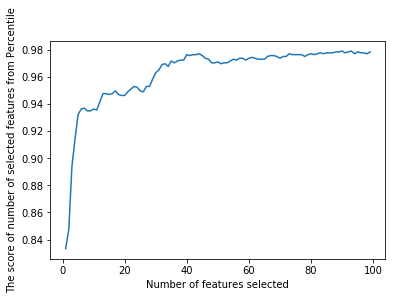

Maximale Genauigkeit ( percentile,f_classif,lsvc,350 gut rfc ) : 0.9892833221701273 ,  Die Anzahl der Merkmale: 294 ,   precent: 84 %


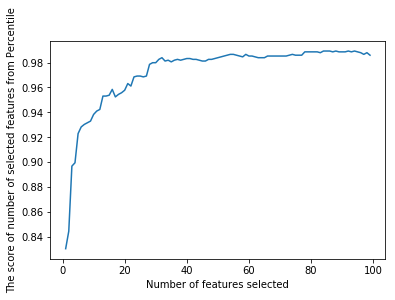

Maximale Genauigkeit ( percentile,f_regression,lda,350 gut rfc ) : 0.9785666443402545 ,  Die Anzahl der Merkmale: 252 ,   precent: 72 %


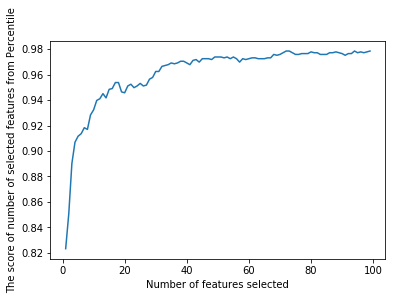

Maximale Genauigkeit ( percentile,f_regression,lsvc,350 gut rfc ) : 0.9886135298057602 ,  Die Anzahl der Merkmale: 322 ,   precent: 92 %


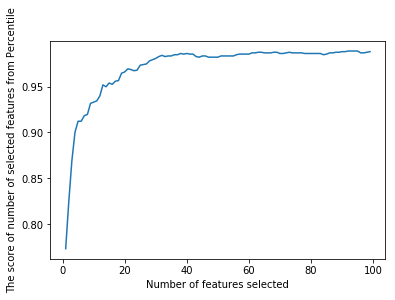

In [202]:
per_c_lda_1_350_rfc,per_c_lda_2_350_rfc,per_c_lda_3_350_rfc,per_c_lda_4_350_rfc=select_percent_ausgabe(f_classif,LinearDiscriminantAnalysis(),x_train_350_rfc,y_train_350_rfc,x_test_350_rfc,y_test_350_rfc,'percentile,f_classif,lda,350 gut rfc')

per_c_lsvc_1_350_rfc,per_c_lsvc_2_350_rfc,per_c_lsvc_3_350_rfc,per_c_lsvc_4_350_rfc=select_percent_ausgabe(f_classif,svm.LinearSVC(),x_train_350_rfc,y_train_350_rfc,x_test_350_rfc,y_test_350_rfc,'percentile,f_classif,lsvc,350 gut rfc')

per_r_lda_1_350_rfc,per_r_lda_2_350_rfc,per_r_lda_3_350_rfc,per_r_lda_4_350_rfc=select_percent_ausgabe(f_regression,LinearDiscriminantAnalysis(),x_train_350_rfc,y_train_350_rfc,x_test_350_rfc,y_test_350_rfc,'percentile,f_regression,lda,350 gut rfc')

per_r_lsvc_1_350_rfc,per_r_lsvc_2_350_rfc,per_r_lsvc_3_350_rfc,per_r_lsvc_4_350_rfc=select_percent_ausgabe(f_regression,svm.LinearSVC(),x_train_350_rfc,y_train_350_rfc,x_test_350_rfc,y_test_350_rfc,'percentile,f_regression,lsvc,350 gut rfc')




/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Maximale Genauigkeit ( kbest,f_classif,lsvc ) : 0.9799062290689886 ,   Die Anzahl der Merkmale: 324


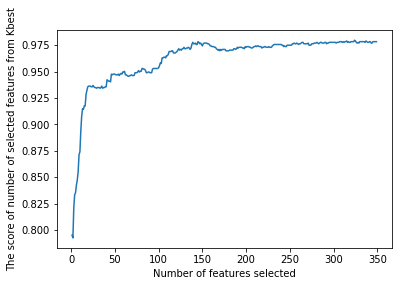

Maximale Genauigkeit ( kbest,f_classif,lsvc ) : 0.9899531145344943 ,   Die Anzahl der Merkmale: 328


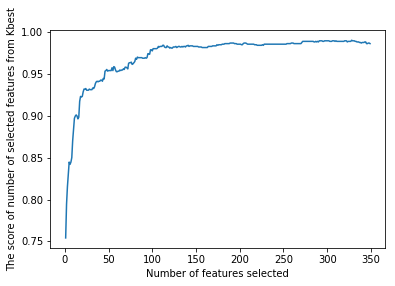

Maximale Genauigkeit ( kbest,f_regression,lda ) : 0.9792364367046216 ,   Die Anzahl der Merkmale: 344


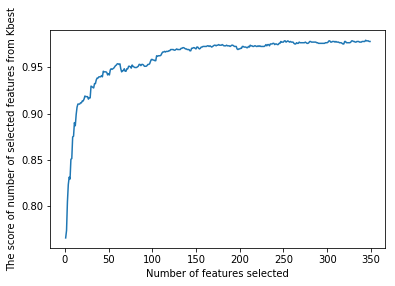

Maximale Genauigkeit ( kbest,f_regression,lsvc ) : 0.9886135298057602 ,   Die Anzahl der Merkmale: 322


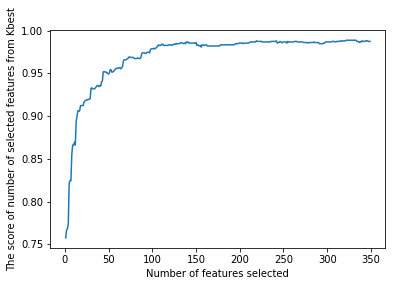

In [203]:
f_c_lda_1_350_rfc,f_c_lda_2_350_rfc,f_c_lda_3_350_rfc,f_c_lda_4_350_rfc,f_c_lda_5_350_rfc=select_kbest_ausgabe(f_classif,LinearDiscriminantAnalysis(),x_train_350_rfc,y_train_350_rfc,x_test_350_rfc,y_test_350_rfc,'kbest,f_classif,lsvc')



f_c_lsvc_1_350_rfc,f_c_lsvc_2_350_rfc,f_c_lsvc_3_350_rfc,f_c_lsvc_4_350_rfc,f_c_lsvc_5_350_rfc=select_kbest_ausgabe(f_classif,svm.LinearSVC(),x_train_350_rfc,y_train_350_rfc,x_test_350_rfc,y_test_350_rfc,'kbest,f_classif,lsvc')



f_re_lda_1_350_rfc,f_re_lda_2_350_rfc,f_re_lda_3_350_rfc,f_re_lda_4_350_rfc,f_re_lda_5_350_rfc=select_kbest_ausgabe(f_regression,LinearDiscriminantAnalysis(),x_train_350_rfc,y_train_350_rfc,x_test_350_rfc,y_test_350_rfc,'kbest,f_regression,lda')




f_re_lsvc_1_350_rfc,f_re_lsvc_2_350_rfc,f_re_lsvc_3_350_rfc,f_re_lsvc_4_350_rfc,f_re_lsvc_5_350_rfc=select_kbest_ausgabe(f_regression,svm.LinearSVC(),x_train_350_rfc,y_train_350_rfc,x_test_350_rfc,y_test_350_rfc,'kbest,f_regression,lsvc')





/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

Maximale Genauigkeit ( kbest,mutual_info_regression,lda ) : 0.9799062290689886 ,   Die Anzahl der Merkmale: 349


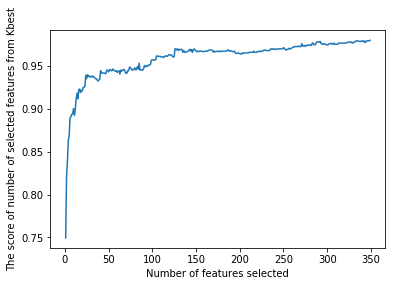

Maximale Genauigkeit ( kbest,mutual_info_regression,lsvc ) : 0.9899531145344943 ,   Die Anzahl der Merkmale: 296


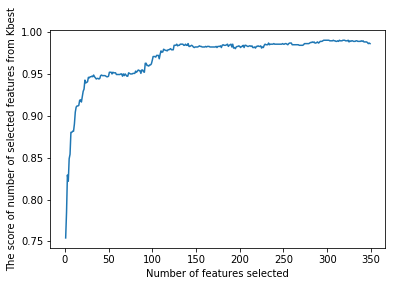

In [204]:
f_m_lda_1_350_rfc,f_m_lda_2_350_rfc,f_m_lda_3_350_rfc,f_m_lda_4_350_rfc,f_m_lda_5_350_rfc=select_kbest_ausgabe(mutual_info_regression,LinearDiscriminantAnalysis(),x_train_350_rfc.astype(float),y_train_350_rfc.astype(float),x_test_350_rfc.astype(float),y_test_350_rfc.astype(float),'kbest,mutual_info_regression,lda')




f_m_lsvc_1_350_rfc,f_m_lsvc_2_350_rfc,f_m_lsvc_3_350_rfc,f_m_lsvc_4_350_rfc,f_m_lsvc_5_350_rfc=select_kbest_ausgabe(mutual_info_regression,svm.LinearSVC(),x_train_350_rfc.astype(float),y_train_350_rfc.astype(float),x_test_350_rfc.astype(float),y_test_350_rfc.astype(float),'kbest,mutual_info_regression,lsvc')




/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

Maximale Genauigkeit ( kbest,mutual_info_classif,lda ) : 0.9799062290689886 ,   Die Anzahl der Merkmale: 339


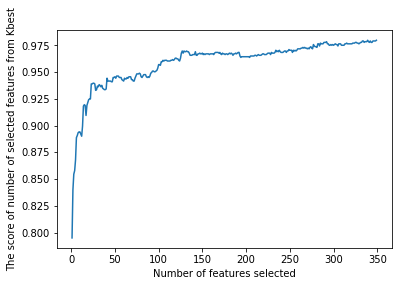

In [205]:
f_m_c_lda_1_350_rfc,f_m_c_lda_2_350_rfc,f_m_c_lda_3_350_rfc,f_m_c_lda_4_350_rfc,f_m_c_lda_5_350_rfc=select_kbest_ausgabe(mutual_info_classif,LinearDiscriminantAnalysis(),x_train_350_rfc.astype(float),y_train_350_rfc.astype(float),x_test_350_rfc.astype(float),y_test_350_rfc.astype(float),'kbest,mutual_info_classif,lda')



/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jiangqiuchen/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Maximale Genauigkeit: ( fdr,f_classif,lda ) : 0.9785666443402545 ,  Die Anzahl der Merkmale: 338 , alpha= 0.03
Maximale Genauigkeit: ( fpr,f_classif,lda ) : 0.9785666443402545 ,  Die Anzahl der Merkmale: 338 , alpha= 0.03


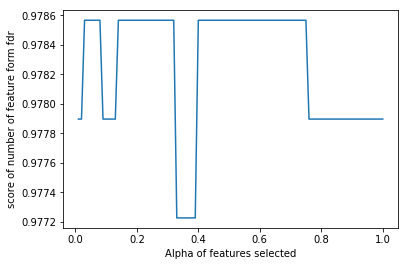

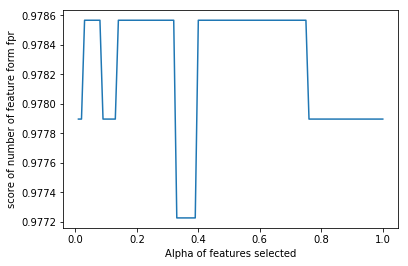

In [206]:
fdr_f_classif_lda_1_350_rfc,fdr_f_classif_lda_2_350_rfc,fdr_f_classif_lda_3_350_rfc,fdr_f_classif_lda_4_350_rfc,fdr_f_classif_lda_5_350_rfc,fdr_f_classif_lda_6_350_rfc=select_fdr_ausgabe(LinearDiscriminantAnalysis(),f_classif,x_train_350_rfc,y_train_350_rfc,x_test_350_rfc,y_test_350_rfc,'fdr,f_classif,lda')




fpr_f_classif_lda_1_350_rfc,fpr_f_classif_lda_2_350_rfc,fpr_f_classif_lda_3_350_rfc,fpr_f_classif_lda_4_350_rfc,fpr_f_classif_lda_5_350_rfc,fpr_f_classif_lda_6_350_rfc=select_fpr_ausgabe(LinearDiscriminantAnalysis(),f_classif,x_train_350_rfc,y_train_350_rfc,x_test_350_rfc,y_test_350_rfc,'fpr,f_classif,lda')




In [207]:
genauigkeit_350_rfc=[lsvc_ohne_immer,lda_ohne_immer,per_c_lda_2_350_rfc,per_c_lsvc_2_350_rfc,per_r_lda_2_350_rfc,per_r_lsvc_2_350_rfc,f_c_lda_4_350_rfc,f_c_lsvc_4_350_rfc,f_re_lda_4_350_rfc,f_re_lsvc_4_350_rfc,f_m_lda_4_350_rfc,f_m_lsvc_4_350_rfc,f_m_c_lda_4_350_rfc,fpr_f_classif_lda_4_350_rfc,fdr_f_classif_lda_4_350_rfc]
anzahl_merkmale_350_rfc=[len(x_train_350_rfc.columns),len(x_train_350_rfc.columns),per_c_lda_3_350_rfc,per_c_lsvc_3_350_rfc,per_r_lda_3_350_rfc,per_r_lsvc_3_350_rfc,f_c_lda_5_350_rfc,f_c_lsvc_5_350_rfc,f_re_lda_5_350_rfc,f_re_lsvc_5_350_rfc,f_m_lda_5_350_rfc,f_m_lsvc_5_350_rfc,f_m_c_lda_5_350_rfc,fpr_f_classif_lda_5_350_rfc,fdr_f_classif_lda_5_350_rfc]
parameter_350_rfc=['/','/',per_c_lda_4_350_rfc,per_c_lsvc_4_350_rfc,per_r_lda_4_350_rfc,per_r_lsvc_4_350_rfc,f_c_lda_5_350_rfc,f_c_lsvc_5_350_rfc,f_re_lda_5_350_rfc,f_re_lsvc_5_350_rfc,f_m_lda_5_350_rfc,f_m_lsvc_5_350_rfc,f_m_c_lda_5_350_rfc,fpr_f_classif_lda_6_350_rfc,fdr_f_classif_lda_6_350_rfc]
selektion_name_350_rfc=['lsvc_ohne_gut_350_rfc','lda_ohne_gut_350_rfc','per_c_lda_350_rfc','per_c_lsvc_350_rfc','per_r_lda_350_rfc','per_r_lsvc_350_rfc','f_c_lda_gut_350_rfc','f_c_lsvc_gut_350_rfc','f_r_lda_gut_350_rfc','f_r_lsvc_gut_350_rfc','f_m_lda_gut_350_rfc','f_m_lsvc_gut_350_rfc','f_m_c_lda_350_rfc','fpr_f_classif_lda_gut_350_rfc','fdr_f_classif_lda_gut_350_rfc']





In [208]:
list_350_rfc,best_350_rfc=sammel(genauigkeit_350_rfc,anzahl_merkmale_350_rfc,parameter_350_rfc,selektion_name_350_rfc)


In [209]:
print(best_350_rfc)
list_350_rfc

                      Die Anzahl der Merkmale Parameter  \
f_c_lsvc_gut_350_rfc                      328       328   
f_m_lsvc_gut_350_rfc                      296       296   

                      die höchste Genauigkeit  
f_c_lsvc_gut_350_rfc                 0.989953  
f_m_lsvc_gut_350_rfc                 0.989953  


Die Anzahl der Merkmale Parameter  \
lsvc_ohne_gut_350_rfc                              350         /   
lda_ohne_gut_350_rfc                               350         /   
per_c_lda_350_rfc                                  315        90   
per_c_lsvc_350_rfc                                 294        84   
per_r_lda_350_rfc                                  252        72   
per_r_lsvc_350_rfc                                 322        92   
f_c_lda_gut_350_rfc                                324       324   
f_c_lsvc_gut_350_rfc                               328       328   
f_r_lda_gut_350_rfc                                344       344   
f_r_lsvc_gut_350_rfc                               322       322   
f_m_lda_gut_350_rfc                                349       349   
f_m_lsvc_gut_350_rfc                               296       296   
f_m_c_lda_350_rfc                                  339       339   
fpr_f_classif_lda_gut_350_rfc                      338      0.03   
fdr_f_classif_lda_gut_350_rfc                      338      0.03   

                               die höchste Genauigkeit  
lsvc_ohne_gut_350_rfc                         0.985934  
lda_ohne_gut_350_rfc                          0.977897  
per_c_lda_350_rfc                             0.979236  
per_c_lsvc_350_rfc                            0.989283  
per_r_lda_350_rfc                             0.978567  
per_r_lsvc_350_rfc                            0.988614  
f_c_lda_gut_350_rfc                           0.979906  
f_c_lsvc_gut_350_rfc                          0.989953  
f_r_lda_gut_350_rfc                           0.979236  
f_r_lsvc_gut_350_rfc                          0.988614  
f_m_lda_gut_350_rfc                           0.979906  
f_m_lsvc_gut_350_rfc                          0.989953  
f_m_c_lda_350_rfc                             0.979906  
fpr_f_classif_lda_gut_350_rfc                 0.978567  
fdr_f_classif_lda_gut_350_rfc                 0.978567

In [210]:
print(best_all)
list_all

                Die Anzahl der Merkmale Parameter  die höchste Genauigkeit
per_c_lsvc_all                      515        82                 0.990623
f_c_lsvc_all                        512       512                 0.990623
f_m_lsvc_all                        534       534                 0.990623


Die Anzahl der Merkmale Parameter  \
lsvc_ohne_all                              629         /   
lda_ohne_all                               629         /   
per_c_lda_all                              402        64   
per_c_lsvc_all                             515        82   
per_r_lda_all                              515        82   
per_r_lsvc_all                             183        29   
f_c_lda_all                                403       403   
f_c_lsvc_all                               512       512   
f_r_lda_all                                423       423   
f_r_lsvc_all                               180       180   
f_m_lda_all                                588       588   
f_m_lsvc_all                               534       534   
f_m_c_lda_all                              480       480   
fpr_f_classif_lda_all                      574      0.01   
fdr_f_classif_lda_all                      574      0.01   

                       die höchste Genauigkeit  
lsvc_ohne_all                         0.983925  
lda_ohne_all                          0.983925  
per_c_lda_all                         0.987274  
per_c_lsvc_all                        0.990623  
per_r_lda_all                         0.986604  
per_r_lsvc_all                        0.989283  
f_c_lda_all                           0.989283  
f_c_lsvc_all                          0.990623  
f_r_lda_all                           0.987274  
f_r_lsvc_all                          0.989283  
f_m_lda_all                           0.984595  
f_m_lsvc_all                          0.990623  
f_m_c_lda_all                         0.983925  
fpr_f_classif_lda_all                 0.985265  
fdr_f_classif_lda_all                 0.985265

In [211]:
print(best_allg)
list_allg

                 Die Anzahl der Merkmale Parameter  die höchste Genauigkeit
per_c_lsvc_Allg                      187        89                 0.983255
f_c_lsvc_Allg                        187       187                 0.983255


Die Anzahl der Merkmale Parameter  \
lsvc_ohne_allg                              210         /   
lda_ohne_allg                               210         /   
per_c_lda_Allg                              193        92   
per_c_lsvc_Allg                             187        89   
per_r_lda_Allg                              205        98   
per_r_lsvc_Allg                             141        67   
f_c_lda_Allg                                193       193   
f_c_lsvc_Allg                               187       187   
f_r_lda_Allg                                205       205   
f_r_lsvc_Allg                               142       142   
f_m_lda_Allg                                206       206   
f_m_lsvc_Allg                               190       190   
f_m_c_lda_Allg                              209       209   
fpr_f_classif_lda_Allg                      208       0.6   
fdr_f_classif_lda_Allg                      208       0.6   

                        die höchste Genauigkeit  
lsvc_ohne_allg                         0.978567  
lda_ohne_allg                          0.977227  
per_c_lda_Allg                         0.977897  
per_c_lsvc_Allg                        0.983255  
per_r_lda_Allg                         0.979236  
per_r_lsvc_Allg                        0.980576  
f_c_lda_Allg                           0.977897  
f_c_lsvc_Allg                          0.983255  
f_r_lda_Allg                           0.979236  
f_r_lsvc_Allg                          0.981246  
f_m_lda_Allg                           0.977227  
f_m_lsvc_Allg                          0.981916  
f_m_c_lda_Allg                         0.978567  
fpr_f_classif_lda_Allg                 0.977897  
fdr_f_classif_lda_Allg                 0.977897

In [212]:
print(best_80)
list_80

             Die Anzahl der Merkmale Parameter  die höchste Genauigkeit
f_m_lsvc_80                       72        72                 0.971199


Die Anzahl der Merkmale Parameter  \
lsvc_ohne_80                               80         /   
lda_ohne_80                                80         /   
per_c_lda_80                               78        98   
per_c_lsvc_80                              56        70   
per_r_lda_80                               73        92   
per_r_lsvc_80                              71        89   
f_c_lda_80                                 78        78   
f_c_lsvc_80                                56        56   
f_r_lda_80                                 73        73   
f_r_lsvc_80                                71        71   
f_m_lda_80                                 77        77   
f_m_lsvc_80                                72        72   
f_m_c_lda_80                               77        77   
fpr_f_classif_lda_80                       78      0.27   
fdr_f_classif_lda_80                       78      0.28   

                      die höchste Genauigkeit  
lsvc_ohne_80                         0.965171  
lda_ohne_80                          0.952445  
per_c_lda_80                         0.953115  
per_c_lsvc_80                        0.967850  
per_r_lda_80                         0.951775  
per_r_lsvc_80                        0.967850  
f_c_lda_80                           0.953115  
f_c_lsvc_80                          0.967850  
f_r_lda_80                           0.951775  
f_r_lsvc_80                          0.967850  
f_m_lda_80                           0.953115  
f_m_lsvc_80                          0.971199  
f_m_c_lda_80                         0.953115  
fpr_f_classif_lda_80                 0.953115  
fdr_f_classif_lda_80                 0.953115

In [213]:
b1=per_c_lsvc_1_350_rfc.values.tolist()
b2=f_c_lsvc_3_350_rfc.values.tolist()
b3=f_m_lsvc_3_350_rfc.values.tolist()

b4=per_c_lsvc_1_all.values.tolist()
b5=f_c_lsvc_3_all.values.tolist()
b6=f_m_lsvc_3_all.values.tolist()

b7=per_c_lsvc_1.values.tolist()
b8=per_r_lsvc_1.values.tolist()
b9=f_c_lsvc_3.values.tolist()
b10=f_r_lsvc_3.values.tolist()

b11=per_c_lsvc_1_80.values.tolist()
b12=f_c_lsvc_3_80.values.tolist()


In [214]:
b=pd.DataFrame(b1+b2+b3+b4+b5+b6+b7+b8+b9+b10+b11+b12)

In [215]:
b_count=pd.DataFrame(b[0].value_counts())
b_count

0
phi_1pkt_y_Abs_gradient                 12
a_y_Ar3                                 12
magnet_x_Entropy                        12
phi_1pkt_y_Mean_trend                   12
fft_sum_a_x_20-40HZ                     12
a_x_dwt_highpass_absolut_mean           12
a_x_dwt_highpass_std                    12
Spannung_Ar1                            12
Distanz_magnetfeld_x_y                  12
a_z_MAD                                 12
magnet_z_root_mean_square               12
magnet_x_Dwt_lowpass_average_power      12
a_z_Mean_trend                          12
a_y_Energy_cd                           12
Spannung_Entropy                        12
Spannung_Energy_cd                      12
a_x_IQR                                 12
phi_1pkt_x_Mean_trend                   12
Correlation_Beschleunigung_y_z          12
Spannung_quartiles                      12
magnet_y_dwt_lowpass_absolut_mean       12
a_x_Ar2                                 12
a_y_Ar2                                 12
a_x_Ar1                                 12
phi_1pkt_z_Windows_mean_difference      12
a_x_std                                 12
Covariance_Beschleunigung_y_z           12
magnet_y_Energy_ca                      12
SMA_a_40-50HZ                           12
magnet_y_dwt_highpass_std               12
...                                     ..
DC_Komponent_a_z_40-60HZ                 1
magnet_y_Sum_cd                          1
phi_1pkt_x_Ar2                           1
DC_Komponent_a_y_40-60HZ                 1
Covariance_Winkelgeschwindigkeit_y_z     1
DC_Komponent_a_x_60-80HZ                 1
Spannung_kurtosis                        1
magnet_x_Sum_cd                          1
Correlation_Windelgeschwindigkeit_y_z    1
Covariance_Winkelgeschwindigkeit_x_z     1
magnet_y_Mean_gradient                   1
Correlation_Windelgeschwindigkeit_x_z    1
Energy_Spannung_40-60HZ                  1
Energy_Strom_40-60HZ                     1
magnet_y_Ar3                             1
Energy_Strom_60-80HZ                     1
DC_Komponent_Strom_60-80HZ               1
a_z_Mean_gradient                        1
Energy_a_x_60-80HZ                       1
magnet_x_Mean_gradient                   1
Strom_Sum_cd                             1
DC_Komponent_a_x_40-60HZ                 1
a_z_Sum_cd                               1
phi_1pkt_x_Windows_variance_difference   1
DC_Komponent_a_y_60-80HZ                 1
DC_Komponent_a_x_80-100HZ                1
Spannung_Sum_cd                          1
phi_1pkt_z_Sum_ca                        1
a_z_skewness                             1
DC_Komponent_phi_1pkt_x_40-60HZ          1

[587 rows x 1 columns]

In [344]:
Allgemeine_Merkmale=b_count.index.tolist()


In [390]:
sehr_gut_merkmale=b_count[b_count[0]==12]
sehr_gut_merkmale.index.tolist()
print(len(sehr_gut_merkmale.index.tolist()))
print(sehr_gut_merkmale.index.tolist())

46
['phi_1pkt_y_Abs_gradient', 'a_y_Ar3', 'magnet_x_Entropy', 'phi_1pkt_y_Mean_trend', 'fft_sum_a_x_20-40HZ', 'a_x_dwt_highpass_absolut_mean', 'a_x_dwt_highpass_std', 'Spannung_Ar1', 'Distanz_magnetfeld_x_y', 'a_z_MAD', 'magnet_z_root_mean_square', 'magnet_x_Dwt_lowpass_average_power', 'a_z_Mean_trend', 'a_y_Energy_cd', 'Spannung_Entropy', 'Spannung_Energy_cd', 'a_x_IQR', 'phi_1pkt_x_Mean_trend', 'Correlation_Beschleunigung_y_z', 'Spannung_quartiles', 'magnet_y_dwt_lowpass_absolut_mean', 'a_x_Ar2', 'a_y_Ar2', 'a_x_Ar1', 'phi_1pkt_z_Windows_mean_difference', 'a_x_std', 'Covariance_Beschleunigung_y_z', 'magnet_y_Energy_ca', 'SMA_a_40-50HZ', 'magnet_y_dwt_highpass_std', 'a_y_IQR', 'a_y_Abs_gradient', 'phi_1pkt_x_Number_of_zero_crossing', 'phi_1pkt_y_Number_of_zero_crossing', 'phi_1pkt_x_Energy_cd', 'Spannung_dwt_highpass_absolut_mean', 'Spannung_Dwt_highpass_average_power', 'magnet_y_Dwt_lowpass_average_power', 'a_x_MAD', 'magnet_y_Windows_mean_difference', 'phi_1pkt_z_dwt_highpass_absolu

In [392]:
schlechte_Merkmale=pd.DataFrame([element for element in all_name if element not in Allgemeine_Merkmale])
Schlechte_Merkmale=schlechte_Merkmale.values.reshape(1,42).tolist()[0]
print(len(Schlechte_Merkmale))
print(schlechte_Merkmale)

42
                                    0
0                 phi_1pkt_y_skewness
1              phi_1pkt_x_Entropy_fft
2       Strom_Number_of_zero_crossing
3   phi_1pkt_x_Fft_max_magnitude_freq
4                            a_x_mean
5                     magnet_z_Sum_cd
6                   phi_1pkt_y_Sum_ca
7                        magnet_z_Ar3
8                   phi_1pkt_x_Sum_cd
9                   phi_1pkt_z_Sum_cd
10               magnet_y_Entropy_fft
11                phi_1pkt_x_skewness
12            DC_Komponent_a_y_0-20HZ
13                       magnet_z_Ar2
14                  phi_1pkt_y_Sum_cd
15  phi_1pkt_z_Fft_max_magnitude_freq
16                  magnet_x_kurtosis
17   Spannung_Number_of_zero_crossing
18             phi_1pkt_z_Entropy_fft
19                  magnet_z_kurtosis
20                      a_x_quartiles
21                    a_z_Entropy_fft
22                    a_x_Entropy_fft
23                  Strom_Entropy_fft
24                       magnet_y_Ar2
25       

In [346]:
def für_list(List,Merkmale):
    v=[]
    for variable in List:
        ss=pd.DataFrame(Merkmale[0].str.find(variable))
        ss.index=Merkmale.values.reshape(1,len(Merkmale)).tolist()[0]
        ss=ss[ss[0]>-1]
        länge=len(ss)
        v.append(länge)
    v=pd.DataFrame(v)    
    v.index=List
    return v

In [352]:
schlechte_variable=für_list(sensor_list_neu,schlechte_Merkmale)
schlechte_variable

0
Spannung    1
a_x         6
a_y         2
a_z         1
phi_1pkt_x  5
phi_1pkt_y  6
phi_1pkt_z  4
magnet_x    4
magnet_y    3
magnet_z    7
Strom       3

In [348]:
schlechte_merkmale=für_list(feature_list,schlechte_Merkmale)

In [351]:
schlechte_merkmale[schlechte_merkmale[0]>0]

0
Sum_ca                    2
Sum_cd                    4
mean                      1
median                    1
quartiles                 1
Entropy                  10
Entropy_fft              10
Fft_max_magnitude_freq    6
skewness                  3
kurtosis                  3
Mean_gradient             4
Number_of_zero_crossing   3
Ar2                       2
Ar3                       1
DC_Komponent              1

In [276]:
b_count[b_count[0]==12]

0
phi_1pkt_y_Abs_gradient               12
a_y_Ar3                               12
magnet_x_Entropy                      12
phi_1pkt_y_Mean_trend                 12
fft_sum_a_x_20-40HZ                   12
a_x_dwt_highpass_absolut_mean         12
a_x_dwt_highpass_std                  12
Spannung_Ar1                          12
Distanz_magnetfeld_x_y                12
a_z_MAD                               12
magnet_z_root_mean_square             12
magnet_x_Dwt_lowpass_average_power    12
a_z_Mean_trend                        12
a_y_Energy_cd                         12
Spannung_Entropy                      12
Spannung_Energy_cd                    12
a_x_IQR                               12
phi_1pkt_x_Mean_trend                 12
Correlation_Beschleunigung_y_z        12
Spannung_quartiles                    12
magnet_y_dwt_lowpass_absolut_mean     12
a_x_Ar2                               12
a_y_Ar2                               12
a_x_Ar1                               12
phi_1pkt_z_Windows_mean_difference    12
a_x_std                               12
Covariance_Beschleunigung_y_z         12
magnet_y_Energy_ca                    12
SMA_a_40-50HZ                         12
magnet_y_dwt_highpass_std             12
a_y_IQR                               12
a_y_Abs_gradient                      12
phi_1pkt_x_Number_of_zero_crossing    12
phi_1pkt_y_Number_of_zero_crossing    12
phi_1pkt_x_Energy_cd                  12
Spannung_dwt_highpass_absolut_mean    12
Spannung_Dwt_highpass_average_power   12
magnet_y_Dwt_lowpass_average_power    12
a_x_MAD                               12
magnet_y_Windows_mean_difference      12
phi_1pkt_z_dwt_highpass_absolut_mean  12
a_x_Abs_gradient                      12
a_z_variance                          12
a_z_IQR                               12
a_y_Entropy                           12
a_z_Sum_ca                            12

In [217]:
def such_sensor_oder_methode(feature_list,Häufigkeit_anzahl,was_suchen):
    b_counts=pd.DataFrame(feature_list[0].value_counts())
    suchen=pd.Series(b_counts[b_counts[0]==Häufigkeit_anzahl].index)
    suchen_was=pd.DataFrame(suchen.str.find(was_suchen))
    suchen_was.index=b_counts[b_counts[0]==Häufigkeit_anzahl].index
    ergebnis=suchen_was[suchen_was[0]>-1]
    return ergebnis
    

In [218]:
def wichtigkeit_table(feature_list,sensor_or_feature_list,Häufigkeit_anzahl):
    wichtigkeit=[]
    for wichtiges in sensor_or_feature_list:
        wichtig=len(such_sensor_oder_methode(feature_list,Häufigkeit_anzahl,wichtiges))
        wichtigkeit.append(wichtig)
    wichtigkeit=pd.DataFrame(wichtigkeit)    
    wichtigkeit.index=sensor_or_feature_list 
    
    return wichtigkeit

In [219]:
S_list=[wichtigkeit_table(b,sensor_list_neu,i)  for i in range(1,13)]
S_list_combi=pd.concat(S_list,axis=1)
S_list_combi.columns=np.arange(1,13)

In [232]:
S_list_combi

1   2   3   4   5   6   7   8   9   10  11  12
Spannung     4   2   9   1   3  13   4   0   0   7   1   6
a_x          4   4   3   0   3  13   2   1   0   6   0   9
a_y          3   1   9   2   3  13   3   0   2   7   0   6
a_z          4   3   9   1   3  15   0   1   1   8   0   5
phi_1pkt_x   4   6   7   1   2  16   1   2   1   3   0   3
phi_1pkt_y   2   3  14   2   5   7   3   5   0   1   0   3
phi_1pkt_z   5   3  13   3   3  11   3   2   0   2   0   2
magnet_x     2   1  10   2   3  22   3   0   0   2   0   2
magnet_y     3   2   6   1   6  14   2   0   2   7   0   5
magnet_z     1   3  15   1   1  16   3   1   1   1   0   1
Strom        5   3  34   0   0   0   6   0   0   0   0   0

In [383]:
summe_w=pd.DataFrame(S_list_combi[[7,8,9,10,11,12]].sum(axis=1))
summe_w.columns=['Summe der Wichtigkeit in Häufigekeit zweischen 7 und 12']
summe_w

Summe der Wichtigkeit in Häufigekeit zweischen 7 und 12
Spannung                                                   18      
a_x                                                        18      
a_y                                                        18      
a_z                                                        15      
phi_1pkt_x                                                 10      
phi_1pkt_y                                                 12      
phi_1pkt_z                                                  9      
magnet_x                                                    7      
magnet_y                                                   16      
magnet_z                                                    7      
Strom                                                       6

In [227]:
S_list_combi.T

Spannung  a_x  a_y  a_z  phi_1pkt_x  phi_1pkt_y  phi_1pkt_z  magnet_x  \
1          4    4    3    4           4           2           5         2   
2          2    4    1    3           6           3           3         1   
3          9    3    9    9           7          14          13        10   
4          1    0    2    1           1           2           3         2   
5          3    3    3    3           2           5           3         3   
6         13   13   13   15          16           7          11        22   
7          4    2    3    0           1           3           3         3   
8          0    1    0    1           2           5           2         0   
9          0    0    2    1           1           0           0         0   
10         7    6    7    8           3           1           2         2   
11         1    0    0    0           0           0           0         0   
12         6    9    6    5           3           3           2         2   

    magnet_y  magnet_z  Strom  
1          3         1      5  
2          2         3      3  
3          6        15     34  
4          1         1      0  
5          6         1      0  
6         14        16      0  
7          2         3      6  
8          0         1      0  
9          2         1      0  
10         7         1      0  
11         0         0      0  
12         5         1      0

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c47679978>,
      dtype=object)

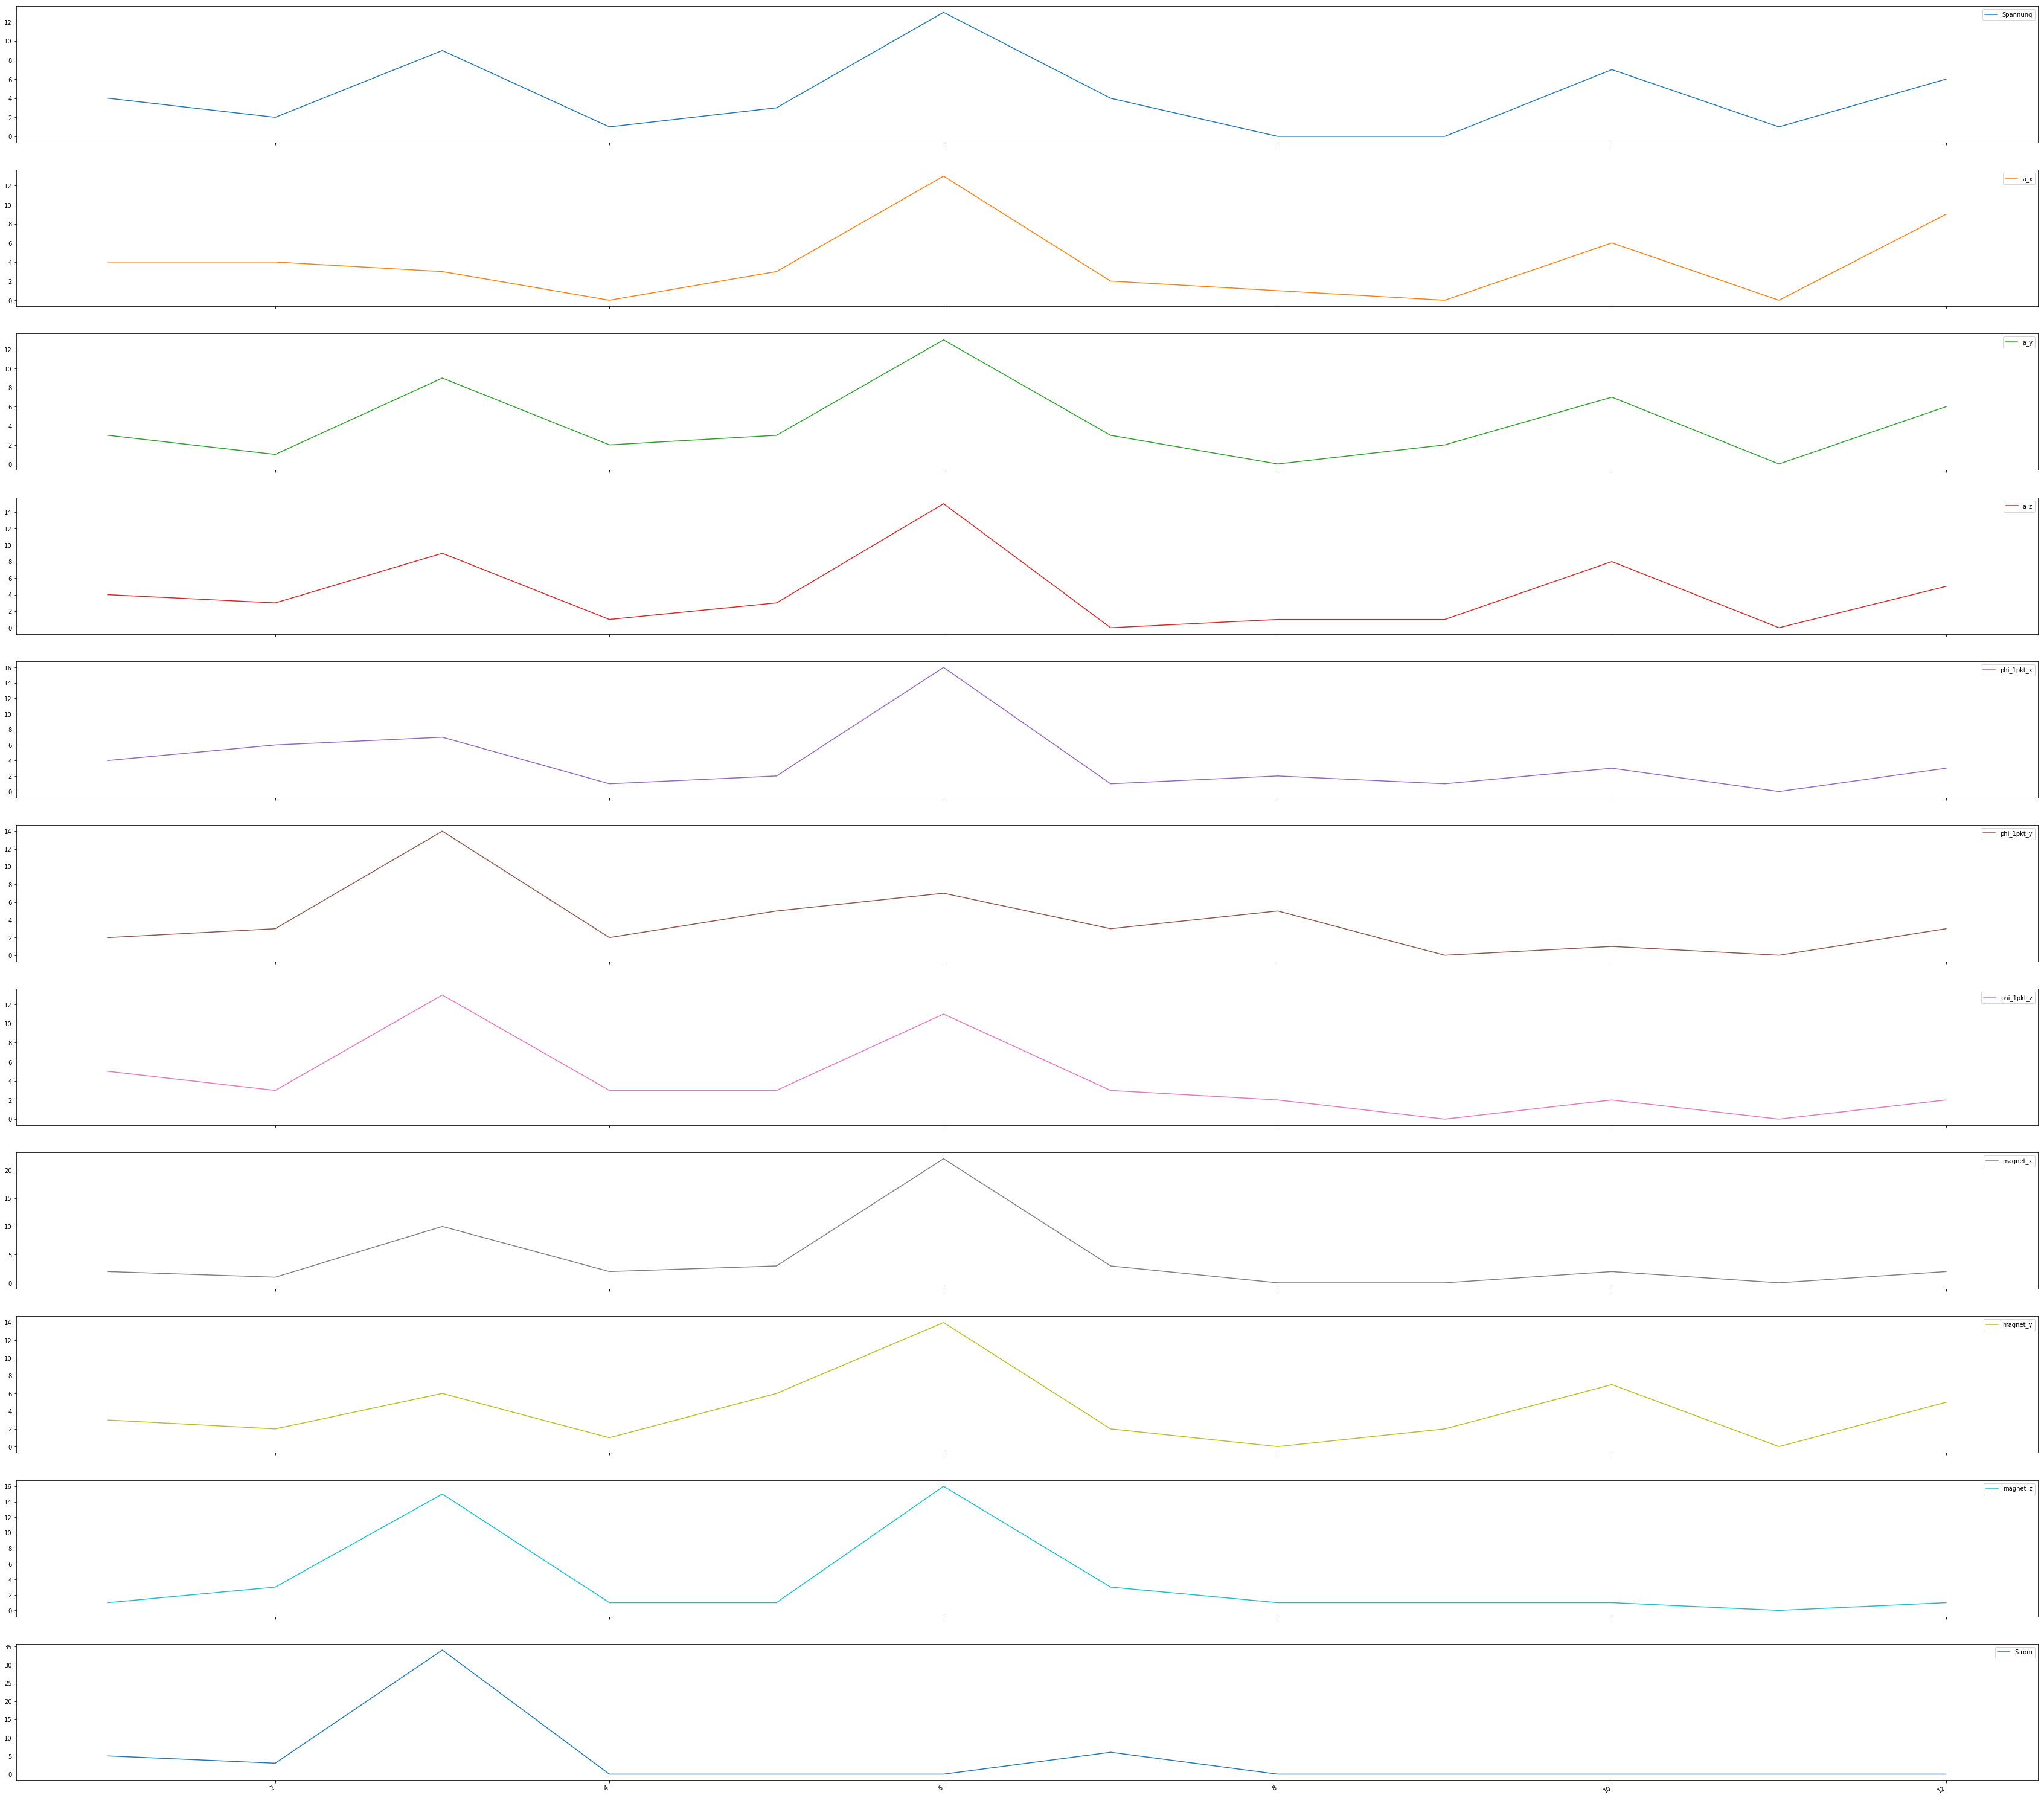

In [234]:
S_list_combi.T.plot(subplots=True,figsize=(60,60))

In [221]:
Features_list1=['Mean_trend','Windows_mean_difference','Variance_trend','Windows_variance_difference','dwt_lowpass_absolut_mean','dwt_highpass_absolut_mean','Dwt_lowpass_average_power','Dwt_highpass_average_power','dwt_lowpass_std','dwt_highpass_std','Energy_ca','Energy_cd','Sum_ca','Sum_cd','mean','std','Max','Min','median','quartiles','variance','Entropy','Entropy_fft','Fft_max_magnitude_freq','skewness','kurtosis','root_mean_square','Mean_gradient','Abs_gradient','IQR','MAD','Number_of_zero_crossing','Ar1','Ar2','Ar3','Ar4']
    

In [222]:
Features_list2=['Distanz','Correlation','Covariance','Correlation_mean_variance','SMA','Energy','fft_sum','DC_Komponent']
       

In [223]:
feature_list=Features_list1+Features_list2

In [374]:
F_list=[wichtigkeit_table(b,feature_list,i)  for i in range(1,13)]
F_list_combi=pd.concat(F_list,axis=1)
F_list_combi.columns=np.arange(1,13)
F_list_combi

1   2   3   4   5   6   7   8   9   10  11  12
Mean_trend                    0   1   1   0   0   2   1   0   1   2   0   3
Windows_mean_difference       0   0   3   0   0   2   2   0   1   1   0   2
Variance_trend                0   5   1   0   1   3   0   0   0   1   0   0
Windows_variance_difference   4   0   2   0   3   1   0   0   0   1   0   0
dwt_lowpass_absolut_mean      0   0   1   0   1   4   1   1   0   2   0   1
dwt_highpass_absolut_mean     0   0   3   0   0   2   1   0   0   2   0   3
Dwt_lowpass_average_power     0   0   1   0   3   4   0   0   0   1   0   2
Dwt_highpass_average_power    0   0   2   0   0   8   0   0   0   0   0   1
dwt_lowpass_std               0   0   2   0   0   6   0   1   0   2   0   0
dwt_highpass_std              0   0   1   0   0   6   1   0   0   1   0   2
Energy_ca                     0   0   3   0   0   5   1   0   0   1   0   1
Energy_cd                     0   0   3   0   0   4   0   0   0   1   0   3
Sum_ca                        1   1   2   0   0   1   1   0   0   2   0   1
Sum_cd                        6   1   0   0   0   0   0   0   0   0   0   0
mean                          1   2  10   1   3  15   5   2   1   8   0   7
std                           0   0   8   0   0  13   3   1   0   5   0   3
Max                           0   0   0   0   0   8   1   1   0   1   0   0
Min                           0   0   2   0   0   6   1   0   0   2   0   0
median                        2   0   0   1   1   4   1   0   0   1   0   0
quartiles                     0   2   3   0   0   3   0   0   1   0   0   1
variance                      6   0   8   1   3   9   2   0   0   1   0   2
Entropy                       0   1   1   1   0   3   0   0   1   2   0   3
Entropy_fft                   0   1   0   0   0   0   0   0   0   0   0   0
Fft_max_magnitude_freq        0   3   0   2   0   0   0   0   0   0   0   0
skewness                      2   1   3   0   0   2   0   0   0   0   0   0
kurtosis                      1   1   1   2   0   1   0   1   0   1   0   0
root_mean_square              0   0   1   0   1   5   1   1   0   1   0   1
Mean_gradient                 4   2   1   0   0   0   0   0   0   0   0   0
Abs_gradient                  0   0   4   0   0   2   1   0   1   0   0   3
IQR                           0   0   6   0   0   1   0   0   0   1   0   3
MAD                           0   0   4   0   0   3   1   0   0   1   0   2
Number_of_zero_crossing       0   2   0   0   0   3   0   0   0   1   0   2
Ar1                           1   1   1   0   0   3   1   0   0   2   0   2
Ar2                           1   0   4   1   0   0   0   0   0   1   0   2
Ar3                           1   2   1   1   1   1   0   1   0   1   0   1
Ar4                           0   1   0   2   0   4   0   1   1   1   1   0
Distanz                       0   0   4   0   0   1   0   1   1   1   0   1
Correlation                   2   1   0   2   0   2   0   0   0   2   0   1
Covariance                    2   0   2   0   0   3   1   0   0   0   0   1
Correlation_mean_variance     0   0   0   1   0   0   0   0   0   0   0   0
SMA                           0   0  13   0   1  17   4   0   2   2   0   1
Energy                        4   0  28   0   9  20   5   3   0   4   0   4
fft_sum                       0   1  24   2   2  15   4   2   0   4   0   1
DC_Komponent                  9   4  15   2   9   9   4   0   1   1   0   0

In [382]:
summe_w_m=F_list_combi[[7,8,9,10,11,12]]
summe_w_m=pd.DataFrame(summe_w_m.sum(axis=1))
summe_w_m.columns=['Summe der Wichtigkeit in Häufigekeit zweischen 7 und 12']
summe_w_m[summe_w_m['Summe der Wichtigkeit in Häufigekeit zweischen 7 und 12']<=3].nsmallest(40,summe_w_m.columns)

Summe der Wichtigkeit in Häufigekeit zweischen 7 und 12
Correlation_mean_variance                                                    0      
Mean_gradient                                                                0      
skewness                                                                     0      
Fft_max_magnitude_freq                                                       0      
Entropy_fft                                                                  0      
Sum_cd                                                                       0      
Variance_trend                                                               1      
Dwt_highpass_average_power                                                   1      
Windows_variance_difference                                                  1      
median                                                                       2      
Covariance                                                                   2      
kurtosis                                                                     2      
quartiles                                                                    2      
Max                                                                          3      
Min                                                                          3      
dwt_lowpass_std                                                              3      
Dwt_lowpass_average_power                                                    3      
Number_of_zero_crossing                                                      3      
Ar2                                                                          3      
Ar3                                                                          3      
Correlation                                                                  3      
Energy_ca                                                                    3

In [229]:
F_list_combi.T

Mean_trend  Windows_mean_difference  Variance_trend  \
1            0                        0               0   
2            1                        0               5   
3            1                        3               1   
4            0                        0               0   
5            0                        0               1   
6            2                        2               3   
7            1                        2               0   
8            0                        0               0   
9            1                        1               0   
10           2                        1               1   
11           0                        0               0   
12           3                        2               0   

    Windows_variance_difference  dwt_lowpass_absolut_mean  \
1                             4                         0   
2                             0                         0   
3                             2                         1   
4                             0                         0   
5                             3                         1   
6                             1                         4   
7                             0                         1   
8                             0                         1   
9                             0                         0   
10                            1                         2   
11                            0                         0   
12                            0                         1   

    dwt_highpass_absolut_mean  Dwt_lowpass_average_power  \
1                           0                          0   
2                           0                          0   
3                           3                          1   
4                           0                          0   
5                           0                          3   
6                           2                          4   
7                           1                          0   
8                           0                          0   
9                           0                          0   
10                          2                          1   
11                          0                          0   
12                          3                          2   

    Dwt_highpass_average_power  dwt_lowpass_std  dwt_highpass_std  \
1                            0                0                 0   
2                            0                0                 0   
3                            2                2                 1   
4                            0                0                 0   
5                            0                0                 0   
6                            8                6                 6   
7                            0                0                 1   
8                            0                1                 0   
9                            0                0                 0   
10                           0                2                 1   
11                           0                0                 0   
12                           1                0                 2   

        ...       Ar3  Ar4  Distanz  Correlation  Covariance  \
1       ...         1    0        0            2           2   
2       ...         2    1        0            1           0   
3       ...         1    0        4            0           2   
4       ...         1    2        0            2           0   
5       ...         1    0        0            0           0   
6       ...         1    4        1            2           3   
7       ...         0    0        0            0           1   
8       ...         1    1        1            0           0   
9       ...         0    1        1            0           0   
10      ...         1    1        1            2           0   
11      ...         0    1        0            0           

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1cb5468e10>,
      dtype=object)

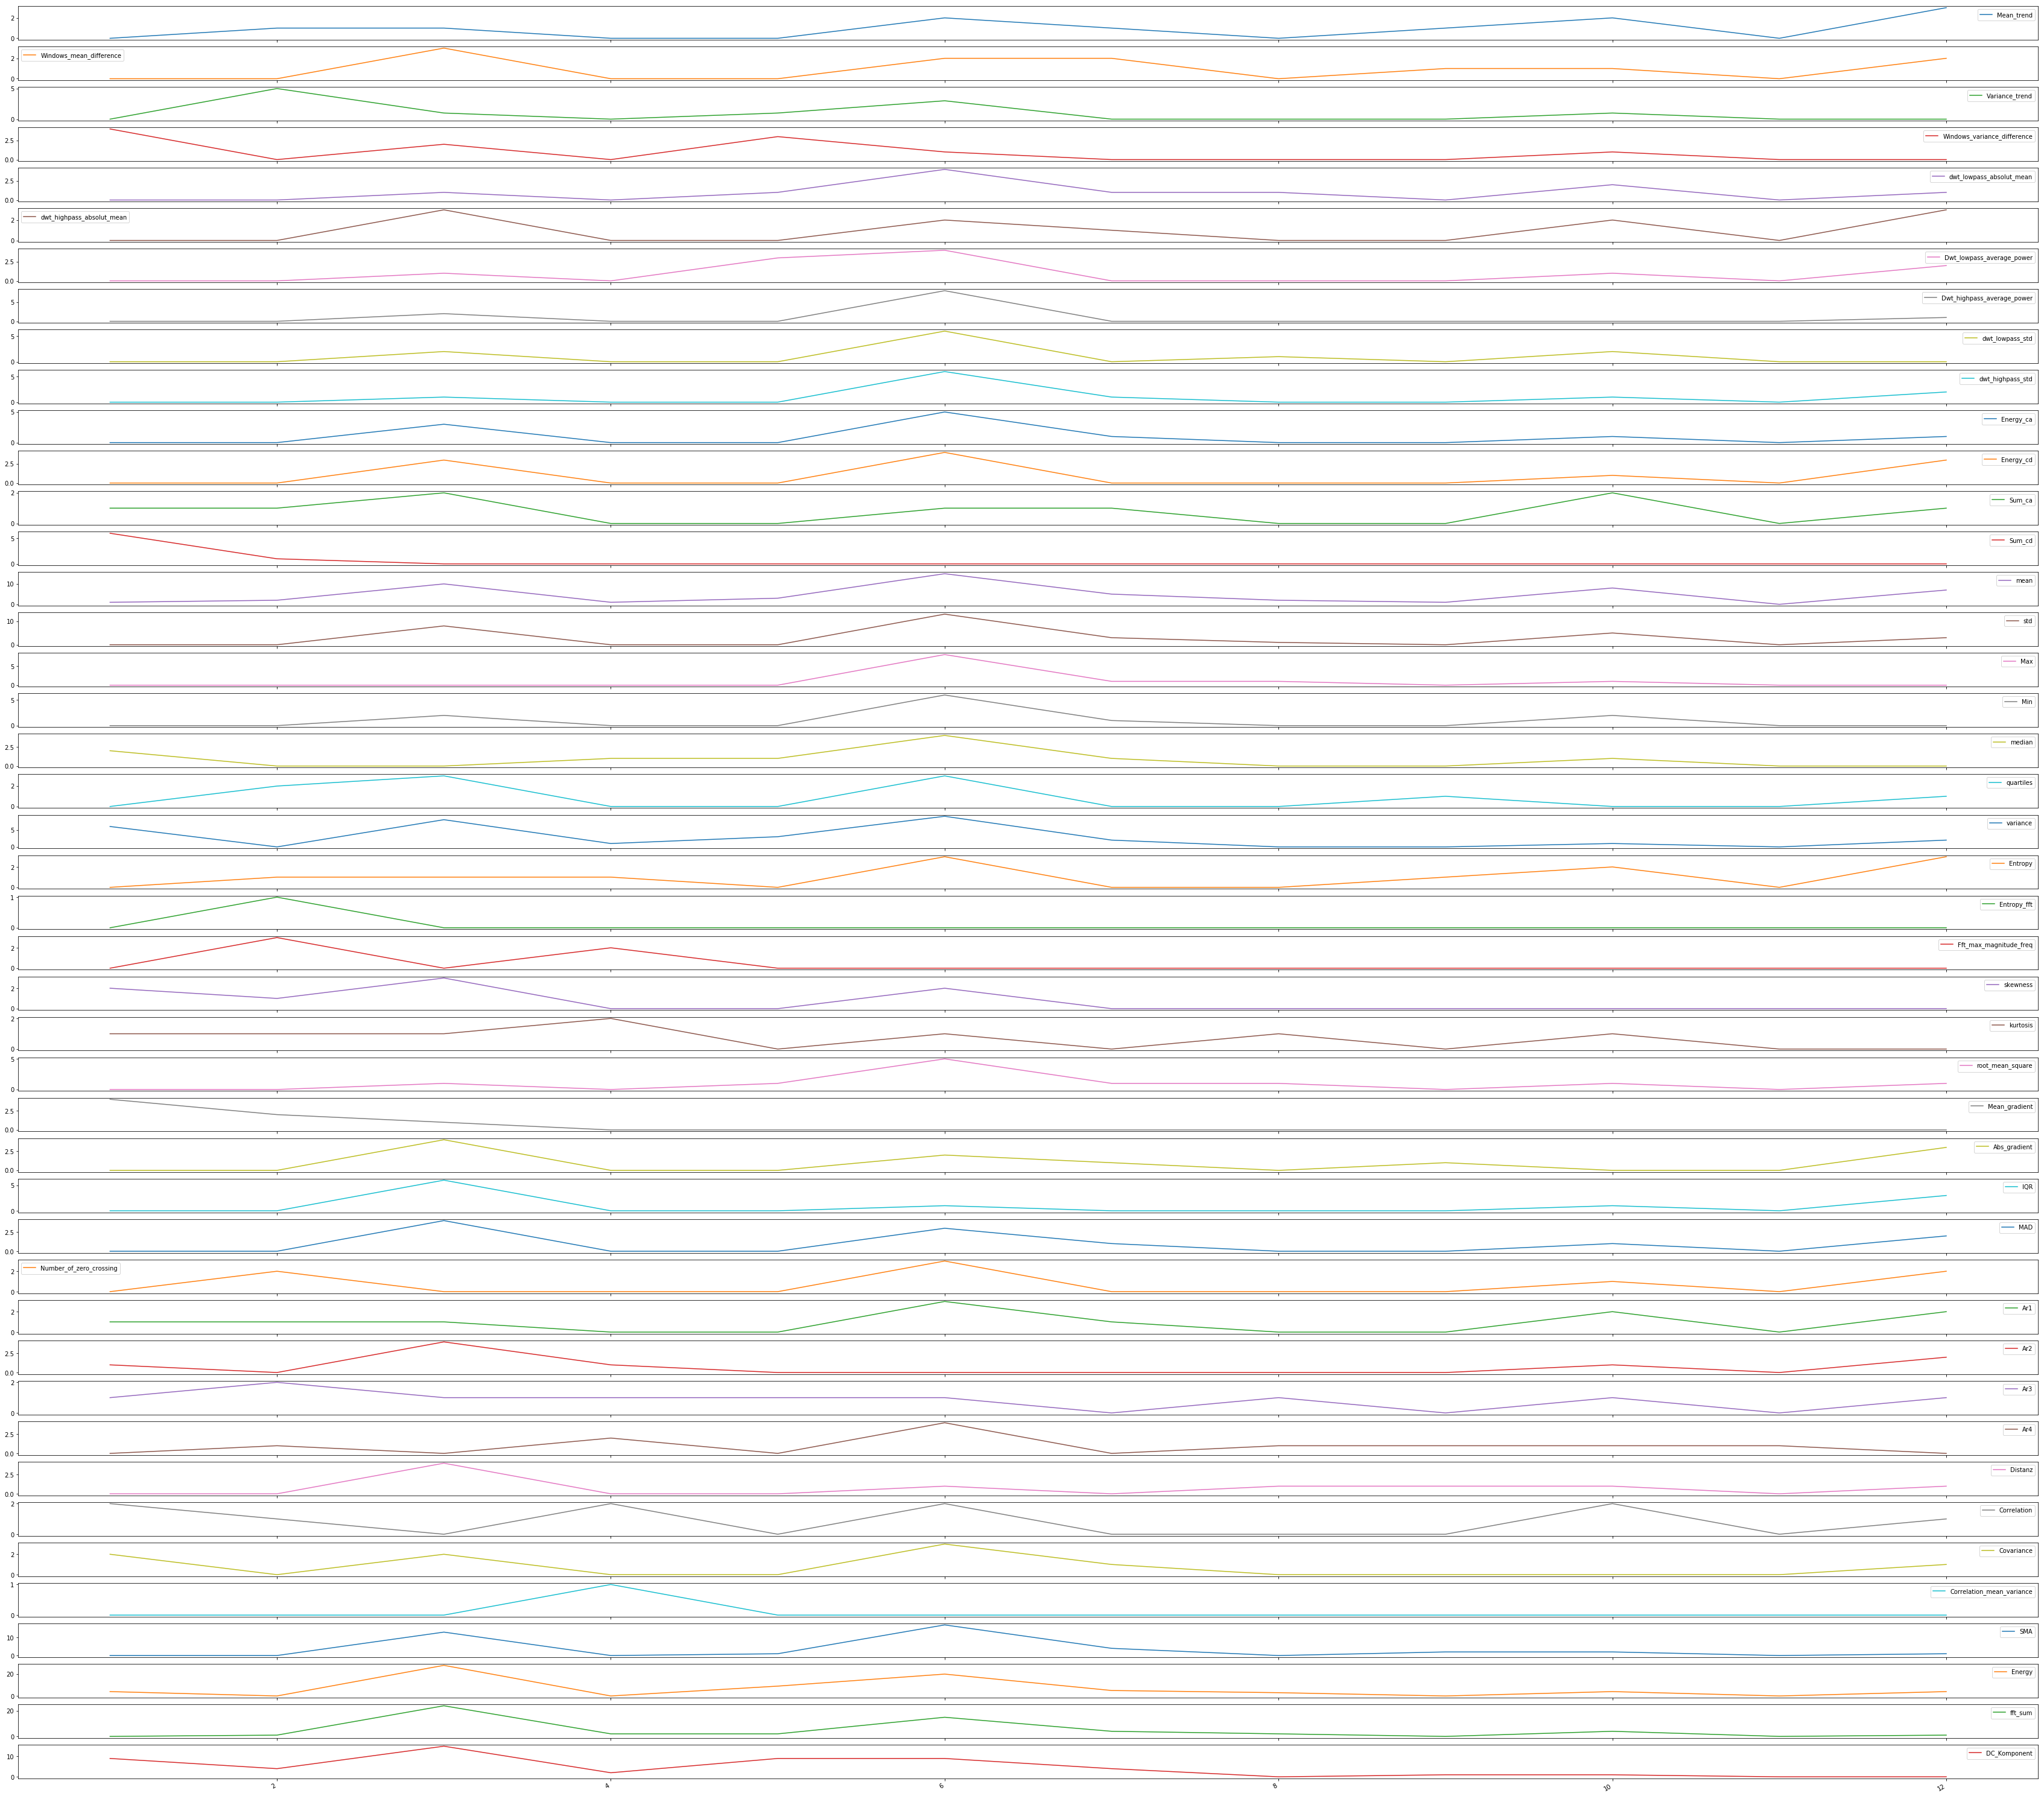

In [230]:
F_list_combi.T.plot(subplots=True,figsize=(60,60))

In [261]:
Merkmale=f_c_lsvc_3_all.values.reshape(1,512).tolist()[0]
Merkmale

['a_z_Windows_mean_difference',
 'SMA_M_0-10HZ',
 'phi_1pkt_z_Min',
 'magnet_z_Energy_ca',
 'fft_sum_Spannung_60-80HZ',
 'magnet_x_dwt_lowpass_absolut_mean',
 'a_z_variance',
 'fft_sum_Spannung_80-100HZ',
 'a_x_root_mean_square',
 'SMA_M_70-80HZ',
 'Spannung_quartiles',
 'DC_Komponent_Spannung_0-20HZ',
 'DC_Komponent_a_z_20-40HZ',
 'SMA_a_0-10HZ',
 'Covariance_Beschleunigung_y_z',
 'a_y_Energy_ca',
 'Spannung_Ar3',
 'Energy_Strom_0-20HZ',
 'Spannung_IQR',
 'phi_1pkt_x_dwt_lowpass_std',
 'a_y_root_mean_square',
 'Correlation_Magnetfeld_x_y',
 'SMA_M_30-40HZ',
 'fft_sum_a_x_40-60HZ',
 'SMA_a_90-100HZ',
 'Strom_Ar4',
 'magnet_z_Entropy',
 'magnet_x_mean',
 'DC_Komponent_magnet_x_80-100HZ',
 'Energy_a_z_20-40HZ',
 'phi_1pkt_x_Number_of_zero_crossing',
 'Energy_Spannung_0-20HZ',
 'phi_1pkt_z_std',
 'DC_Komponent_phi_1pkt_x_20-40HZ',
 'Energy_magnet_z_20-40HZ',
 'SMA_M_10-20HZ',
 'fft_sum_Spannung_0-20HZ',
 'a_x_std',
 'DC_Komponent_a_y_20-40HZ',
 'a_x_Abs_gradient',
 'fft_sum_phi_1pkt_y_20-

In [263]:
x_klassifikation=x[Merkmale]
x_klassifikation

a_z_Windows_mean_difference  SMA_M_0-10HZ  phi_1pkt_z_Min  \
0                        0.012178      0.046174       -0.049033   
1                        0.087224      0.153070       -0.022042   
2                        0.022574      0.144844       -0.088394   
3                        0.122911      0.187785       -0.110211   
4                        0.077368      0.077585       -0.058030   
5                        0.020741      0.034319       -0.051957   
6                        0.084105      0.077239       -0.060054   
7                        0.077121      0.072711       -0.067701   
8                        0.018485      0.049058       -0.123257   
9                        0.013547      0.077551       -0.121457   
10                       0.046855      0.030055       -0.047233   
11                       0.034932      0.032384       -0.048808   
12                       0.043176      0.026174       -0.067926   
13                       0.080963      0.055060       -0.108637   
14                       0.040746      0.026794       -0.053081   
15                       0.133056      0.029027       -0.052182   
16                       0.163196      0.028498       -0.043410   
17                       0.106653      0.035072       -0.044984   
18                       0.085357      0.035982       -0.047458   
19                       0.112616      0.102928       -0.105938   
20                       0.081738      0.171520       -0.102114   
21                       0.113184      0.289241       -0.344354   
22                       0.160329      0.314392       -0.283851   
23                       0.072508      0.104860       -0.182186   
24                       0.022826      0.190895       -0.189609   
25                       0.131310      0.271382       -0.147998   
26                       0.111029      0.125376       -0.033738   
27                       0.081146      0.093613       -0.074224   
28                       0.075646      0.128338       -0.166217   
29                       0.105003      0.146054       -0.202654   
...                           ...           ...             ...   
4494                     0.026322      0.026429       -0.044759   
4495                     0.017697      0.065515       -0.013945   
4496                     0.055699      0.041244       -0.047683   
4497                     0.018692      0.033469       -0.029690   
4498                     0.160099      0.054727       -0.093567   
4499                     0.210806      0.059548       -0.078048   
4500                     0.082333      0.060692       -0.053531   
4501                     0.138094      0.049650       -0.054656   
4502                     0.117328      0.096849       -0.134503   
4503                     0.224082      0.126516       -0.151372   
4504                     0.175478      0.081240       -0.055331   
4505                     0.112212      0.050906       -0.054656   
4506                     0.132373      0.042697       -0.063428   
4507                     0.173791      0.070580       -0.059379   
4508                     0.237289      0.088312       -0.082096   
4509                     0.089837      0.068667       -0.056680   
4510                     0.152977      0.072752       -0.048583   
4511                     0.114613      0.090772       -0.055780   
4512                     0.150851      0.212718       -0.064552   
4513                     0.034218      0.091508       -0.071750   
4514                     0.029410      0.072214       -0.037337   
4515                     0.093837      0.117944       -0.053081   
4516                     0.202944      0.048824       -0.041161   
4517                     0.171913      0.051096       -0.068826   
4518                     0.113549      0.113032       -0.109762   
4519                     0.115134      0.229952       -0.147548   
4520                     0.140369      0.291046       -0.594692   
4521                     0.078319      0.322907      

In [264]:
x_train_k,x_test_k,y_train_k,y_test_k=train_test_split(x_klassifikation,y,test_size=0.33,random_state=42)


In [267]:
ohne_selektion(svm.LinearSVC(),x_train_k,y_train_k,x_test_k,y_test_k)

0.9906229068988613

In [285]:
    F_list_combi.to_latex('wichtigkeit der Merkmalsextraktionsmethod')

In [ ]:
def variance_threshold(p,classifier,data,label,data_test,label_test):
    selector=VarianceThreshold(threshold=(p*(1-p)))
    fit_data=selector.fit(data,label)
    feature_index=fit_data.get_support(indices=True)
    x_train2=fit_data.transform(data)
    x_test2=fit_data.transform(data_test)
    clf=classifier
    clf=clf.fit(x_train2,label)
    acc=accuracy_score(label_test,clf.predict(x_test2))
    return acc
def variance_threshold_ausgabe(classifier,data,label,data_test,label_test,satz):
    p_variance=[i*0.1+0.1 for i in range(10)]
    score=[variance_threshold(p,classifier,data,label,data_test,label_test) for p in p_variance ]
    maxi=max(score)
    p_max=p_variance[score.index(maxi)]
    selector=VarianceThreshold(threshold=p_max*(1-p_max))
    fit_data=selector.fit(data,label)
    feature_index=fit_data.get_support(indices=True)
    selected_feature=pd.DataFrame(data.columns[feature_index])
    print('Maximale Genauigkeit:','(',satz,')',':', maxi,',  Die Anzahl der Merkmale:',len(selected_feature),', p=',p_max)
    plt.figure()
    plt.xlabel('Number of features selected')
    plt.ylabel('The score of number of selected features')
    plt.plot(p_variance,score)
    return selected_feature, maxi, len(selected_feature), p_max
    
    
    